In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/Incucyte/dataSMALL/'
npz_name = 'Incucyte64.npz'
npz_val_name = 'Incucyte64Val.npz'


model_dir = '/home/sancere/Kepler/Incucyte/model/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'incucyteresnetd38SMALL.h5'


In [3]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 7
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 38
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 48
imagey = 48

In [4]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, 
                         stride = stride,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=100, box_vector=2, categories=2, depth=47, epochs=250, gridx=1, gridy=1, imagex=48, imagey=48, key_categories={'Normal': 0, 'Cells': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=1e-06, mid_kernel=7, model_name='incucyteseqnetd47SMALL.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/Incucyte/dataSMALL/', npz_name='Incucyte64.npz', npz_val_name='Incucyte64Val.npz', residual=False, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 4059
image size (2D):		 (48, 48)
axes:				 SXYC
channels in / out:		 1
number of  images:	 214
image size (2D):		 (48, 48)
axes:				 SXYC
channels in / out:		 1
(4059, 1, 1, 4) 1














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 1600        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_____________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4059 samples, validate on 214 samples
Epoch 1/250
4059/4059 [==============================] - 17s 4ms/step - loss: 1.6576 - acc: 0.2927 - val_loss: 1.4856 - val_acc: 0.5234

Epoch 00001: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 1.4856219826457657, 'val_acc': 0.5233644976794163, 'loss': 1.657612042522219, 'acc': 0.29268292785718775, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

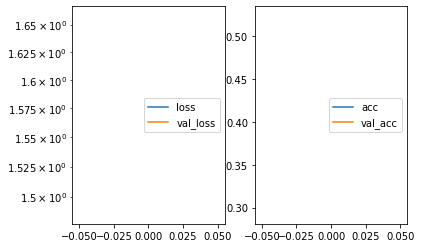

Predicted cell: Cells Probability: [[0.7507007]]
True Cell type: Cells
x [[0.65394837]]
True positional value x 0.5
y [[0.4752053]]
True positional value y 0.7083333333333334


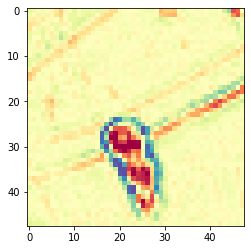

Epoch 2/250
4059/4059 [==============================] - 6s 1ms/step - loss: 1.2608 - acc: 0.6854 - val_loss: 1.1726 - val_acc: 0.7897

Epoch 00002: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 1.1725592278988561, 'val_acc': 0.7897196150271693, 'loss': 1.2608123553683235, 'acc': 0.6853904891818813, 'lr': 1e-06}


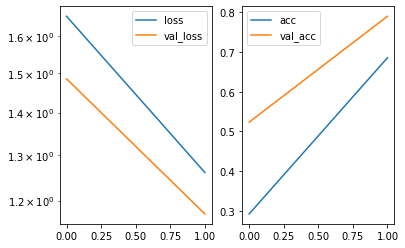

Predicted cell: Cells Probability: [[0.8417097]]
True Cell type: Cells
x [[0.56966114]]
True positional value x 0.7083333333333334
y [[0.22542435]]
True positional value y 0.5


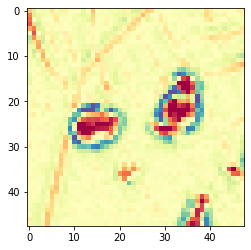

Epoch 3/250
4059/4059 [==============================] - 6s 1ms/step - loss: 1.0262 - acc: 0.8460 - val_loss: 1.0624 - val_acc: 0.8738

Epoch 00003: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 1.0623544387728254, 'val_acc': 0.8738317784861983, 'loss': 1.0262147356471747, 'acc': 0.8460211883363068, 'lr': 1e-06}


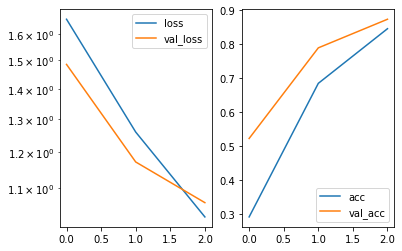

Predicted cell: Cells Probability: [[0.93284273]]
True Cell type: Cells
x [[0.47870544]]
True positional value x 0.2916666666666667
y [[0.7740628]]
True positional value y 0.7083333333333334


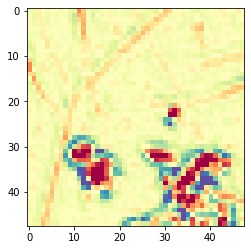

Epoch 4/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.9346 - acc: 0.8793 - val_loss: 1.0277 - val_acc: 0.8785

Epoch 00004: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 1.0277017577786312, 'val_acc': 0.878504671226038, 'loss': 0.9345626189192401, 'acc': 0.8792806103711763, 'lr': 1e-06}


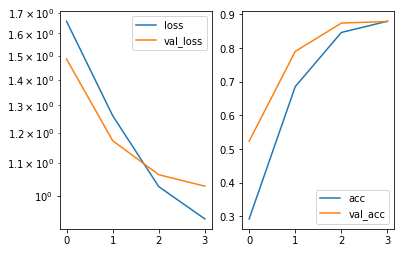

Predicted cell: Cells Probability: [[0.9635213]]
True Cell type: Cells
x [[0.45751584]]
True positional value x 0.2916666666666667
y [[0.7748669]]
True positional value y 0.7083333333333334


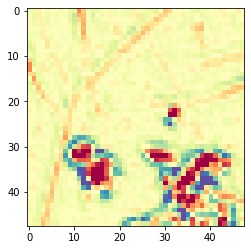

Epoch 5/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.8895 - acc: 0.8822 - val_loss: 1.0138 - val_acc: 0.8785

Epoch 00005: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 1.0138145311970577, 'val_acc': 0.878504671226038, 'loss': 0.8894840639986761, 'acc': 0.8822370045700224, 'lr': 1e-06}


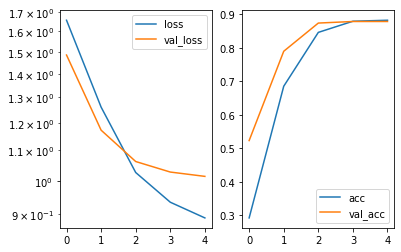

Predicted cell: Cells Probability: [[0.94036996]]
True Cell type: Cells
x [[0.58692485]]
True positional value x 0.7083333333333334
y [[0.49457994]]
True positional value y 0.5


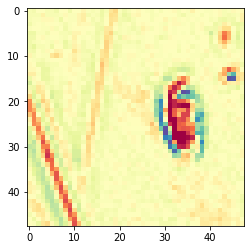

Epoch 6/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.8539 - acc: 0.8859 - val_loss: 0.9978 - val_acc: 0.8785

Epoch 00006: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9978113185579531, 'val_acc': 0.878504671226038, 'loss': 0.8539478571199378, 'acc': 0.8859325004757611, 'lr': 1e-06}


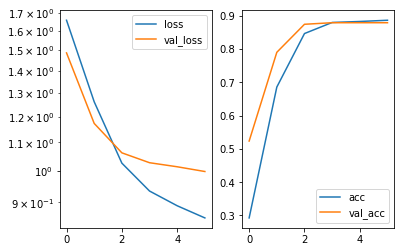

Predicted cell: Cells Probability: [[0.8483163]]
True Cell type: Normal
x [[0.36553374]]
True positional value x 0.5
y [[0.27028847]]
True positional value y 0.5


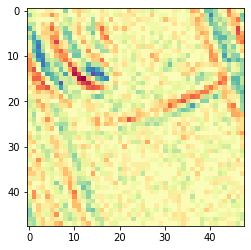

Epoch 7/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.8205 - acc: 0.8852 - val_loss: 0.9906 - val_acc: 0.8785

Epoch 00007: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9906232668974689, 'val_acc': 0.878504671226038, 'loss': 0.8205302820384253, 'acc': 0.8851933955382643, 'lr': 1e-06}


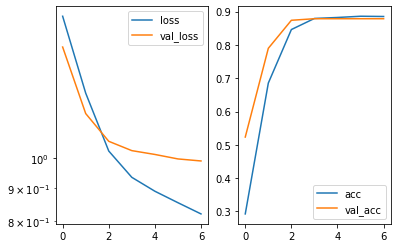

Predicted cell: Cells Probability: [[0.9833175]]
True Cell type: Cells
x [[0.50129735]]
True positional value x 0.2916666666666667
y [[0.3131752]]
True positional value y 0.5


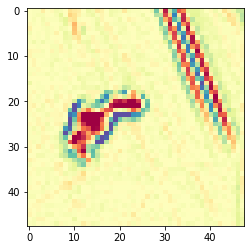

Epoch 8/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.7918 - acc: 0.8872 - val_loss: 0.9801 - val_acc: 0.8785

Epoch 00008: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9801401902582044, 'val_acc': 0.878504671226038, 'loss': 0.7918344496006624, 'acc': 0.8871643262474547, 'lr': 1e-06}


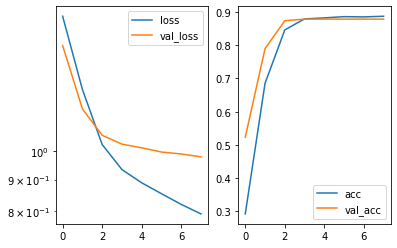

Predicted cell: Cells Probability: [[0.9894979]]
True Cell type: Cells
x [[0.54370934]]
True positional value x 0.7083333333333334
y [[0.5746894]]
True positional value y 0.7083333333333334


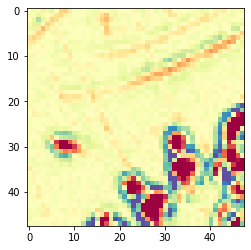

Epoch 9/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.7636 - acc: 0.8884 - val_loss: 0.9742 - val_acc: 0.8785

Epoch 00009: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9741950464025836, 'val_acc': 0.878504671226038, 'loss': 0.7636038954988081, 'acc': 0.8883961591264772, 'lr': 1e-06}


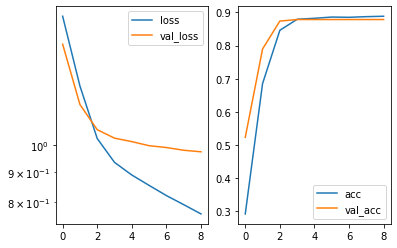

Predicted cell: Cells Probability: [[0.86609167]]
True Cell type: Cells
x [[0.9224616]]
True positional value x 0.7083333333333334
y [[0.3071781]]
True positional value y 0.2916666666666667


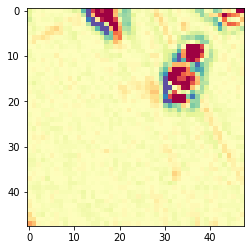

Epoch 10/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.7382 - acc: 0.8881 - val_loss: 0.9717 - val_acc: 0.8785

Epoch 00010: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9716848257546112, 'val_acc': 0.878504671226038, 'loss': 0.7382389462972163, 'acc': 0.8881497897371102, 'lr': 1e-06}


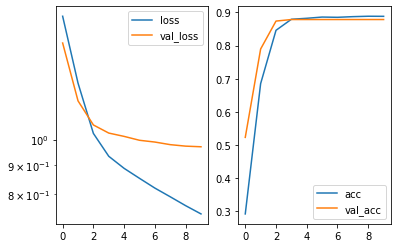

Predicted cell: Cells Probability: [[0.98702]]
True Cell type: Cells
x [[0.89986324]]
True positional value x 0.7083333333333334
y [[0.5131682]]
True positional value y 0.2916666666666667


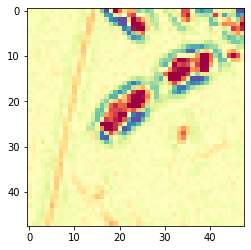

Epoch 11/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.7183 - acc: 0.8891 - val_loss: 0.9686 - val_acc: 0.8785

Epoch 00011: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9685550092536712, 'val_acc': 0.878504671226038, 'loss': 0.7182807924272274, 'acc': 0.8891352581901485, 'lr': 1e-06}


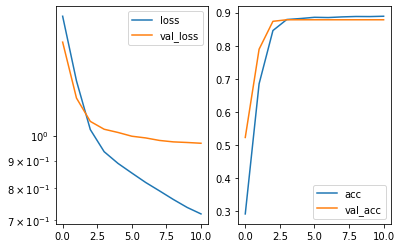

Predicted cell: Cells Probability: [[0.9541646]]
True Cell type: Cells
x [[0.39978582]]
True positional value x 0.2916666666666667
y [[0.24943052]]
True positional value y 0.2916666666666667


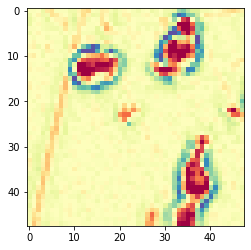

Epoch 12/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.7046 - acc: 0.8901 - val_loss: 0.9660 - val_acc: 0.8785

Epoch 00012: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9660297877320619, 'val_acc': 0.878504671226038, 'loss': 0.7046113216133945, 'acc': 0.8901207181261396, 'lr': 1e-06}


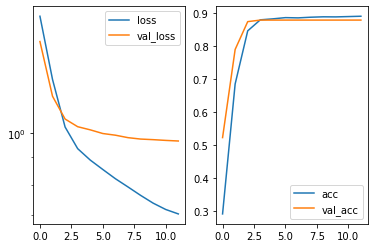

Predicted cell: Cells Probability: [[0.94369537]]
True Cell type: Cells
x [[0.4248137]]
True positional value x 0.5
y [[0.51379395]]
True positional value y 0.5


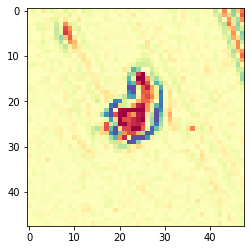

Epoch 13/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.6853 - acc: 0.8901 - val_loss: 0.9575 - val_acc: 0.8738

Epoch 00013: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9574854541047711, 'val_acc': 0.8738317506335606, 'loss': 0.6852571012410485, 'acc': 0.8901207245873477, 'lr': 1e-06}


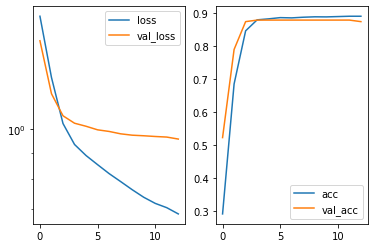

Predicted cell: Cells Probability: [[0.77744514]]
True Cell type: Cells
x [[0.4279502]]
True positional value x 0.5
y [[0.68099475]]
True positional value y 0.7083333333333334


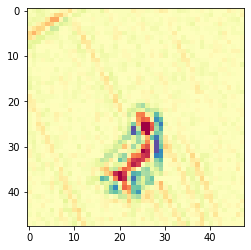

Epoch 14/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.6759 - acc: 0.8909 - val_loss: 0.9536 - val_acc: 0.8738

Epoch 00014: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9536221261336425, 'val_acc': 0.8738317506335606, 'loss': 0.6759137366757249, 'acc': 0.890859814487851, 'lr': 1e-06}


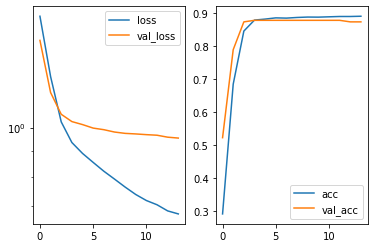

Predicted cell: Cells Probability: [[0.7134983]]
True Cell type: Cells
x [[0.4729468]]
True positional value x 0.7083333333333334
y [[0.31978497]]
True positional value y 0.2916666666666667


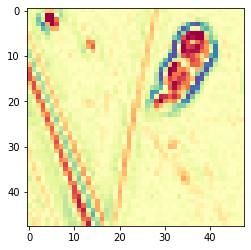

Epoch 15/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.6648 - acc: 0.8904 - val_loss: 0.9466 - val_acc: 0.8738

Epoch 00015: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9465792474345626, 'val_acc': 0.8738317506335606, 'loss': 0.6647676999535458, 'acc': 0.8903670863113723, 'lr': 1e-06}


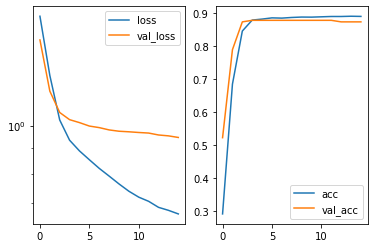

Predicted cell: Cells Probability: [[0.9970198]]
True Cell type: Cells
x [[0.2711966]]
True positional value x 0.2916666666666667
y [[0.42422593]]
True positional value y 0.2916666666666667


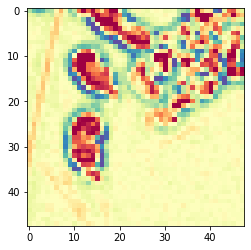

Epoch 16/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.6515 - acc: 0.8916 - val_loss: 0.9437 - val_acc: 0.8738

Epoch 00016: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9437217433875966, 'val_acc': 0.8738317506335606, 'loss': 0.6515191638079086, 'acc': 0.8915989165324888, 'lr': 1e-06}


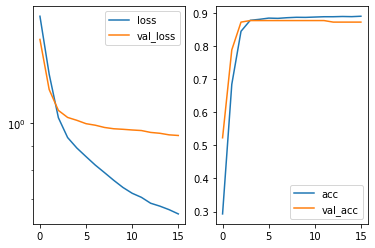

Predicted cell: Cells Probability: [[0.9718303]]
True Cell type: Cells
x [[0.4694143]]
True positional value x 0.7083333333333334
y [[0.722148]]
True positional value y 0.5


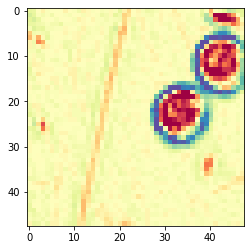

Epoch 17/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.6413 - acc: 0.8960 - val_loss: 0.9385 - val_acc: 0.8738

Epoch 00017: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9385097856833556, 'val_acc': 0.8738317506335606, 'loss': 0.6412990254614558, 'acc': 0.8960335065091469, 'lr': 1e-06}


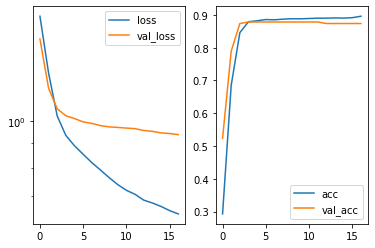

Predicted cell: Cells Probability: [[0.9806002]]
True Cell type: Cells
x [[0.33742055]]
True positional value x 0.5
y [[0.55815613]]
True positional value y 0.2916666666666667


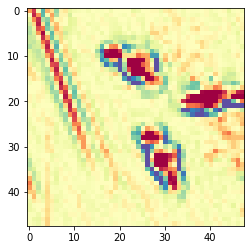

Epoch 18/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.6344 - acc: 0.8985 - val_loss: 0.9345 - val_acc: 0.8738

Epoch 00018: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9344916700202728, 'val_acc': 0.8738317506335606, 'loss': 0.6343763754355494, 'acc': 0.8984971716504404, 'lr': 1e-06}


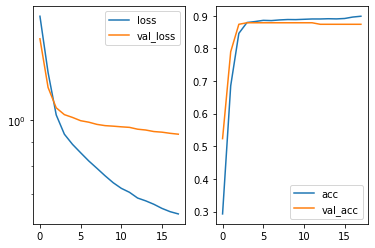

Predicted cell: Cells Probability: [[0.92020255]]
True Cell type: Cells
x [[0.23601048]]
True positional value x 0.2916666666666667
y [[0.31599048]]
True positional value y 0.5


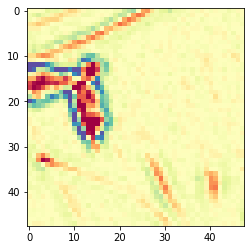

Epoch 19/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.6253 - acc: 0.9007 - val_loss: 0.9338 - val_acc: 0.8738

Epoch 00019: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9337550379405511, 'val_acc': 0.8738317506335606, 'loss': 0.625297747256868, 'acc': 0.9007144626592527, 'lr': 1e-06}


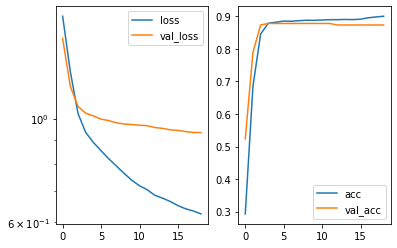

Predicted cell: Cells Probability: [[0.5734452]]
True Cell type: Normal
x [[0.31445926]]
True positional value x 0.5
y [[0.5136358]]
True positional value y 0.5


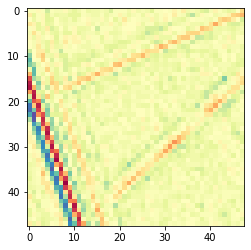

Epoch 20/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.6168 - acc: 0.9029 - val_loss: 0.9308 - val_acc: 0.8738

Epoch 00020: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9307987411445546, 'val_acc': 0.8738317506335606, 'loss': 0.6168136849988415, 'acc': 0.9029317598502663, 'lr': 1e-06}


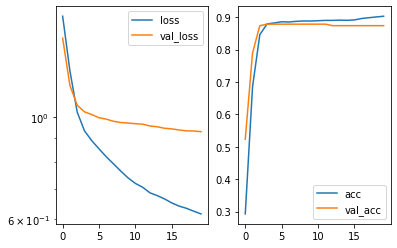

Predicted cell: Cells Probability: [[0.9479885]]
True Cell type: Cells
x [[0.6394062]]
True positional value x 0.7083333333333334
y [[0.5052506]]
True positional value y 0.5


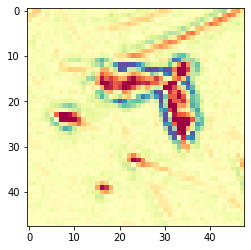

Epoch 21/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.6151 - acc: 0.9071 - val_loss: 0.9316 - val_acc: 0.8785

Epoch 00021: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9315575394674996, 'val_acc': 0.878504671226038, 'loss': 0.6150978308617995, 'acc': 0.9071199842702288, 'lr': 1e-06}


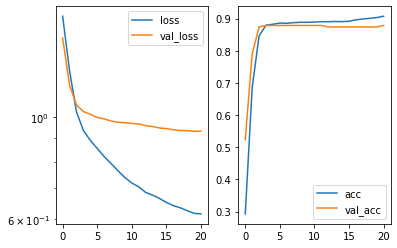

Predicted cell: Normal Probability: [[0.53911924]]
True Cell type: Normal
x [[0.6047965]]
True positional value x 0.5
y [[0.39657632]]
True positional value y 0.5


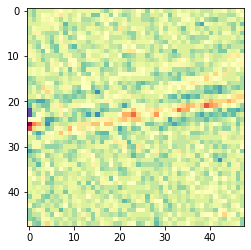

Epoch 22/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.6045 - acc: 0.9123 - val_loss: 0.9303 - val_acc: 0.8832

Epoch 00022: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9303194284439087, 'val_acc': 0.8831775639658777, 'loss': 0.6044953477062537, 'acc': 0.9122936691841959, 'lr': 1e-06}


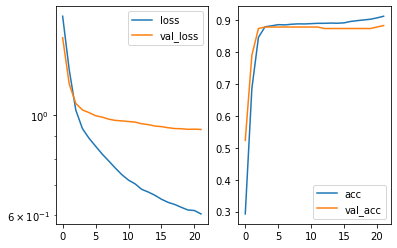

Predicted cell: Cells Probability: [[0.9878521]]
True Cell type: Cells
x [[0.6155922]]
True positional value x 0.7083333333333334
y [[0.15828727]]
True positional value y 0.2916666666666667


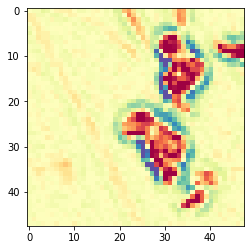

Epoch 23/250
4059/4059 [==============================] - 6s 2ms/step - loss: 0.5953 - acc: 0.9194 - val_loss: 0.9282 - val_acc: 0.8832

Epoch 00023: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9281998282281038, 'val_acc': 0.8831775639658777, 'loss': 0.5952914914758254, 'acc': 0.919438288082011, 'lr': 1e-06}


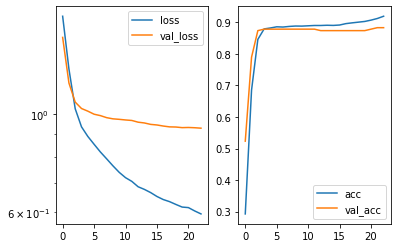

Predicted cell: Cells Probability: [[0.9886932]]
True Cell type: Cells
x [[0.22332463]]
True positional value x 0.5
y [[0.19299564]]
True positional value y 0.2916666666666667


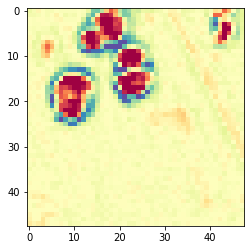

Epoch 24/250
4059/4059 [==============================] - 6s 2ms/step - loss: 0.5892 - acc: 0.9229 - val_loss: 0.9230 - val_acc: 0.8832

Epoch 00024: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9230256542981228, 'val_acc': 0.8831775639658777, 'loss': 0.5891986959055158, 'acc': 0.9228874146277518, 'lr': 1e-06}


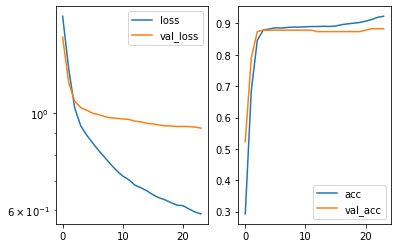

Predicted cell: Cells Probability: [[0.99502385]]
True Cell type: Cells
x [[0.17480494]]
True positional value x 0.2916666666666667
y [[0.32281184]]
True positional value y 0.2916666666666667


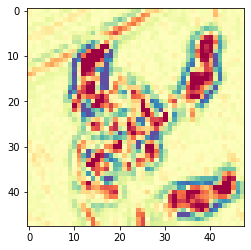

Epoch 25/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5826 - acc: 0.9322 - val_loss: 0.9188 - val_acc: 0.8832

Epoch 00025: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9188260798142335, 'val_acc': 0.8831775639658777, 'loss': 0.5826284545605686, 'acc': 0.9322493245343794, 'lr': 1e-06}


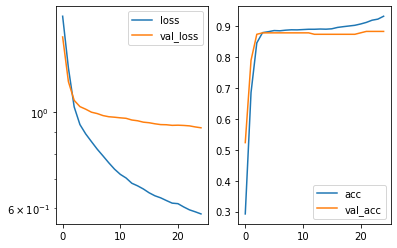

Predicted cell: Cells Probability: [[0.86421907]]
True Cell type: Cells
x [[0.62176514]]
True positional value x 0.7083333333333334
y [[0.6412418]]
True positional value y 0.5


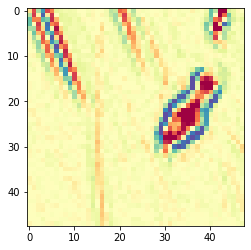

Epoch 26/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5771 - acc: 0.9355 - val_loss: 0.9169 - val_acc: 0.8832

Epoch 00026: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9169006631753155, 'val_acc': 0.8831775639658777, 'loss': 0.577094631539862, 'acc': 0.9354520798845519, 'lr': 1e-06}


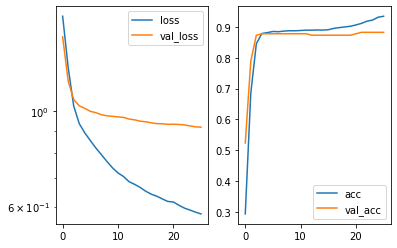

Predicted cell: Cells Probability: [[0.62210405]]
True Cell type: Normal
x [[0.73857623]]
True positional value x 0.5
y [[0.50509626]]
True positional value y 0.5


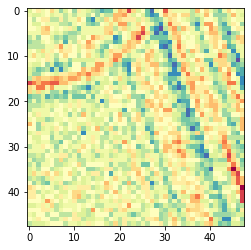

Epoch 27/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5715 - acc: 0.9416 - val_loss: 0.9145 - val_acc: 0.8832

Epoch 00027: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9145180978507639, 'val_acc': 0.8831775639658777, 'loss': 0.5715181372764223, 'acc': 0.9416112335893021, 'lr': 1e-06}


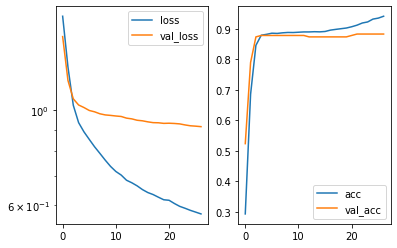

Predicted cell: Cells Probability: [[0.96182746]]
True Cell type: Cells
x [[0.350102]]
True positional value x 0.2916666666666667
y [[0.6599345]]
True positional value y 0.2916666666666667


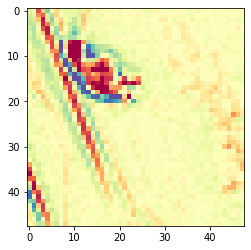

Epoch 28/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5666 - acc: 0.9473 - val_loss: 0.9114 - val_acc: 0.8785

Epoch 00028: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9114215741647738, 'val_acc': 0.878504671226038, 'loss': 0.5666177894541066, 'acc': 0.9472776531703251, 'lr': 1e-06}


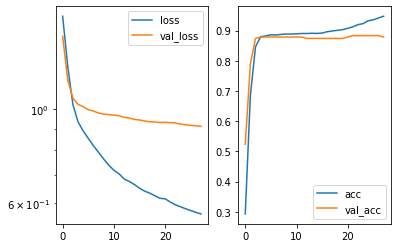

Predicted cell: Cells Probability: [[0.944411]]
True Cell type: Cells
x [[0.57588357]]
True positional value x 0.5
y [[0.18969682]]
True positional value y 0.2916666666666667


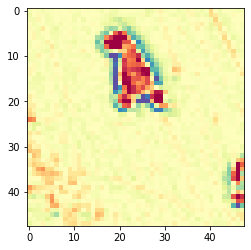

Epoch 29/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5620 - acc: 0.9483 - val_loss: 0.9091 - val_acc: 0.8785

Epoch 00029: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.909057560368119, 'val_acc': 0.878504671226038, 'loss': 0.5620491532569861, 'acc': 0.9482631204485982, 'lr': 1e-06}


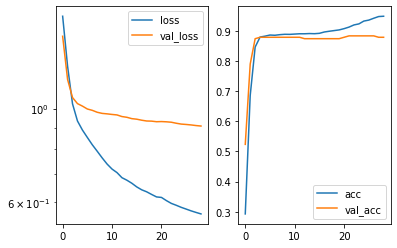

Predicted cell: Cells Probability: [[0.92889386]]
True Cell type: Cells
x [[0.5017308]]
True positional value x 0.7083333333333334
y [[0.49479768]]
True positional value y 0.7083333333333334


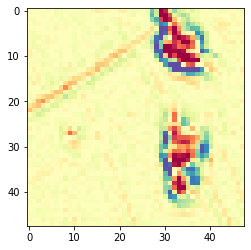

Epoch 30/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5551 - acc: 0.9561 - val_loss: 0.9078 - val_acc: 0.8832

Epoch 00030: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9077512610738523, 'val_acc': 0.8831775918185154, 'loss': 0.5551410967066065, 'acc': 0.9561468340047153, 'lr': 1e-06}


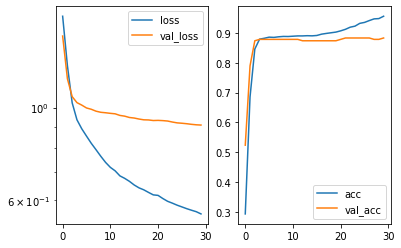

Predicted cell: Cells Probability: [[0.95059365]]
True Cell type: Cells
x [[0.3339421]]
True positional value x 0.2916666666666667
y [[0.5270924]]
True positional value y 0.5


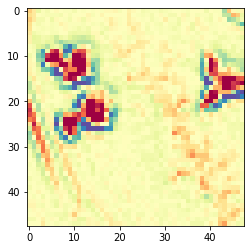

Epoch 31/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5523 - acc: 0.9635 - val_loss: 0.9072 - val_acc: 0.8832

Epoch 00031: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9072117827763068, 'val_acc': 0.8831775918185154, 'loss': 0.5522798974838831, 'acc': 0.9635378161390652, 'lr': 1e-06}


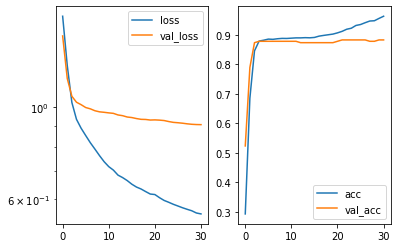

Predicted cell: Cells Probability: [[0.9408631]]
True Cell type: Cells
x [[0.39784816]]
True positional value x 0.5
y [[0.5262831]]
True positional value y 0.5


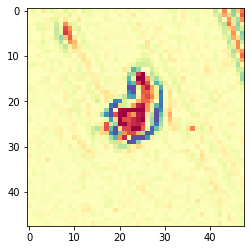

Epoch 32/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5477 - acc: 0.9650 - val_loss: 0.9047 - val_acc: 0.8879

Epoch 00032: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9047017682378538, 'val_acc': 0.887850484558355, 'loss': 0.5477418042104448, 'acc': 0.965016020991938, 'lr': 1e-06}


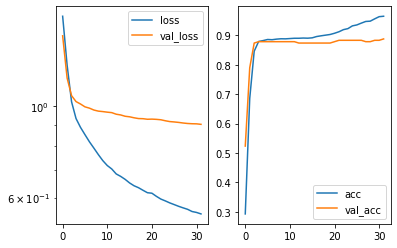

Predicted cell: Cells Probability: [[0.94769454]]
True Cell type: Cells
x [[0.6225345]]
True positional value x 0.7083333333333334
y [[0.5360819]]
True positional value y 0.5


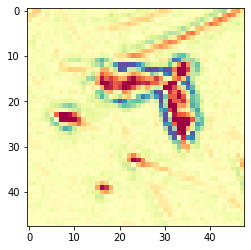

Epoch 33/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5450 - acc: 0.9655 - val_loss: 0.9028 - val_acc: 0.8879

Epoch 00033: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9028496959499109, 'val_acc': 0.887850484558355, 'loss': 0.545038578677101, 'acc': 0.9655087536178395, 'lr': 1e-06}


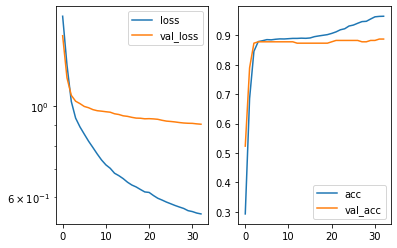

Predicted cell: Cells Probability: [[0.9915324]]
True Cell type: Cells
x [[0.35548884]]
True positional value x 0.2916666666666667
y [[0.48594186]]
True positional value y 0.5


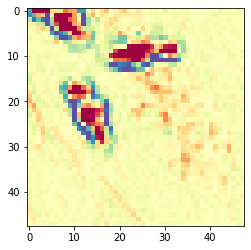

Epoch 34/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5416 - acc: 0.9667 - val_loss: 0.8993 - val_acc: 0.8879

Epoch 00034: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8992594937297785, 'val_acc': 0.887850484558355, 'loss': 0.5415675684453584, 'acc': 0.9667405841326473, 'lr': 1e-06}


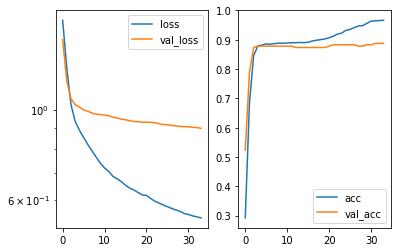

Predicted cell: Cells Probability: [[0.923717]]
True Cell type: Cells
x [[0.88776165]]
True positional value x 0.7083333333333334
y [[0.3745161]]
True positional value y 0.2916666666666667


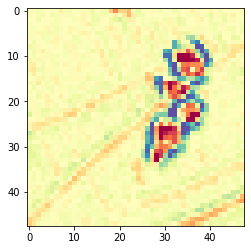

Epoch 35/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5369 - acc: 0.9731 - val_loss: 0.8972 - val_acc: 0.8879

Epoch 00035: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8971728403991628, 'val_acc': 0.887850484558355, 'loss': 0.5369370812469881, 'acc': 0.9731461104279993, 'lr': 1e-06}


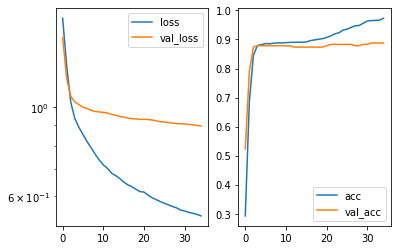

Predicted cell: Cells Probability: [[0.97538424]]
True Cell type: Cells
x [[0.4518347]]
True positional value x 0.7083333333333334
y [[0.45530418]]
True positional value y 0.7083333333333334


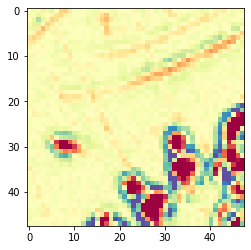

Epoch 36/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5344 - acc: 0.9746 - val_loss: 0.8952 - val_acc: 0.8879

Epoch 00036: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8952265359530939, 'val_acc': 0.887850484558355, 'loss': 0.5343726457090441, 'acc': 0.9746243006256773, 'lr': 1e-06}


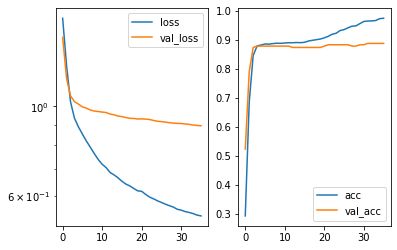

Predicted cell: Cells Probability: [[0.60443383]]
True Cell type: Normal
x [[0.4388122]]
True positional value x 0.5
y [[0.5736256]]
True positional value y 0.5


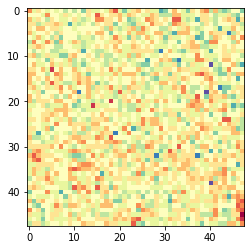

Epoch 37/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5305 - acc: 0.9791 - val_loss: 0.8939 - val_acc: 0.8925

Epoch 00037: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8938600666055055, 'val_acc': 0.8925233772981946, 'loss': 0.5305461733028142, 'acc': 0.979058893818255, 'lr': 1e-06}


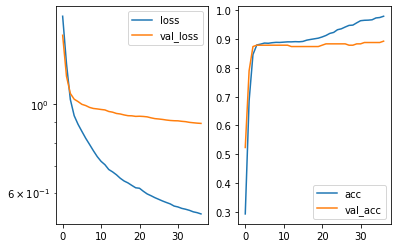

Predicted cell: Cells Probability: [[0.9872471]]
True Cell type: Cells
x [[0.55476063]]
True positional value x 0.2916666666666667
y [[0.52331764]]
True positional value y 0.5


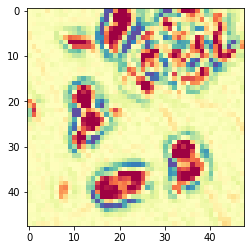

Epoch 38/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5284 - acc: 0.9776 - val_loss: 0.8932 - val_acc: 0.8925

Epoch 00038: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.893197406675214, 'val_acc': 0.8925233772981946, 'loss': 0.5283792234019241, 'acc': 0.977580694530832, 'lr': 1e-06}


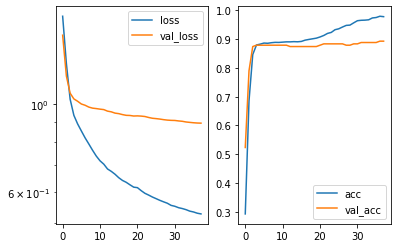

Predicted cell: Cells Probability: [[0.938585]]
True Cell type: Cells
x [[0.21188036]]
True positional value x 0.2916666666666667
y [[0.5020911]]
True positional value y 0.5


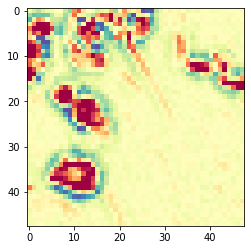

Epoch 39/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5256 - acc: 0.9808 - val_loss: 0.8910 - val_acc: 0.8925

Epoch 00039: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8909723847825951, 'val_acc': 0.8925233772981946, 'loss': 0.5256487539202804, 'acc': 0.9807834537136757, 'lr': 1e-06}


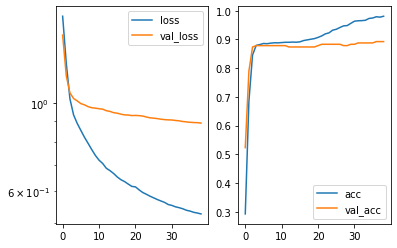

Predicted cell: Cells Probability: [[0.9870788]]
True Cell type: Cells
x [[0.7424237]]
True positional value x 0.5
y [[0.69897187]]
True positional value y 0.7083333333333334


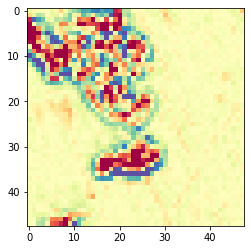

Epoch 40/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5213 - acc: 0.9837 - val_loss: 0.8904 - val_acc: 0.8925

Epoch 00040: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8903852116281741, 'val_acc': 0.8925233772981946, 'loss': 0.5212887498392028, 'acc': 0.9837398455629915, 'lr': 1e-06}


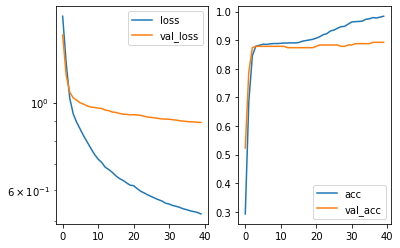

Predicted cell: Cells Probability: [[0.53818715]]
True Cell type: Normal
x [[0.75122505]]
True positional value x 0.5
y [[0.5069017]]
True positional value y 0.5


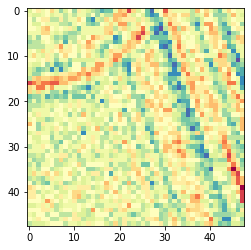

Epoch 41/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5172 - acc: 0.9874 - val_loss: 0.8867 - val_acc: 0.8972

Epoch 00041: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8867277848386319, 'val_acc': 0.8971962700380343, 'loss': 0.517205472091173, 'acc': 0.9874353379444348, 'lr': 1e-06}


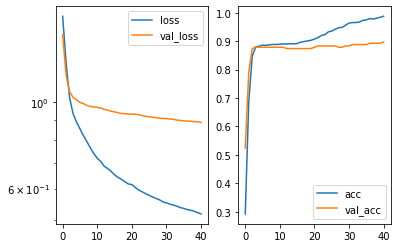

Predicted cell: Cells Probability: [[0.9883809]]
True Cell type: Cells
x [[0.2282933]]
True positional value x 0.2916666666666667
y [[0.77827317]]
True positional value y 0.7083333333333334


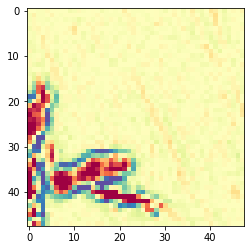

Epoch 42/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5149 - acc: 0.9872 - val_loss: 0.8857 - val_acc: 0.8972

Epoch 00042: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8857012658475716, 'val_acc': 0.8971962700380343, 'loss': 0.5149324499465292, 'acc': 0.9871889691424505, 'lr': 1e-06}


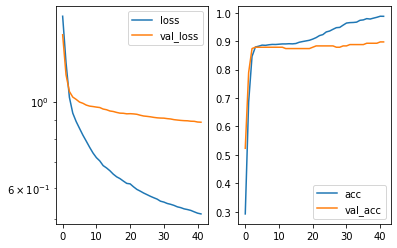

Predicted cell: Cells Probability: [[0.91091216]]
True Cell type: Cells
x [[0.78588355]]
True positional value x 0.7083333333333334
y [[0.8262362]]
True positional value y 0.7083333333333334


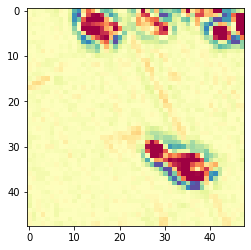

Epoch 43/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5090 - acc: 0.9887 - val_loss: 0.8841 - val_acc: 0.8972

Epoch 00043: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.88407990809913, 'val_acc': 0.8971962700380343, 'loss': 0.5090210172130898, 'acc': 0.9886671681508667, 'lr': 1e-06}


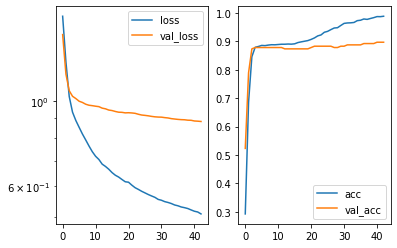

Predicted cell: Cells Probability: [[0.92737186]]
True Cell type: Cells
x [[0.7851207]]
True positional value x 0.5
y [[0.32165977]]
True positional value y 0.5


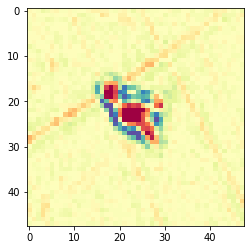

Epoch 44/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5096 - acc: 0.9899 - val_loss: 0.8839 - val_acc: 0.8972

Epoch 00044: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8838527982480058, 'val_acc': 0.8971962700380343, 'loss': 0.5095558844563643, 'acc': 0.9898989951266947, 'lr': 1e-06}


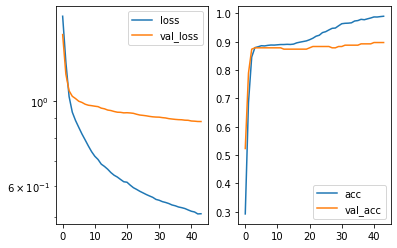

Predicted cell: Cells Probability: [[0.9449174]]
True Cell type: Cells
x [[0.1846324]]
True positional value x 0.2916666666666667
y [[0.1899038]]
True positional value y 0.2916666666666667


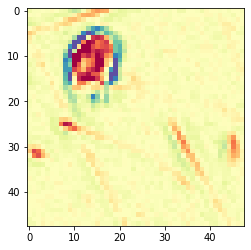

Epoch 45/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5109 - acc: 0.9892 - val_loss: 0.8806 - val_acc: 0.8972

Epoch 00045: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8806148968010306, 'val_acc': 0.8971962700380343, 'loss': 0.5109002415579978, 'acc': 0.9891598969440972, 'lr': 1e-06}


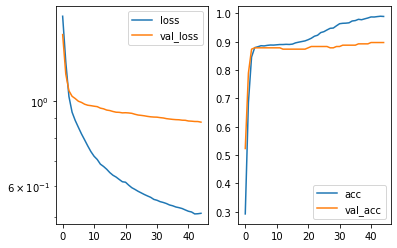

Predicted cell: Cells Probability: [[0.9443104]]
True Cell type: Cells
x [[0.67027456]]
True positional value x 0.7083333333333334
y [[0.5325719]]
True positional value y 0.5


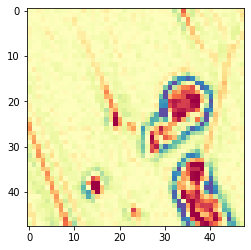

Epoch 46/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5053 - acc: 0.9909 - val_loss: 0.8817 - val_acc: 0.8972

Epoch 00046: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8816883435873227, 'val_acc': 0.8971962700380343, 'loss': 0.5053473202487347, 'acc': 0.9908844615238939, 'lr': 1e-06}


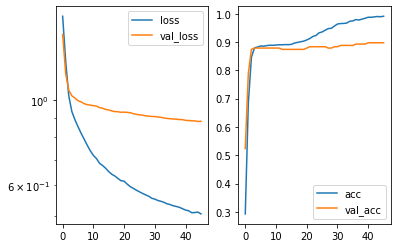

Predicted cell: Cells Probability: [[0.9955966]]
True Cell type: Cells
x [[0.28878257]]
True positional value x 0.5
y [[0.2474845]]
True positional value y 0.2916666666666667


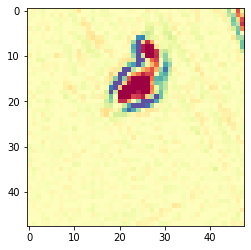

Epoch 47/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5015 - acc: 0.9909 - val_loss: 0.8784 - val_acc: 0.9019

Epoch 00047: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8784124271891941, 'val_acc': 0.901869162777874, 'loss': 0.5014682679700275, 'acc': 0.9908844594680549, 'lr': 1e-06}


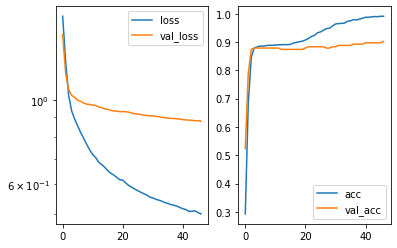

Predicted cell: Cells Probability: [[0.95117337]]
True Cell type: Cells
x [[0.37372336]]
True positional value x 0.2916666666666667
y [[0.24132745]]
True positional value y 0.2916666666666667


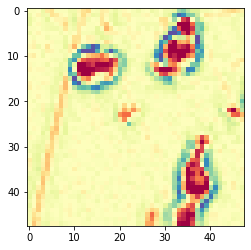

Epoch 48/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.5010 - acc: 0.9938 - val_loss: 0.8787 - val_acc: 0.9019

Epoch 00048: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8786742910046443, 'val_acc': 0.901869162777874, 'loss': 0.5010371609079511, 'acc': 0.9938408519047532, 'lr': 1e-06}


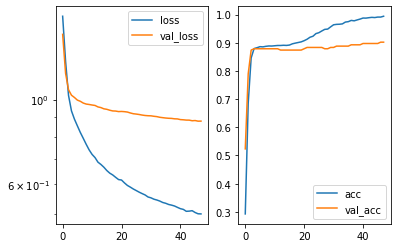

Predicted cell: Cells Probability: [[0.88387066]]
True Cell type: Cells
x [[0.5508013]]
True positional value x 0.7083333333333334
y [[0.5291904]]
True positional value y 0.7083333333333334


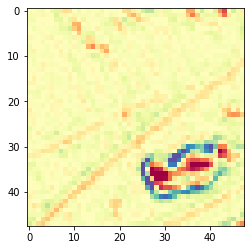

Epoch 49/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4976 - acc: 0.9953 - val_loss: 0.8756 - val_acc: 0.9019

Epoch 00049: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8756317997647223, 'val_acc': 0.901869162777874, 'loss': 0.49763038827151784, 'acc': 0.9953190479762568, 'lr': 1e-06}


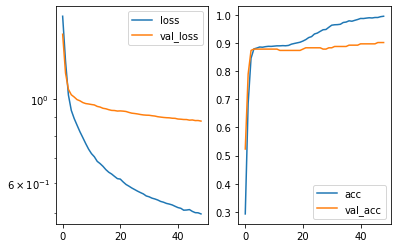

Predicted cell: Cells Probability: [[0.9510858]]
True Cell type: Cells
x [[0.56608135]]
True positional value x 0.2916666666666667
y [[0.11643113]]
True positional value y 0.2916666666666667


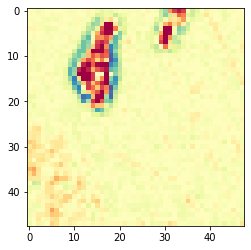

Epoch 50/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4978 - acc: 0.9929 - val_loss: 0.8737 - val_acc: 0.9019

Epoch 00050: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.873676627595848, 'val_acc': 0.901869162777874, 'loss': 0.4977817823364688, 'acc': 0.9928553878570843, 'lr': 1e-06}


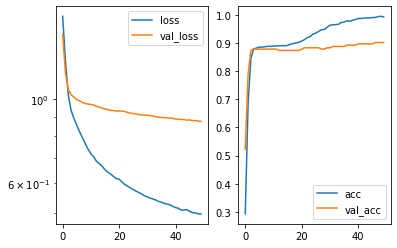

Predicted cell: Cells Probability: [[0.94789165]]
True Cell type: Cells
x [[0.63841146]]
True positional value x 0.5
y [[0.73987013]]
True positional value y 0.7083333333333334


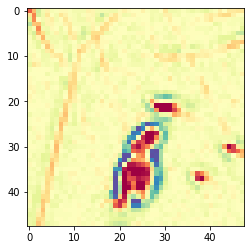

Epoch 51/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4944 - acc: 0.9963 - val_loss: 0.8691 - val_acc: 0.9019

Epoch 00051: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8690567974732301, 'val_acc': 0.901869162777874, 'loss': 0.4943779302982604, 'acc': 0.9963045099680868, 'lr': 1e-06}


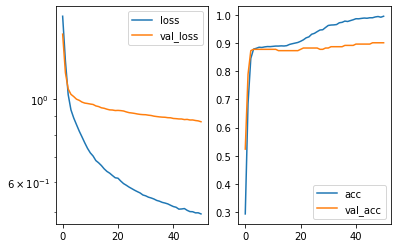

Predicted cell: Cells Probability: [[0.9784878]]
True Cell type: Cells
x [[0.48830447]]
True positional value x 0.5
y [[0.69147533]]
True positional value y 0.7083333333333334


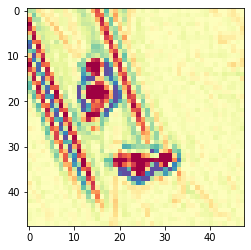

Epoch 52/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4947 - acc: 0.9968 - val_loss: 0.8658 - val_acc: 0.9019

Epoch 00052: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8657551948155198, 'val_acc': 0.901869162777874, 'loss': 0.4947270964219318, 'acc': 0.996797243754069, 'lr': 1e-06}


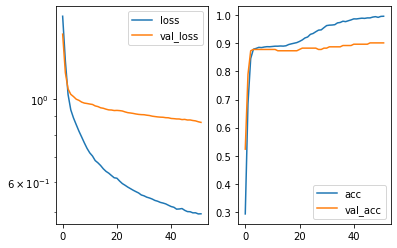

Predicted cell: Cells Probability: [[0.99623823]]
True Cell type: Cells
x [[0.34312028]]
True positional value x 0.2916666666666667
y [[0.5786487]]
True positional value y 0.2916666666666667


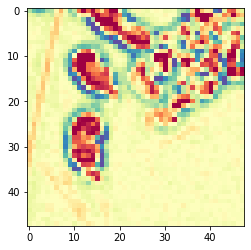

Epoch 53/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4916 - acc: 0.9951 - val_loss: 0.8651 - val_acc: 0.9019

Epoch 00053: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8651049749873508, 'val_acc': 0.901869162777874, 'loss': 0.49158530853951204, 'acc': 0.9950726812301113, 'lr': 1e-06}


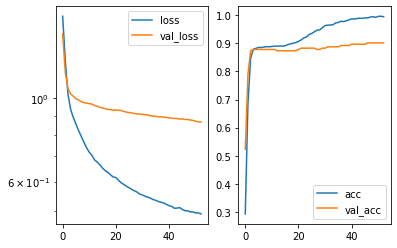

Predicted cell: Cells Probability: [[0.9653908]]
True Cell type: Cells
x [[0.57884735]]
True positional value x 0.5
y [[0.21422358]]
True positional value y 0.2916666666666667


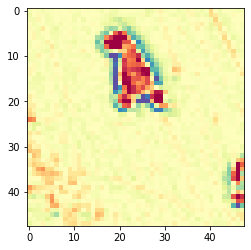

Epoch 54/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4894 - acc: 0.9968 - val_loss: 0.8653 - val_acc: 0.9019

Epoch 00054: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8653056120204035, 'val_acc': 0.901869162777874, 'loss': 0.4893986711906782, 'acc': 0.99679724169823, 'lr': 1e-06}


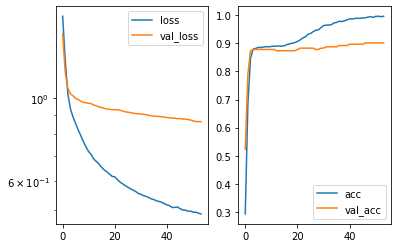

Predicted cell: Cells Probability: [[0.5948668]]
True Cell type: Normal
x [[0.42296204]]
True positional value x 0.5
y [[0.6209464]]
True positional value y 0.5


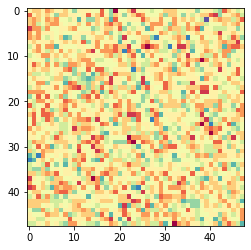

Epoch 55/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4899 - acc: 0.9951 - val_loss: 0.8652 - val_acc: 0.9019

Epoch 00055: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8651751797889995, 'val_acc': 0.901869162777874, 'loss': 0.4899040629899569, 'acc': 0.9950726806427288, 'lr': 1e-06}


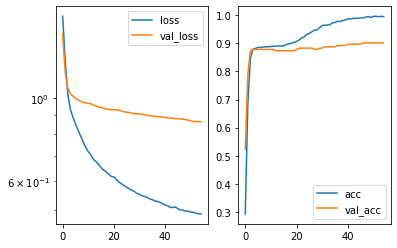

Predicted cell: Cells Probability: [[0.9380347]]
True Cell type: Cells
x [[0.6158347]]
True positional value x 0.7083333333333334
y [[0.26773605]]
True positional value y 0.5


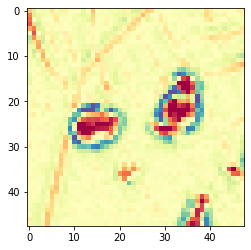

Epoch 56/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4844 - acc: 0.9973 - val_loss: 0.8639 - val_acc: 0.9019

Epoch 00056: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8639498882204573, 'val_acc': 0.901869162777874, 'loss': 0.4843749919088053, 'acc': 0.9972899754842123, 'lr': 1e-06}


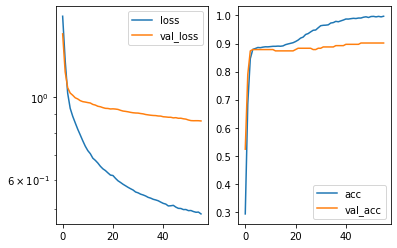

Predicted cell: Cells Probability: [[0.93161273]]
True Cell type: Cells
x [[0.2928651]]
True positional value x 0.5
y [[0.6507472]]
True positional value y 0.7083333333333334


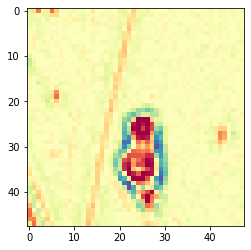

Epoch 57/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4884 - acc: 0.9961 - val_loss: 0.8639 - val_acc: 0.9019

Epoch 00057: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.863911395875093, 'val_acc': 0.901869162777874, 'loss': 0.48838368946620764, 'acc': 0.9960581455714717, 'lr': 1e-06}


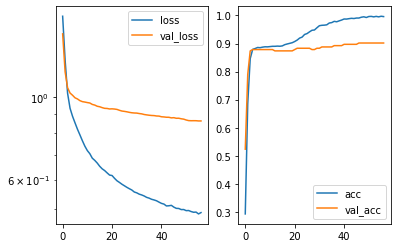

Predicted cell: Cells Probability: [[0.95812416]]
True Cell type: Cells
x [[0.17751026]]
True positional value x 0.2916666666666667
y [[0.19222395]]
True positional value y 0.2916666666666667


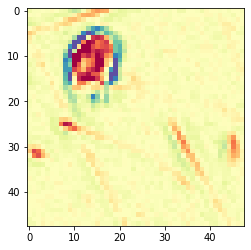

Epoch 58/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4814 - acc: 0.9983 - val_loss: 0.8610 - val_acc: 0.9019

Epoch 00058: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8609704202580675, 'val_acc': 0.901869162777874, 'loss': 0.4813670719835846, 'acc': 0.9982754383571162, 'lr': 1e-06}


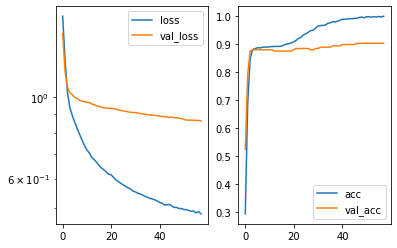

Predicted cell: Cells Probability: [[0.9666852]]
True Cell type: Cells
x [[0.6110363]]
True positional value x 0.7083333333333334
y [[0.5366327]]
True positional value y 0.5


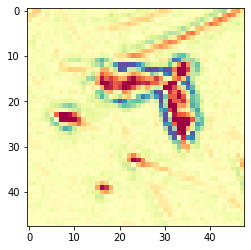

Epoch 59/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4803 - acc: 0.9983 - val_loss: 0.8616 - val_acc: 0.9019

Epoch 00059: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8616487222297169, 'val_acc': 0.901869162777874, 'loss': 0.48034165598806355, 'acc': 0.9982754389444987, 'lr': 1e-06}


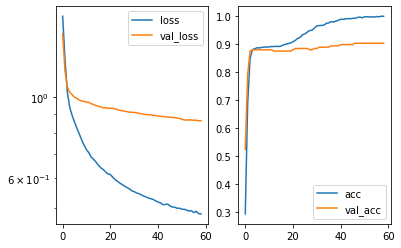

Predicted cell: Cells Probability: [[0.93507653]]
True Cell type: Cells
x [[0.5078148]]
True positional value x 0.5
y [[0.7249179]]
True positional value y 0.5


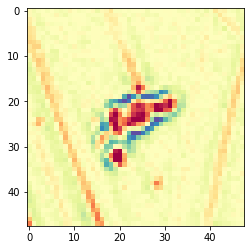

Epoch 60/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4797 - acc: 0.9975 - val_loss: 0.8591 - val_acc: 0.9019

Epoch 00060: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8590770330384513, 'val_acc': 0.901869162777874, 'loss': 0.4797410169062458, 'acc': 0.9975363413492838, 'lr': 1e-06}


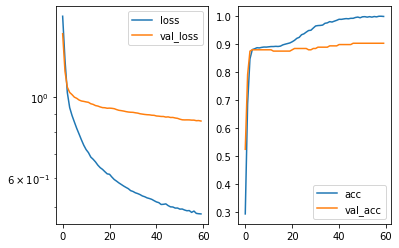

Predicted cell: Cells Probability: [[0.9448311]]
True Cell type: Cells
x [[0.56520176]]
True positional value x 0.7083333333333334
y [[0.18665479]]
True positional value y 0.2916666666666667


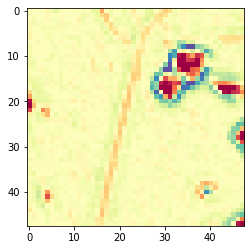

Epoch 61/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4807 - acc: 0.9978 - val_loss: 0.8570 - val_acc: 0.9019

Epoch 00061: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8569987432978977, 'val_acc': 0.901869162777874, 'loss': 0.4806576067075614, 'acc': 0.9977827072143555, 'lr': 1e-06}


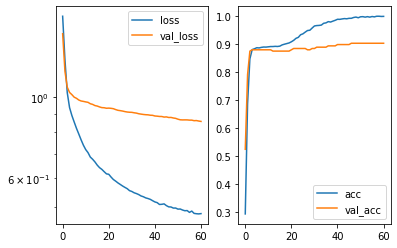

Predicted cell: Cells Probability: [[0.95467067]]
True Cell type: Cells
x [[0.8127445]]
True positional value x 0.7083333333333334
y [[0.19572967]]
True positional value y 0.5


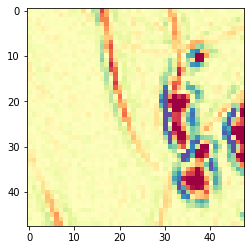

Epoch 62/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4786 - acc: 0.9983 - val_loss: 0.8551 - val_acc: 0.9019

Epoch 00062: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.855083583671356, 'val_acc': 0.901869162777874, 'loss': 0.47861243843533013, 'acc': 0.9982754389444987, 'lr': 1e-06}


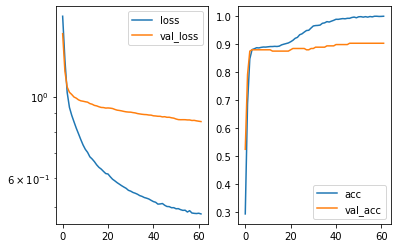

Predicted cell: Cells Probability: [[0.9947483]]
True Cell type: Cells
x [[0.6903337]]
True positional value x 0.7083333333333334
y [[0.55102366]]
True positional value y 0.5


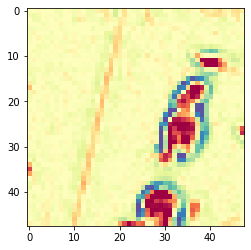

Epoch 63/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4803 - acc: 0.9983 - val_loss: 0.8542 - val_acc: 0.9019

Epoch 00063: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8542272426257623, 'val_acc': 0.901869162777874, 'loss': 0.480303613202388, 'acc': 0.9982754389444987, 'lr': 1e-06}


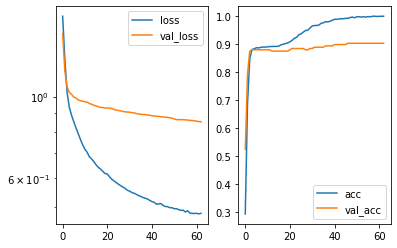

Predicted cell: Cells Probability: [[0.9900093]]
True Cell type: Cells
x [[0.35424206]]
True positional value x 0.5
y [[0.65311]]
True positional value y 0.7083333333333334


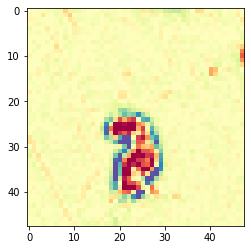

Epoch 64/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4818 - acc: 0.9970 - val_loss: 0.8554 - val_acc: 0.9019

Epoch 00064: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8554488481762254, 'val_acc': 0.901869162777874, 'loss': 0.4817667757093275, 'acc': 0.997043609031758, 'lr': 1e-06}


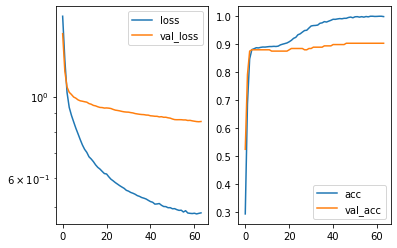

Predicted cell: Cells Probability: [[0.9861261]]
True Cell type: Cells
x [[0.449993]]
True positional value x 0.5
y [[0.7225723]]
True positional value y 0.7083333333333334


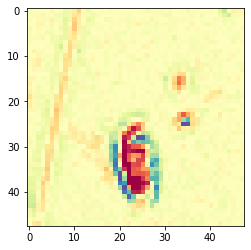

Epoch 65/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4735 - acc: 0.9990 - val_loss: 0.8539 - val_acc: 0.9065

Epoch 00065: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8538534418444768, 'val_acc': 0.9065420555177136, 'loss': 0.4735099036695335, 'acc': 0.9990145365397135, 'lr': 1e-06}


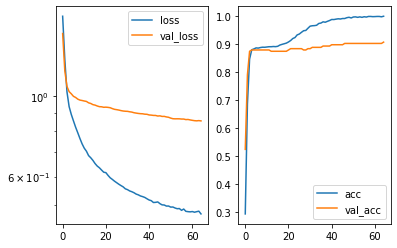

Predicted cell: Cells Probability: [[0.6404753]]
True Cell type: Normal
x [[0.4880852]]
True positional value x 0.5
y [[0.54000515]]
True positional value y 0.5


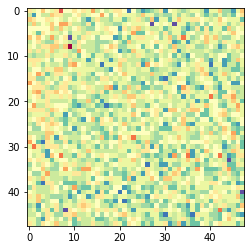

Epoch 66/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4770 - acc: 0.9978 - val_loss: 0.8529 - val_acc: 0.9065

Epoch 00066: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8529219944900441, 'val_acc': 0.9065420555177136, 'loss': 0.47701795735832625, 'acc': 0.9977827072143555, 'lr': 1e-06}


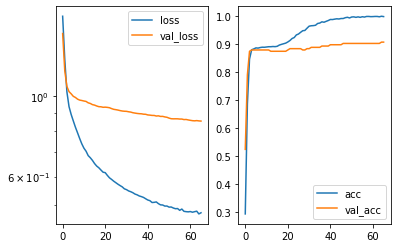

Predicted cell: Cells Probability: [[0.9699525]]
True Cell type: Cells
x [[0.6271287]]
True positional value x 0.5
y [[0.6442736]]
True positional value y 0.7083333333333334


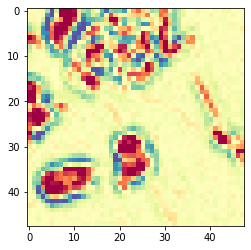

Epoch 67/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4743 - acc: 0.9988 - val_loss: 0.8510 - val_acc: 0.9065

Epoch 00067: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8510086475131667, 'val_acc': 0.9065420555177136, 'loss': 0.47428481679856704, 'acc': 0.998768170674642, 'lr': 1e-06}


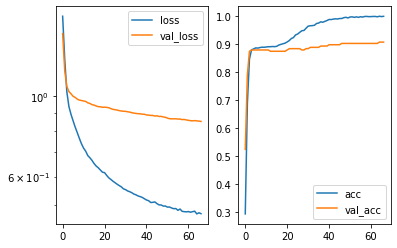

Predicted cell: Cells Probability: [[0.9838108]]
True Cell type: Cells
x [[0.39783835]]
True positional value x 0.5
y [[0.2887947]]
True positional value y 0.2916666666666667


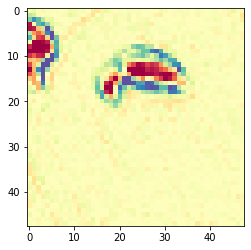

Epoch 68/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4737 - acc: 0.9990 - val_loss: 0.8493 - val_acc: 0.9065

Epoch 00068: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.849274777363394, 'val_acc': 0.9065420555177136, 'loss': 0.47374828466349383, 'acc': 0.9990145365397135, 'lr': 1e-06}


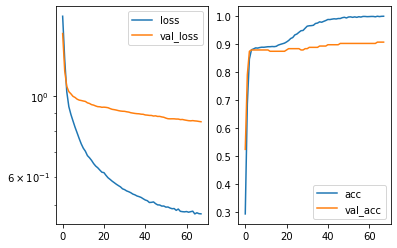

Predicted cell: Cells Probability: [[0.9696312]]
True Cell type: Cells
x [[0.55488527]]
True positional value x 0.7083333333333334
y [[0.24755137]]
True positional value y 0.7083333333333334


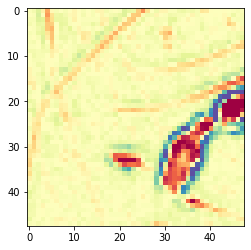

Epoch 69/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4699 - acc: 0.9993 - val_loss: 0.8492 - val_acc: 0.9065

Epoch 00069: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8491522586234262, 'val_acc': 0.9065420555177136, 'loss': 0.46993600024058624, 'acc': 0.9992609024047852, 'lr': 1e-06}


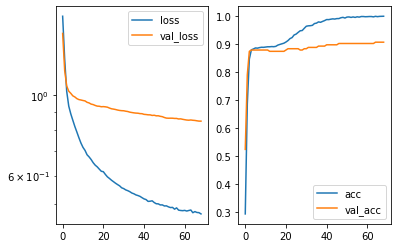

Predicted cell: Cells Probability: [[0.9882755]]
True Cell type: Cells
x [[0.27968013]]
True positional value x 0.2916666666666667
y [[0.2510028]]
True positional value y 0.5


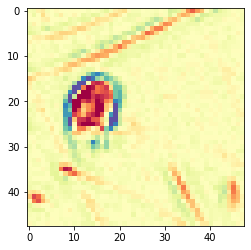

Epoch 70/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4702 - acc: 0.9993 - val_loss: 0.8487 - val_acc: 0.9065

Epoch 00070: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8487395270962581, 'val_acc': 0.9065420555177136, 'loss': 0.4702463179393542, 'acc': 0.9992609024047852, 'lr': 1e-06}


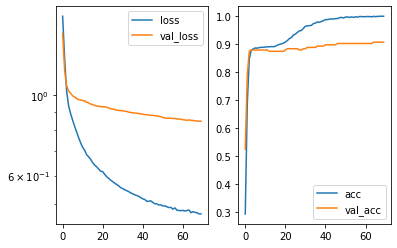

Predicted cell: Normal Probability: [[0.5658923]]
True Cell type: Normal
x [[0.6740545]]
True positional value x 0.5
y [[0.3839745]]
True positional value y 0.5


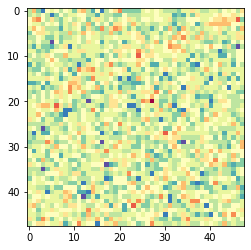

Epoch 71/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4678 - acc: 0.9990 - val_loss: 0.8487 - val_acc: 0.9065

Epoch 00071: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.848682465397309, 'val_acc': 0.9065420555177136, 'loss': 0.46780547606119766, 'acc': 0.9990145365397135, 'lr': 1e-06}


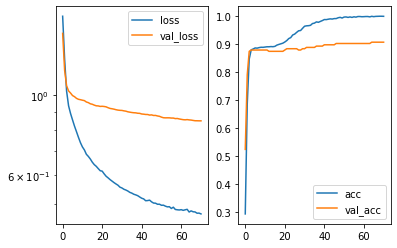

Predicted cell: Cells Probability: [[0.995621]]
True Cell type: Cells
x [[0.63817006]]
True positional value x 0.2916666666666667
y [[0.5372505]]
True positional value y 0.2916666666666667


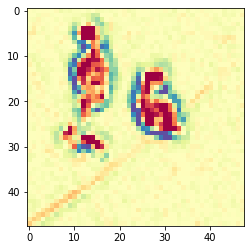

Epoch 72/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4682 - acc: 0.9990 - val_loss: 0.8476 - val_acc: 0.9065

Epoch 00072: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8476472847929625, 'val_acc': 0.9065420555177136, 'loss': 0.4682475406420469, 'acc': 0.9990145365397135, 'lr': 1e-06}


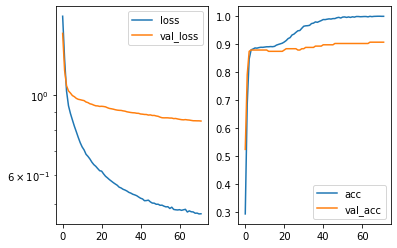

Predicted cell: Cells Probability: [[0.9636772]]
True Cell type: Cells
x [[0.2489284]]
True positional value x 0.2916666666666667
y [[0.43213224]]
True positional value y 0.2916666666666667


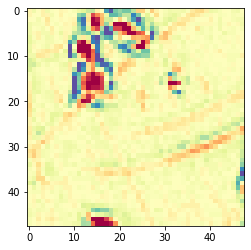

Epoch 73/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4685 - acc: 0.9990 - val_loss: 0.8453 - val_acc: 0.9065

Epoch 00073: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.845300675552582, 'val_acc': 0.9065420555177136, 'loss': 0.46853960519296306, 'acc': 0.999014535952331, 'lr': 1e-06}


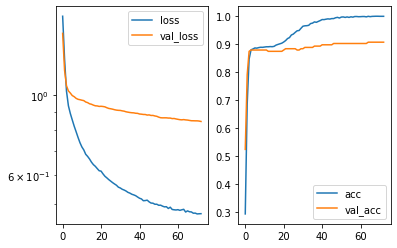

Predicted cell: Cells Probability: [[0.9434681]]
True Cell type: Cells
x [[0.31863767]]
True positional value x 0.2916666666666667
y [[0.65509313]]
True positional value y 0.7083333333333334


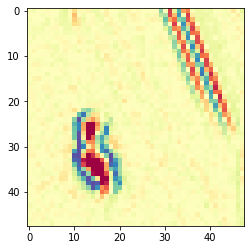

Epoch 74/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4683 - acc: 0.9993 - val_loss: 0.8461 - val_acc: 0.9065

Epoch 00074: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8461425465958141, 'val_acc': 0.9065420555177136, 'loss': 0.4682563697507623, 'acc': 0.9992609018174026, 'lr': 1e-06}


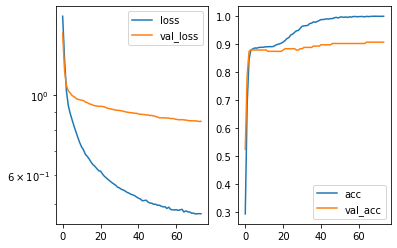

Predicted cell: Cells Probability: [[0.95833105]]
True Cell type: Cells
x [[0.6664651]]
True positional value x 0.7083333333333334
y [[0.5263438]]
True positional value y 0.5


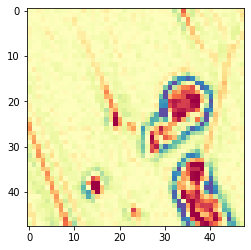

Epoch 75/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4674 - acc: 0.9988 - val_loss: 0.8447 - val_acc: 0.9065

Epoch 00075: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8447297772514486, 'val_acc': 0.9065420555177136, 'loss': 0.46737761284865076, 'acc': 0.998768170674642, 'lr': 1e-06}


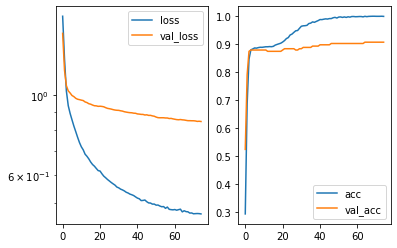

Predicted cell: Cells Probability: [[0.97556096]]
True Cell type: Cells
x [[0.50825757]]
True positional value x 0.7083333333333334
y [[0.6533783]]
True positional value y 0.2916666666666667


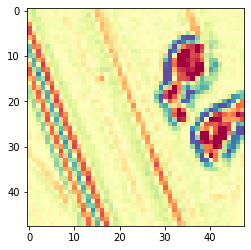

Epoch 76/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4677 - acc: 0.9988 - val_loss: 0.8443 - val_acc: 0.9065

Epoch 00076: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8443185235852393, 'val_acc': 0.9065420555177136, 'loss': 0.46774056140470166, 'acc': 0.998768170674642, 'lr': 1e-06}


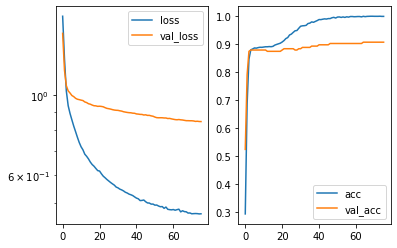

Predicted cell: Cells Probability: [[0.97348815]]
True Cell type: Cells
x [[0.6078293]]
True positional value x 0.5
y [[0.6364187]]
True positional value y 0.7083333333333334


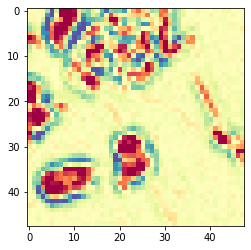

Epoch 77/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4656 - acc: 0.9998 - val_loss: 0.8436 - val_acc: 0.9065

Epoch 00077: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8435690882049989, 'val_acc': 0.9065420555177136, 'loss': 0.46558407106902333, 'acc': 0.9997536341349283, 'lr': 1e-06}


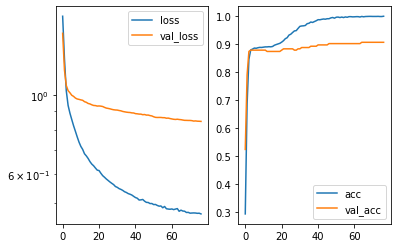

Predicted cell: Cells Probability: [[0.9617344]]
True Cell type: Cells
x [[0.7739899]]
True positional value x 0.7083333333333334
y [[0.83662635]]
True positional value y 0.7083333333333334


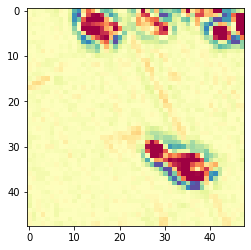

Epoch 78/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4636 - acc: 0.9990 - val_loss: 0.8413 - val_acc: 0.9065

Epoch 00078: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8412968293528691, 'val_acc': 0.9065420555177136, 'loss': 0.4636345896470661, 'acc': 0.9990145365397135, 'lr': 1e-06}


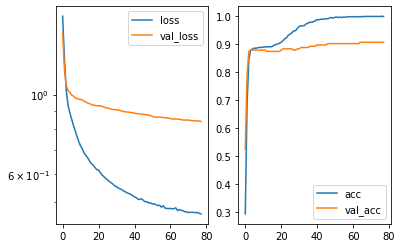

Predicted cell: Cells Probability: [[0.9463253]]
True Cell type: Cells
x [[0.383283]]
True positional value x 0.2916666666666667
y [[0.85242313]]
True positional value y 0.7083333333333334


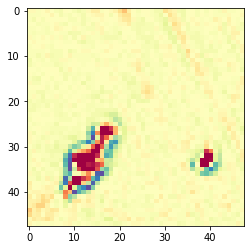

Epoch 79/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4644 - acc: 0.9995 - val_loss: 0.8414 - val_acc: 0.9065

Epoch 00079: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8414184233852636, 'val_acc': 0.9065420555177136, 'loss': 0.4644464125962761, 'acc': 0.9995072682698568, 'lr': 1e-06}


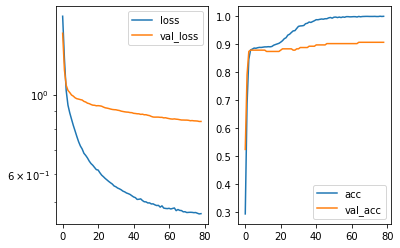

Predicted cell: Cells Probability: [[0.98901176]]
True Cell type: Cells
x [[0.72509986]]
True positional value x 0.7083333333333334
y [[0.73152155]]
True positional value y 0.7083333333333334


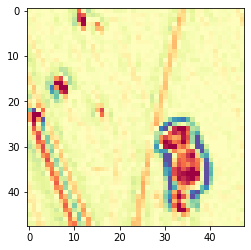

Epoch 80/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4641 - acc: 0.9993 - val_loss: 0.8424 - val_acc: 0.9065

Epoch 00080: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8423958515452448, 'val_acc': 0.9065420555177136, 'loss': 0.46406158284325705, 'acc': 0.9992609024047852, 'lr': 1e-06}


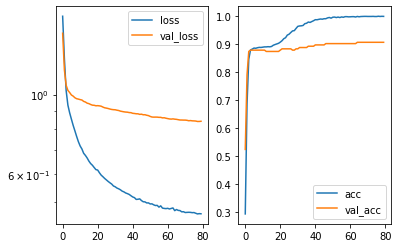

Predicted cell: Cells Probability: [[0.97751343]]
True Cell type: Cells
x [[0.6305203]]
True positional value x 0.7083333333333334
y [[0.55450904]]
True positional value y 0.5


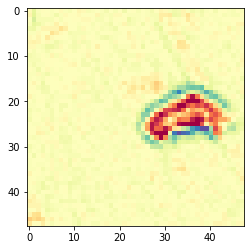

Epoch 81/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4651 - acc: 0.9988 - val_loss: 0.8422 - val_acc: 0.9065

Epoch 00081: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.842181064258112, 'val_acc': 0.9065420555177136, 'loss': 0.4650786391001201, 'acc': 0.998768170674642, 'lr': 1e-06}


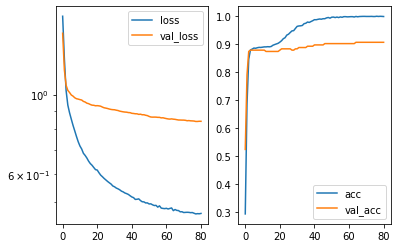

Predicted cell: Cells Probability: [[0.953337]]
True Cell type: Cells
x [[0.62001866]]
True positional value x 0.7083333333333334
y [[0.2574293]]
True positional value y 0.5


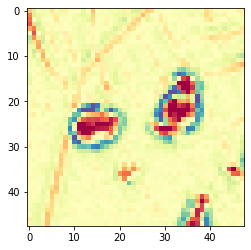

Epoch 82/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4642 - acc: 0.9993 - val_loss: 0.8425 - val_acc: 0.9065

Epoch 00082: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.

Epoch 00082: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8425347520926288, 'val_acc': 0.9065420555177136, 'loss': 0.4641785482653669, 'acc': 0.9992609024047852, 'lr': 1e-06}


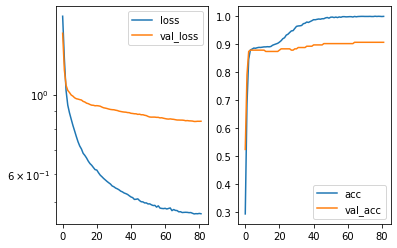

Predicted cell: Cells Probability: [[0.9177565]]
True Cell type: Cells
x [[0.78218544]]
True positional value x 0.5
y [[0.21218598]]
True positional value y 0.2916666666666667


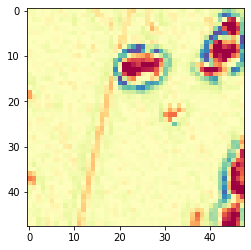

Epoch 83/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4616 - acc: 0.9995 - val_loss: 0.8419 - val_acc: 0.9065

Epoch 00083: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8418871013917656, 'val_acc': 0.9065420555177136, 'loss': 0.46161080251834935, 'acc': 0.9995072682698568, 'lr': 1e-07}


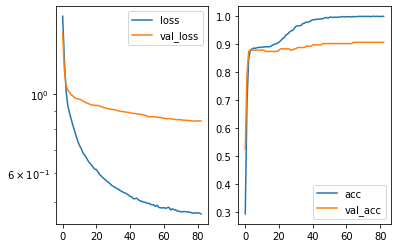

Predicted cell: Cells Probability: [[0.99850863]]
True Cell type: Cells
x [[0.3184592]]
True positional value x 0.5
y [[0.24410148]]
True positional value y 0.2916666666666667


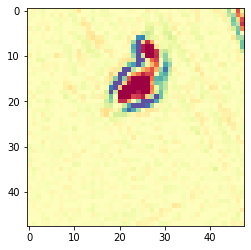

Epoch 84/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4620 - acc: 1.0000 - val_loss: 0.8412 - val_acc: 0.9065

Epoch 00084: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.841163924364286, 'val_acc': 0.9065420555177136, 'loss': 0.4619840065168318, 'acc': 1.0, 'lr': 1e-07}


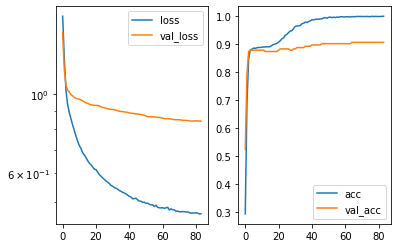

Predicted cell: Cells Probability: [[0.91203463]]
True Cell type: Cells
x [[0.6630606]]
True positional value x 0.7083333333333334
y [[0.35464677]]
True positional value y 0.5


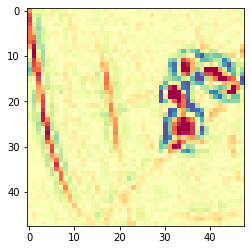

Epoch 85/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4622 - acc: 0.9993 - val_loss: 0.8405 - val_acc: 0.9065

Epoch 00085: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8404828092762243, 'val_acc': 0.9065420555177136, 'loss': 0.4622216211307457, 'acc': 0.9992609020964093, 'lr': 1e-07}


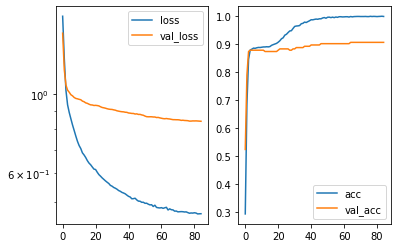

Predicted cell: Cells Probability: [[0.9889714]]
True Cell type: Cells
x [[0.7626652]]
True positional value x 0.7083333333333334
y [[0.25747162]]
True positional value y 0.2916666666666667


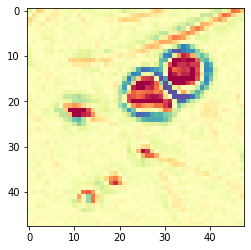

Epoch 86/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4611 - acc: 0.9998 - val_loss: 0.8397 - val_acc: 0.9065

Epoch 00086: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8397142530601716, 'val_acc': 0.9065420555177136, 'loss': 0.46108953553809706, 'acc': 0.9997536341349283, 'lr': 1e-07}


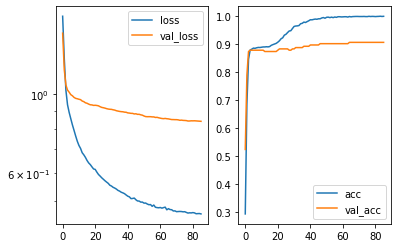

Predicted cell: Cells Probability: [[0.9660421]]
True Cell type: Cells
x [[0.27222297]]
True positional value x 0.2916666666666667
y [[0.18204539]]
True positional value y 0.2916666666666667


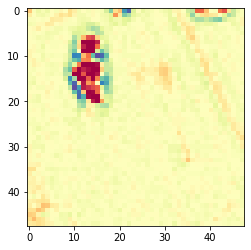

Epoch 87/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4591 - acc: 0.9998 - val_loss: 0.8393 - val_acc: 0.9065

Epoch 00087: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8393379037625321, 'val_acc': 0.9065420555177136, 'loss': 0.45910429066112696, 'acc': 0.9997536341349283, 'lr': 1e-07}


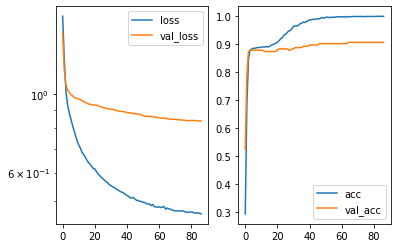

Predicted cell: Cells Probability: [[0.9942198]]
True Cell type: Cells
x [[0.5888201]]
True positional value x 0.7083333333333334
y [[0.15390058]]
True positional value y 0.2916666666666667


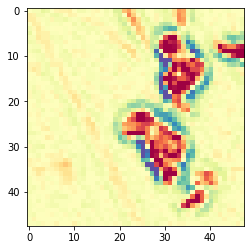

Epoch 88/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4613 - acc: 0.9998 - val_loss: 0.8392 - val_acc: 0.9065

Epoch 00088: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8392050238413231, 'val_acc': 0.9065420555177136, 'loss': 0.46131302313165556, 'acc': 0.9997536341349283, 'lr': 1e-07}


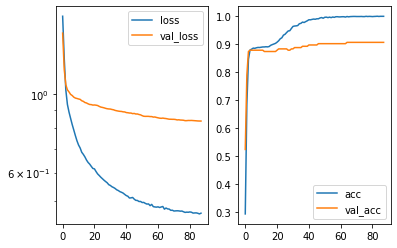

Predicted cell: Cells Probability: [[0.97181296]]
True Cell type: Cells
x [[0.26863867]]
True positional value x 0.2916666666666667
y [[0.34106937]]
True positional value y 0.5


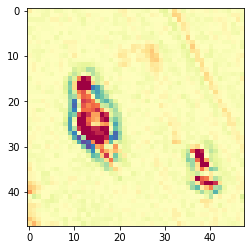

Epoch 89/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4608 - acc: 1.0000 - val_loss: 0.8391 - val_acc: 0.9065

Epoch 00089: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8391099226808993, 'val_acc': 0.9065420555177136, 'loss': 0.4608049190860865, 'acc': 1.0, 'lr': 1e-07}


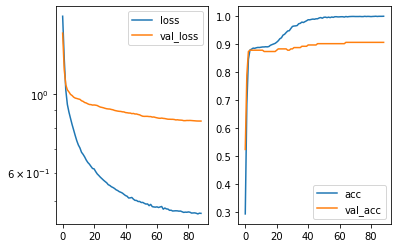

Predicted cell: Cells Probability: [[0.94316524]]
True Cell type: Cells
x [[0.32256863]]
True positional value x 0.2916666666666667
y [[0.4363126]]
True positional value y 0.2916666666666667


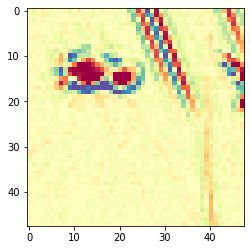

Epoch 90/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4598 - acc: 0.9998 - val_loss: 0.8390 - val_acc: 0.9065

Epoch 00090: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8389906872098691, 'val_acc': 0.9065420555177136, 'loss': 0.45976791160980096, 'acc': 0.9997536341349283, 'lr': 1e-07}


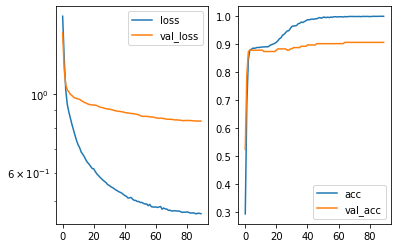

Predicted cell: Cells Probability: [[0.63425374]]
True Cell type: Normal
x [[0.5726938]]
True positional value x 0.5
y [[0.6817815]]
True positional value y 0.5


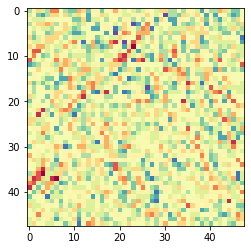

Epoch 91/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4617 - acc: 1.0000 - val_loss: 0.8388 - val_acc: 0.9065

Epoch 00091: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.

Epoch 00091: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8388273972217167, 'val_acc': 0.9065420555177136, 'loss': 0.46165997681285276, 'acc': 1.0, 'lr': 1e-07}


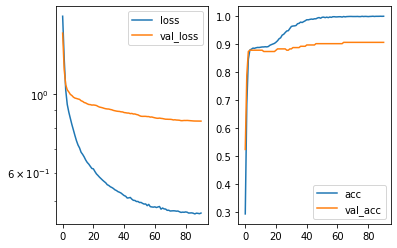

Predicted cell: Normal Probability: [[0.62788814]]
True Cell type: Normal
x [[0.67942506]]
True positional value x 0.5
y [[0.6726948]]
True positional value y 0.5


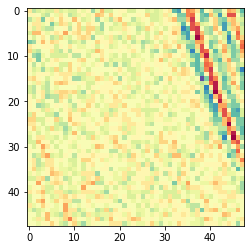

Epoch 92/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4622 - acc: 0.9990 - val_loss: 0.8387 - val_acc: 0.9065

Epoch 00092: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8387204870999416, 'val_acc': 0.9065420555177136, 'loss': 0.46217908928857765, 'acc': 0.9990145365397135, 'lr': 1e-08}


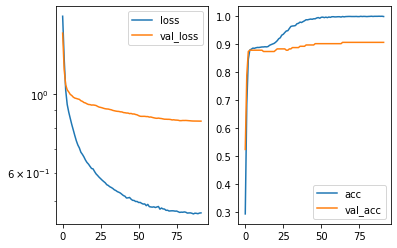

Predicted cell: Cells Probability: [[0.9975708]]
True Cell type: Cells
x [[0.27660426]]
True positional value x 0.5
y [[0.19903885]]
True positional value y 0.2916666666666667


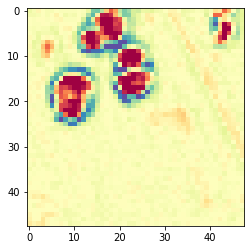

Epoch 93/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4588 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00093: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385335658198205, 'val_acc': 0.9065420555177136, 'loss': 0.45875960329272647, 'acc': 0.9997536341349283, 'lr': 1e-08}


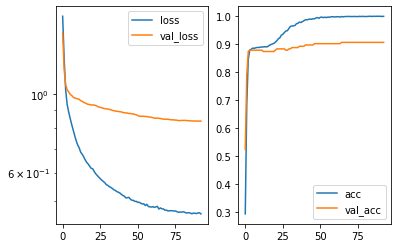

Predicted cell: Cells Probability: [[0.98307574]]
True Cell type: Cells
x [[0.53608495]]
True positional value x 0.5
y [[0.69254684]]
True positional value y 0.7083333333333334


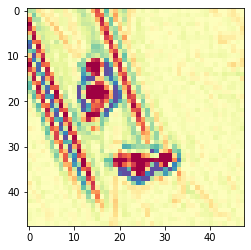

Epoch 94/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4628 - acc: 0.9985 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00094: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8386037789772605, 'val_acc': 0.9065420555177136, 'loss': 0.4627827801678562, 'acc': 0.9985218048095703, 'lr': 1e-08}


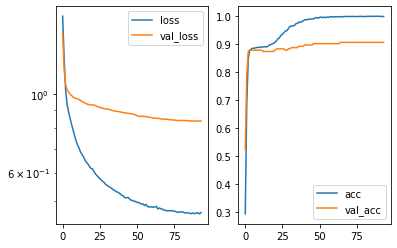

Predicted cell: Cells Probability: [[0.9835902]]
True Cell type: Cells
x [[0.45026535]]
True positional value x 0.5
y [[0.4207523]]
True positional value y 0.2916666666666667


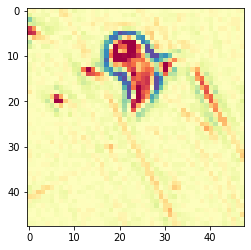

Epoch 95/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4623 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00095: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384807650173935, 'val_acc': 0.9065420555177136, 'loss': 0.4622524604329807, 'acc': 0.9997536335475459, 'lr': 1e-08}


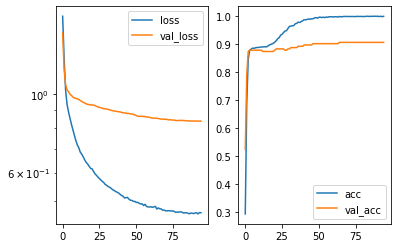

Predicted cell: Cells Probability: [[0.92041147]]
True Cell type: Cells
x [[0.6964427]]
True positional value x 0.7083333333333334
y [[0.669625]]
True positional value y 0.5


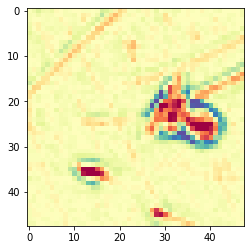

Epoch 96/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4595 - acc: 1.0000 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00096: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385500434403107, 'val_acc': 0.9065420555177136, 'loss': 0.45954296788754617, 'acc': 1.0, 'lr': 1e-08}


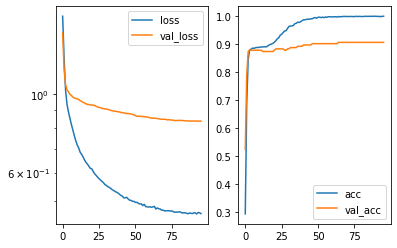

Predicted cell: Cells Probability: [[0.96995103]]
True Cell type: Cells
x [[0.25519362]]
True positional value x 0.2916666666666667
y [[0.42177284]]
True positional value y 0.2916666666666667


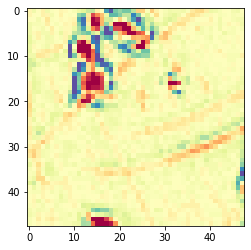

Epoch 97/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4621 - acc: 0.9995 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00097: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.

Epoch 00097: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.838378199350054, 'val_acc': 0.9065420555177136, 'loss': 0.4621345992084206, 'acc': 0.9995072682698568, 'lr': 1e-08}


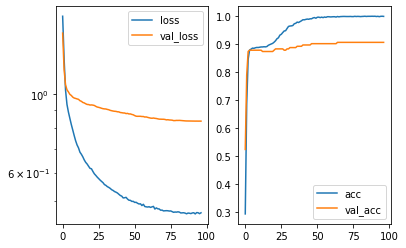

Predicted cell: Cells Probability: [[0.95826024]]
True Cell type: Cells
x [[0.5171729]]
True positional value x 0.5
y [[0.72987074]]
True positional value y 0.5


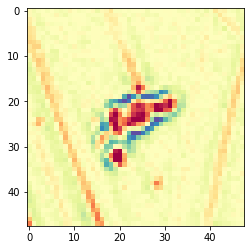

Epoch 98/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4623 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00098: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384206423135562, 'val_acc': 0.9065420555177136, 'loss': 0.46231143014658316, 'acc': 0.9997536341349283, 'lr': 1e-09}


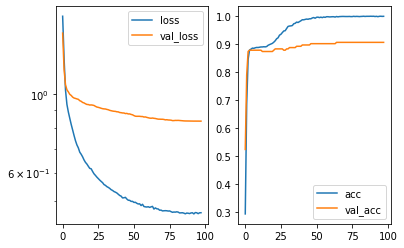

Predicted cell: Cells Probability: [[0.94367313]]
True Cell type: Cells
x [[0.28925028]]
True positional value x 0.2916666666666667
y [[0.21963575]]
True positional value y 0.7083333333333334


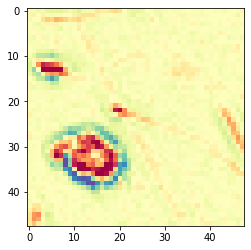

Epoch 99/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4603 - acc: 0.9998 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00099: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383498721033613, 'val_acc': 0.9065420555177136, 'loss': 0.4603110683334376, 'acc': 0.9997536341349283, 'lr': 1e-09}


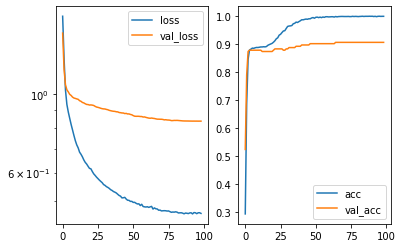

Predicted cell: Cells Probability: [[0.9792269]]
True Cell type: Cells
x [[0.58230597]]
True positional value x 0.5
y [[0.2160622]]
True positional value y 0.2916666666666667


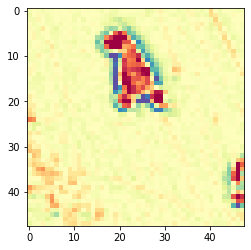

Epoch 100/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4623 - acc: 0.9995 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00100: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384956004463624, 'val_acc': 0.9065420555177136, 'loss': 0.46228254521295453, 'acc': 0.9995072682698568, 'lr': 1e-09}


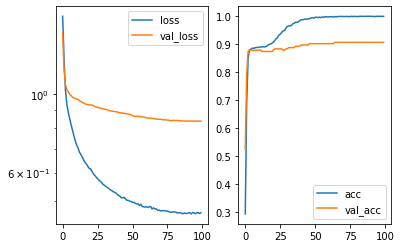

Predicted cell: Cells Probability: [[0.9952388]]
True Cell type: Cells
x [[0.12248741]]
True positional value x 0.5
y [[0.88412446]]
True positional value y 0.2916666666666667


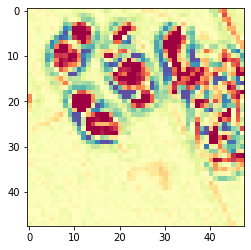

Epoch 101/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4602 - acc: 1.0000 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00101: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.

Epoch 00101: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384818178471004, 'val_acc': 0.9065420555177136, 'loss': 0.46020615650797514, 'acc': 1.0, 'lr': 1e-09}


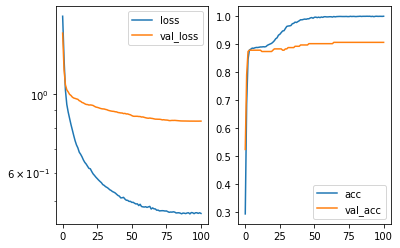

Predicted cell: Cells Probability: [[0.96604997]]
True Cell type: Cells
x [[0.5639458]]
True positional value x 0.7083333333333334
y [[0.16851586]]
True positional value y 0.2916666666666667


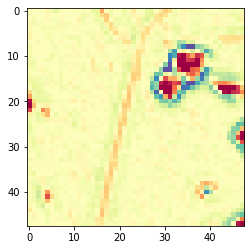

Epoch 102/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4621 - acc: 1.0000 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00102: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385651094891201, 'val_acc': 0.9065420555177136, 'loss': 0.4621328980898029, 'acc': 1.0, 'lr': 9.9999994e-11}


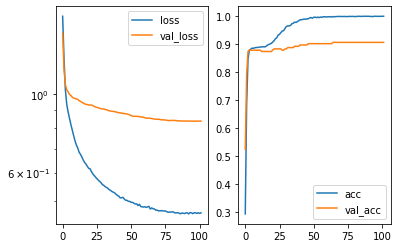

Predicted cell: Cells Probability: [[0.9973436]]
True Cell type: Cells
x [[0.4720755]]
True positional value x 0.2916666666666667
y [[0.5317795]]
True positional value y 0.2916666666666667


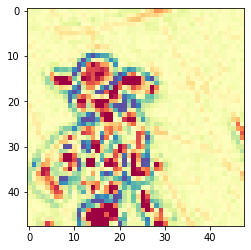

Epoch 103/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4623 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00103: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385350854597359, 'val_acc': 0.9065420555177136, 'loss': 0.4622918424949355, 'acc': 0.9997536341349283, 'lr': 9.9999994e-11}


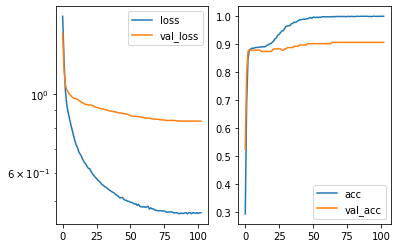

Predicted cell: Cells Probability: [[0.92201746]]
True Cell type: Cells
x [[0.7838422]]
True positional value x 0.5
y [[0.21762952]]
True positional value y 0.2916666666666667


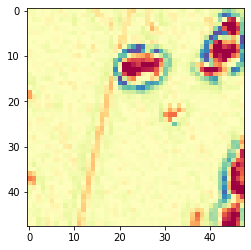

Epoch 104/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4609 - acc: 0.9995 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00104: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385098732520486, 'val_acc': 0.9065420555177136, 'loss': 0.46089858944470674, 'acc': 0.9995072682698568, 'lr': 9.9999994e-11}


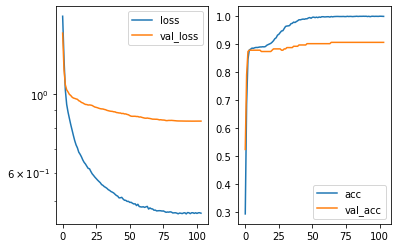

Predicted cell: Cells Probability: [[0.973825]]
True Cell type: Cells
x [[0.6786871]]
True positional value x 0.5
y [[0.1800567]]
True positional value y 0.2916666666666667


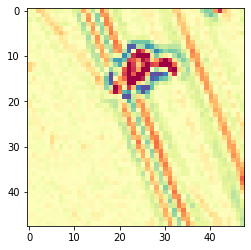

Epoch 105/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4611 - acc: 0.9993 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00105: ReduceLROnPlateau reducing learning rate to 9.99999943962493e-12.

Epoch 00105: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8386086320208612, 'val_acc': 0.9065420555177136, 'loss': 0.46112832159765776, 'acc': 0.9992609024047852, 'lr': 9.9999994e-11}


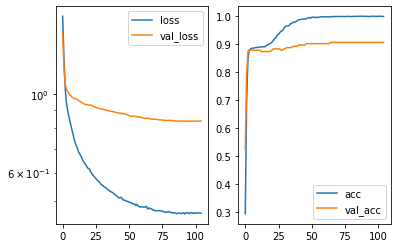

Predicted cell: Cells Probability: [[0.99350184]]
True Cell type: Cells
x [[0.24816637]]
True positional value x 0.5
y [[0.5433222]]
True positional value y 0.5


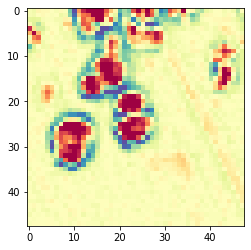

Epoch 106/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4615 - acc: 0.9993 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00106: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385676106559896, 'val_acc': 0.9065420555177136, 'loss': 0.46148307132115945, 'acc': 0.9992609024047852, 'lr': 9.999999e-12}


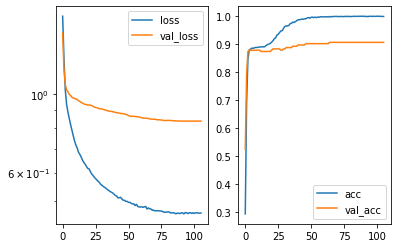

Predicted cell: Cells Probability: [[0.9962748]]
True Cell type: Cells
x [[0.36364475]]
True positional value x 0.2916666666666667
y [[0.58971083]]
True positional value y 0.2916666666666667


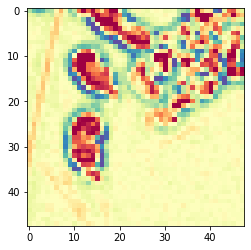

Epoch 107/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4593 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00107: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384448473698625, 'val_acc': 0.9065420555177136, 'loss': 0.45928353604996663, 'acc': 0.9997536341349283, 'lr': 9.999999e-12}


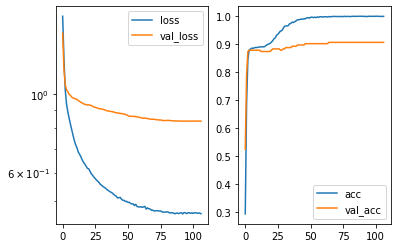

Predicted cell: Cells Probability: [[0.92584527]]
True Cell type: Cells
x [[0.4368508]]
True positional value x 0.5
y [[0.5602488]]
True positional value y 0.5


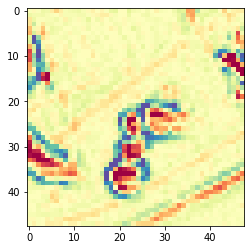

Epoch 108/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4599 - acc: 1.0000 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00108: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383616337152285, 'val_acc': 0.9065420555177136, 'loss': 0.45986974743029907, 'acc': 1.0, 'lr': 9.999999e-12}


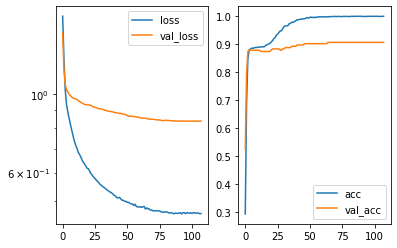

Predicted cell: Cells Probability: [[0.96074843]]
True Cell type: Cells
x [[0.76214707]]
True positional value x 0.2916666666666667
y [[0.7171039]]
True positional value y 0.5


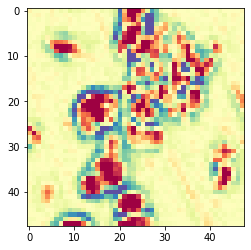

Epoch 109/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4609 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00109: ReduceLROnPlateau reducing learning rate to 9.999999092680235e-13.

Epoch 00109: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384267019334241, 'val_acc': 0.9065420555177136, 'loss': 0.4608929452123123, 'acc': 0.9997536341349283, 'lr': 9.999999e-12}


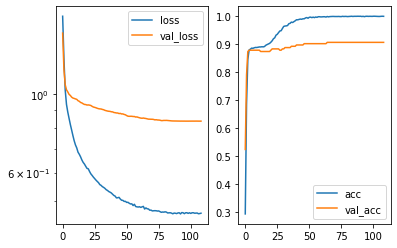

Predicted cell: Cells Probability: [[0.9937518]]
True Cell type: Cells
x [[0.8609192]]
True positional value x 0.7083333333333334
y [[0.47449905]]
True positional value y 0.2916666666666667


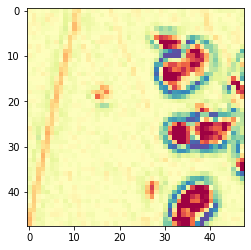

Epoch 110/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4613 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00110: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383811751258707, 'val_acc': 0.9065420555177136, 'loss': 0.46128574129718075, 'acc': 0.9997536341349283, 'lr': 9.999999e-13}


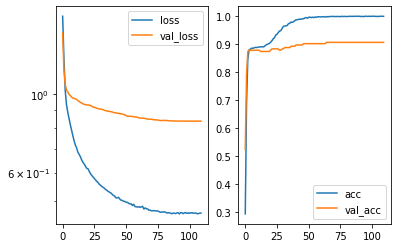

Predicted cell: Cells Probability: [[0.9962263]]
True Cell type: Cells
x [[0.2125811]]
True positional value x 0.2916666666666667
y [[0.7842334]]
True positional value y 0.7083333333333334


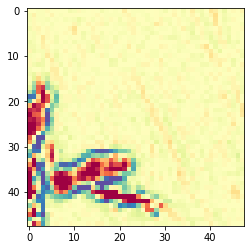

Epoch 111/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4614 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00111: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384301411771329, 'val_acc': 0.9065420555177136, 'loss': 0.46137994343525496, 'acc': 0.9997536341349283, 'lr': 9.999999e-13}


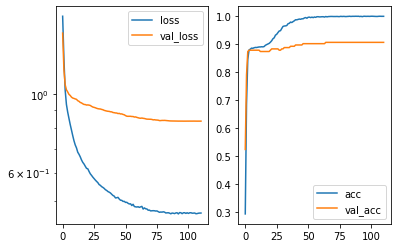

Predicted cell: Cells Probability: [[0.9967951]]
True Cell type: Cells
x [[0.6477611]]
True positional value x 0.7083333333333334
y [[0.5624626]]
True positional value y 0.7083333333333334


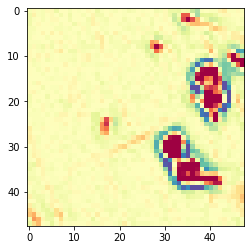

Epoch 112/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4630 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00112: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384533468807969, 'val_acc': 0.9065420555177136, 'loss': 0.4630105230029389, 'acc': 0.9997536341349283, 'lr': 9.999999e-13}


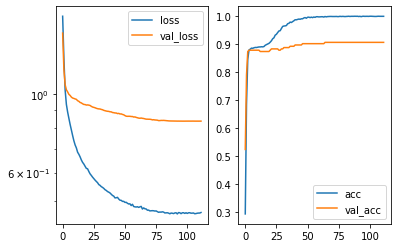

Predicted cell: Normal Probability: [[0.8628048]]
True Cell type: Normal
x [[0.4096482]]
True positional value x 0.5
y [[0.3246591]]
True positional value y 0.5


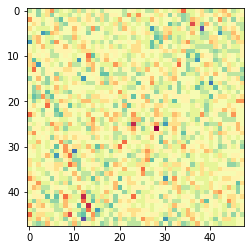

Epoch 113/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4592 - acc: 0.9995 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00113: ReduceLROnPlateau reducing learning rate to 9.9999988758398e-14.

Epoch 00113: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383669803075702, 'val_acc': 0.9065420555177136, 'loss': 0.4592299637726358, 'acc': 0.9995072682698568, 'lr': 9.999999e-13}


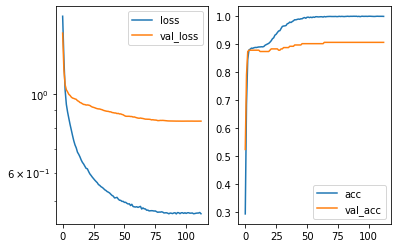

Predicted cell: Cells Probability: [[0.9834432]]
True Cell type: Cells
x [[0.6125105]]
True positional value x 0.5
y [[0.6016324]]
True positional value y 0.5


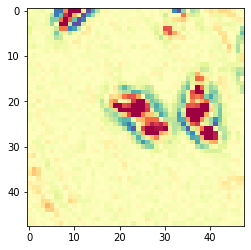

Epoch 114/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4609 - acc: 0.9995 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00114: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384338355510035, 'val_acc': 0.9065420555177136, 'loss': 0.4608551461390011, 'acc': 0.9995072682698568, 'lr': 9.999999e-14}


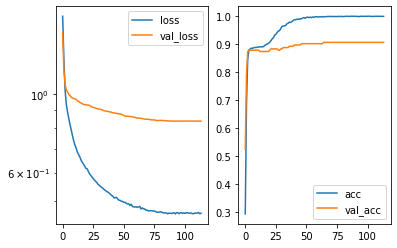

Predicted cell: Cells Probability: [[0.986894]]
True Cell type: Cells
x [[0.39647204]]
True positional value x 0.5
y [[0.78530556]]
True positional value y 0.7083333333333334


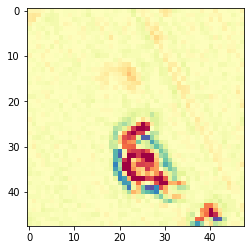

Epoch 115/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4622 - acc: 0.9998 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00115: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385829585734929, 'val_acc': 0.9065420555177136, 'loss': 0.4621805635306835, 'acc': 0.9997536341349283, 'lr': 9.999999e-14}


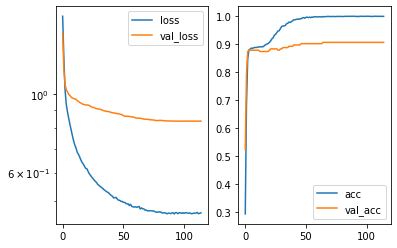

Predicted cell: Normal Probability: [[0.67000055]]
True Cell type: Normal
x [[0.75040543]]
True positional value x 0.5
y [[0.52180684]]
True positional value y 0.5


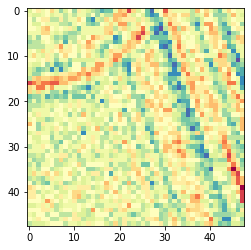

Epoch 116/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4589 - acc: 1.0000 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00116: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384936206808714, 'val_acc': 0.9065420555177136, 'loss': 0.4588639862976746, 'acc': 1.0, 'lr': 9.999999e-14}


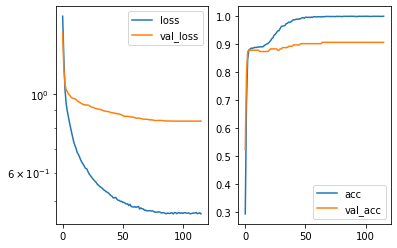

Predicted cell: Cells Probability: [[0.99535996]]
True Cell type: Cells
x [[0.2289335]]
True positional value x 0.2916666666666667
y [[0.43330047]]
True positional value y 0.2916666666666667


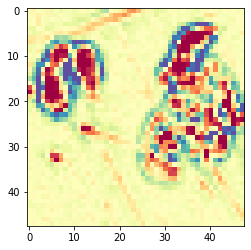

Epoch 117/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4603 - acc: 0.9995 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00117: ReduceLROnPlateau reducing learning rate to 9.999999146890344e-15.

Epoch 00117: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385653278538, 'val_acc': 0.9065420555177136, 'loss': 0.46033457002342554, 'acc': 0.9995072682698568, 'lr': 9.999999e-14}


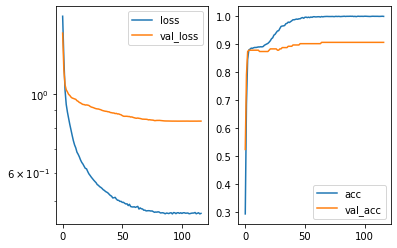

Predicted cell: Cells Probability: [[0.95995677]]
True Cell type: Cells
x [[0.6930867]]
True positional value x 0.7083333333333334
y [[0.4594399]]
True positional value y 0.5


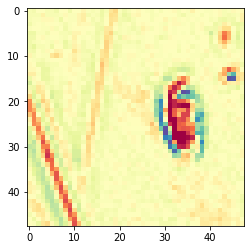

Epoch 118/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4599 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00118: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385254283931768, 'val_acc': 0.9065420555177136, 'loss': 0.4598940350821994, 'acc': 0.9997536341349283, 'lr': 9.999999e-15}


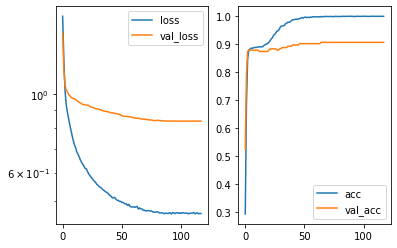

Predicted cell: Cells Probability: [[0.9894996]]
True Cell type: Cells
x [[0.3904264]]
True positional value x 0.5
y [[0.28768867]]
True positional value y 0.2916666666666667


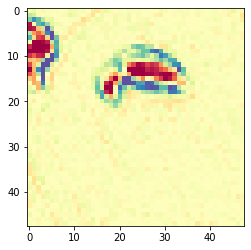

Epoch 119/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4594 - acc: 1.0000 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00119: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385624946834885, 'val_acc': 0.9065420555177136, 'loss': 0.459435087445335, 'acc': 1.0, 'lr': 9.999999e-15}


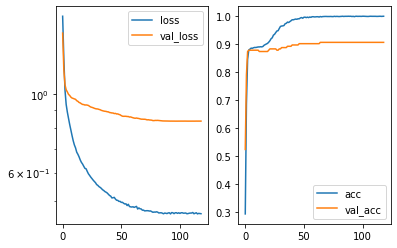

Predicted cell: Cells Probability: [[0.99131835]]
True Cell type: Cells
x [[0.27243307]]
True positional value x 0.2916666666666667
y [[0.24495679]]
True positional value y 0.5


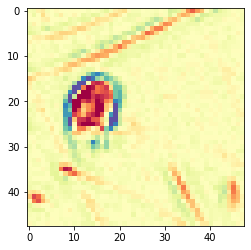

Epoch 120/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4598 - acc: 0.9998 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00120: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8386020175764494, 'val_acc': 0.9065420555177136, 'loss': 0.4598438070821304, 'acc': 0.9997536341349283, 'lr': 9.999999e-15}


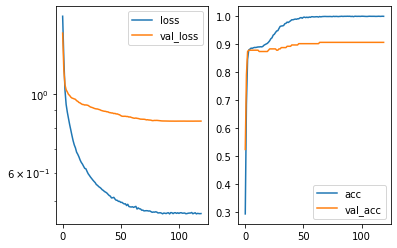

Predicted cell: Cells Probability: [[0.98841095]]
True Cell type: Cells
x [[0.253911]]
True positional value x 0.2916666666666667
y [[0.46323654]]
True positional value y 0.2916666666666667


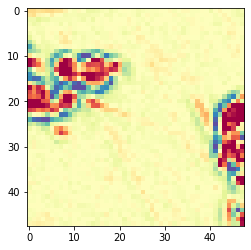

Epoch 121/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4628 - acc: 0.9990 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00121: ReduceLROnPlateau reducing learning rate to 9.999998977483753e-16.

Epoch 00121: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384556441663582, 'val_acc': 0.9065420555177136, 'loss': 0.4628428782727161, 'acc': 0.9990145365397135, 'lr': 9.999999e-15}


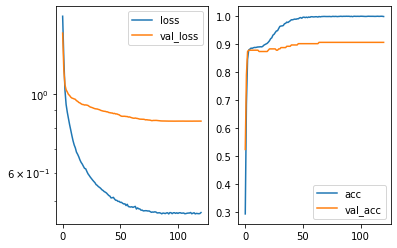

Predicted cell: Cells Probability: [[0.9964449]]
True Cell type: Cells
x [[0.39151534]]
True positional value x 0.5
y [[0.20271784]]
True positional value y 0.5


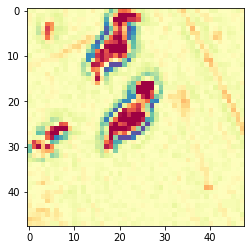

Epoch 122/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4611 - acc: 1.0000 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00122: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384629226176539, 'val_acc': 0.9065420555177136, 'loss': 0.46114135499246073, 'acc': 1.0, 'lr': 9.999999e-16}


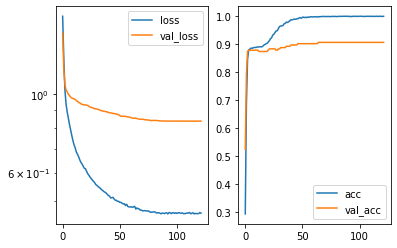

Predicted cell: Cells Probability: [[0.9635009]]
True Cell type: Cells
x [[0.4448637]]
True positional value x 0.2916666666666667
y [[0.43162462]]
True positional value y 0.2916666666666667


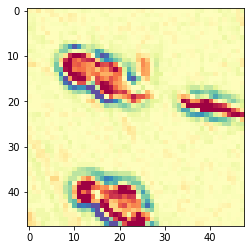

Epoch 123/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4628 - acc: 0.9993 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00123: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383594890621221, 'val_acc': 0.9065420555177136, 'loss': 0.46282099077607, 'acc': 0.9992609024047852, 'lr': 9.999999e-16}


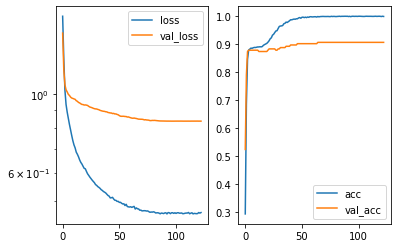

Predicted cell: Cells Probability: [[0.97607875]]
True Cell type: Cells
x [[0.6071544]]
True positional value x 0.5
y [[0.65377825]]
True positional value y 0.7083333333333334


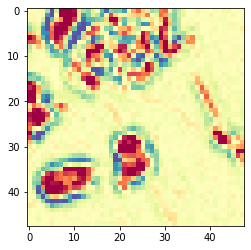

Epoch 124/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4623 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00124: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383553824692129, 'val_acc': 0.9065420555177136, 'loss': 0.462304701943737, 'acc': 0.9997536341349283, 'lr': 9.999999e-16}


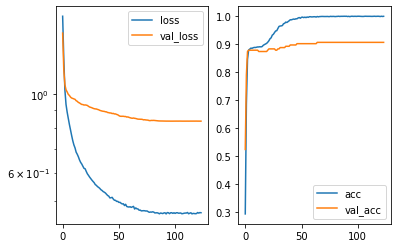

Predicted cell: Cells Probability: [[0.9791114]]
True Cell type: Cells
x [[0.5824607]]
True positional value x 0.5
y [[0.21552546]]
True positional value y 0.2916666666666667


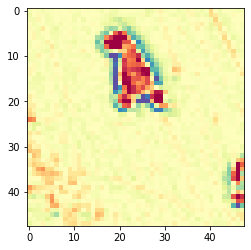

Epoch 125/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4613 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00125: ReduceLROnPlateau reducing learning rate to 9.999998977483754e-17.

Epoch 00125: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384729651647194, 'val_acc': 0.9065420555177136, 'loss': 0.4612716965911482, 'acc': 0.9997536341349283, 'lr': 9.999999e-16}


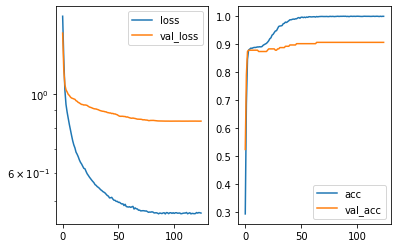

Predicted cell: Cells Probability: [[0.9896645]]
True Cell type: Cells
x [[0.37930647]]
True positional value x 0.2916666666666667
y [[0.39336446]]
True positional value y 0.2916666666666667


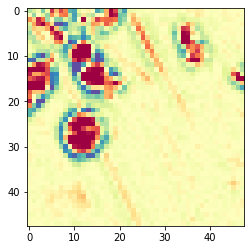

Epoch 126/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4572 - acc: 0.9998 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00126: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8382717610519623, 'val_acc': 0.9065420555177136, 'loss': 0.4571718291259511, 'acc': 0.9997536341349283, 'lr': 9.999999e-17}


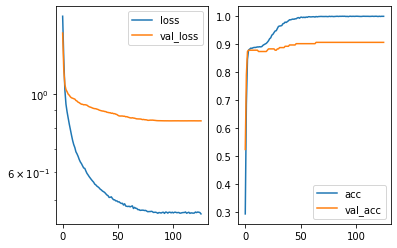

Predicted cell: Cells Probability: [[0.9926468]]
True Cell type: Cells
x [[0.5767224]]
True positional value x 0.7083333333333334
y [[0.5831922]]
True positional value y 0.2916666666666667


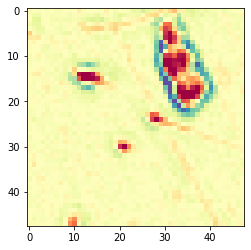

Epoch 127/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4615 - acc: 0.9998 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00127: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8382947706730566, 'val_acc': 0.9065420555177136, 'loss': 0.4615445352813592, 'acc': 0.9997536341349283, 'lr': 9.999999e-17}


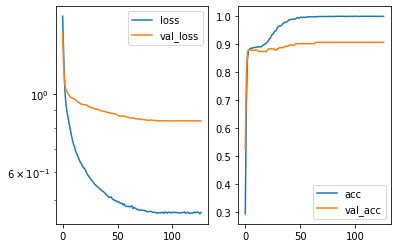

Predicted cell: Cells Probability: [[0.8841631]]
True Cell type: Cells
x [[0.60691756]]
True positional value x 0.5
y [[0.56433094]]
True positional value y 0.7083333333333334


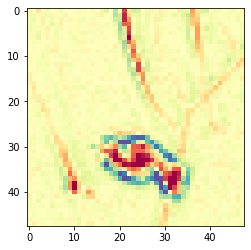

Epoch 128/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4581 - acc: 0.9998 - val_loss: 0.8382 - val_acc: 0.9065

Epoch 00128: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8381841266266653, 'val_acc': 0.9065420555177136, 'loss': 0.4581439167106936, 'acc': 0.9997536341349283, 'lr': 9.999999e-17}


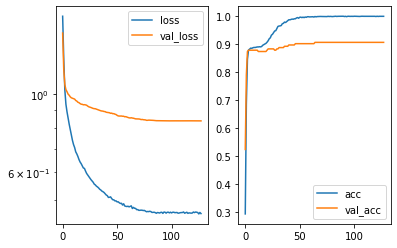

Predicted cell: Cells Probability: [[0.98542225]]
True Cell type: Cells
x [[0.15734577]]
True positional value x 0.2916666666666667
y [[0.30986983]]
True positional value y 0.5


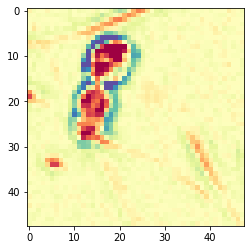

Epoch 129/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4603 - acc: 1.0000 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00129: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8382841643886031, 'val_acc': 0.9065420555177136, 'loss': 0.4602935626298872, 'acc': 1.0, 'lr': 9.999999e-17}


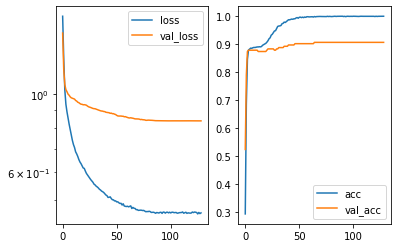

Predicted cell: Cells Probability: [[0.948991]]
True Cell type: Cells
x [[0.7025058]]
True positional value x 0.7083333333333334
y [[0.22916132]]
True positional value y 0.2916666666666667


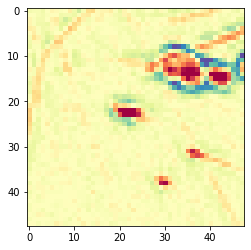

Epoch 130/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4598 - acc: 0.9998 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00130: ReduceLROnPlateau reducing learning rate to 9.999998845134856e-18.

Epoch 00130: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8382561089836549, 'val_acc': 0.9065420555177136, 'loss': 0.4597797152751712, 'acc': 0.9997536341349283, 'lr': 9.999999e-17}


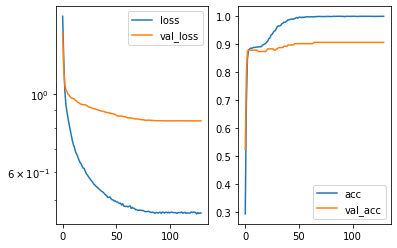

Predicted cell: Cells Probability: [[0.91494787]]
True Cell type: Cells
x [[0.6575282]]
True positional value x 0.7083333333333334
y [[0.35568118]]
True positional value y 0.5


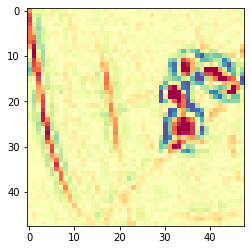

Epoch 131/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4625 - acc: 0.9995 - val_loss: 0.8382 - val_acc: 0.9065

Epoch 00131: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8382475426263898, 'val_acc': 0.9065420555177136, 'loss': 0.4625291983374647, 'acc': 0.9995072682698568, 'lr': 9.999999e-18}


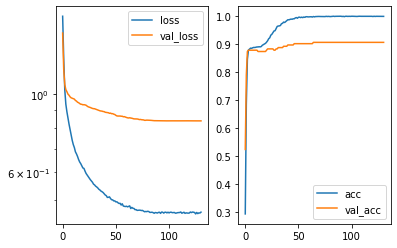

Predicted cell: Cells Probability: [[0.9661077]]
True Cell type: Cells
x [[0.3795012]]
True positional value x 0.2916666666666667
y [[0.12239514]]
True positional value y 0.2916666666666667


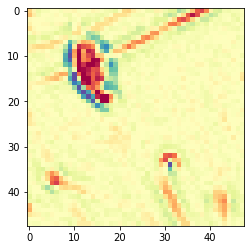

Epoch 132/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4601 - acc: 0.9998 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00132: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383100517442293, 'val_acc': 0.9065420555177136, 'loss': 0.460113369242315, 'acc': 0.9997536341349283, 'lr': 9.999999e-18}


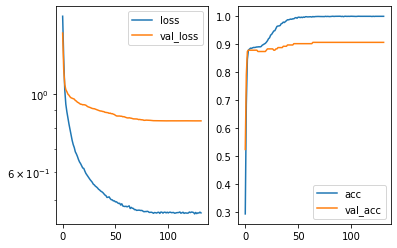

Predicted cell: Cells Probability: [[0.950429]]
True Cell type: Cells
x [[0.5214851]]
True positional value x 0.7083333333333334
y [[0.82964504]]
True positional value y 0.7083333333333334


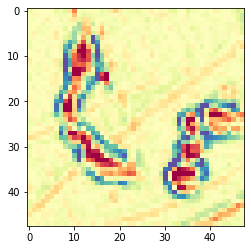

Epoch 133/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4634 - acc: 0.9998 - val_loss: 0.8382 - val_acc: 0.9065

Epoch 00133: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8382384147599479, 'val_acc': 0.9065420555177136, 'loss': 0.4633842908886742, 'acc': 0.9997536341349283, 'lr': 9.999999e-18}


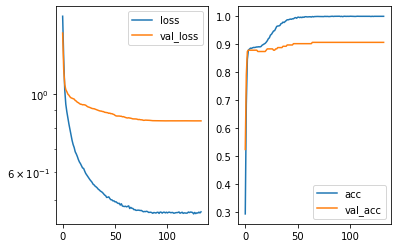

Predicted cell: Cells Probability: [[0.98703337]]
True Cell type: Cells
x [[0.11440652]]
True positional value x 0.2916666666666667
y [[0.2562271]]
True positional value y 0.2916666666666667


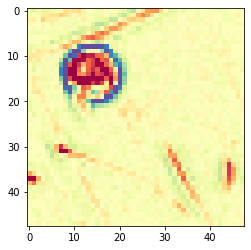

Epoch 134/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4613 - acc: 0.9998 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00134: ReduceLROnPlateau reducing learning rate to 9.999999010570977e-19.

Epoch 00134: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383049379999392, 'val_acc': 0.9065420555177136, 'loss': 0.46125593568545076, 'acc': 0.9997536341349283, 'lr': 9.999999e-18}


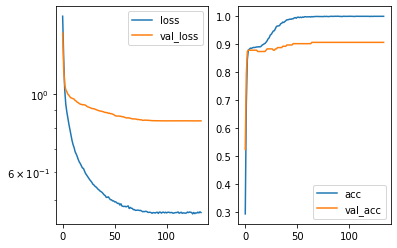

Predicted cell: Cells Probability: [[0.899383]]
True Cell type: Cells
x [[0.5753979]]
True positional value x 0.7083333333333334
y [[0.55615747]]
True positional value y 0.2916666666666667


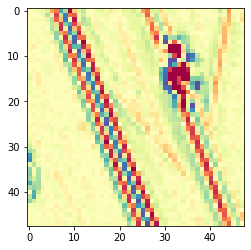

Epoch 135/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4601 - acc: 1.0000 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00135: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383264480350173, 'val_acc': 0.9065420555177136, 'loss': 0.4601409299733692, 'acc': 1.0, 'lr': 9.999999e-19}


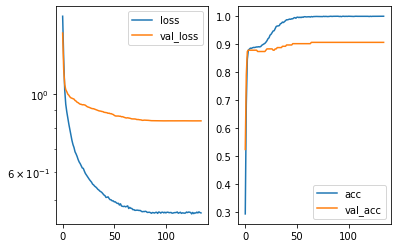

Predicted cell: Cells Probability: [[0.94379693]]
True Cell type: Cells
x [[0.2897143]]
True positional value x 0.2916666666666667
y [[0.21960825]]
True positional value y 0.7083333333333334


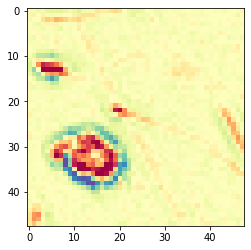

Epoch 136/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4620 - acc: 0.9995 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00136: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384380379569865, 'val_acc': 0.9065420555177136, 'loss': 0.46197812208902606, 'acc': 0.9995072682698568, 'lr': 9.999999e-19}


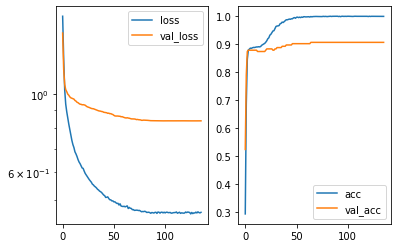

Predicted cell: Cells Probability: [[0.87367725]]
True Cell type: Cells
x [[0.63659793]]
True positional value x 0.7083333333333334
y [[0.4491176]]
True positional value y 0.2916666666666667


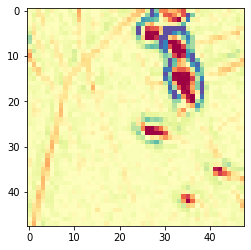

Epoch 137/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4604 - acc: 0.9995 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00137: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384276923732222, 'val_acc': 0.9065420555177136, 'loss': 0.4604376739661486, 'acc': 0.9995072682698568, 'lr': 9.999999e-19}


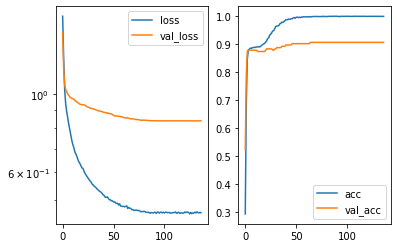

Predicted cell: Cells Probability: [[0.5287103]]
True Cell type: Normal
x [[0.5123244]]
True positional value x 0.5
y [[0.2668604]]
True positional value y 0.5


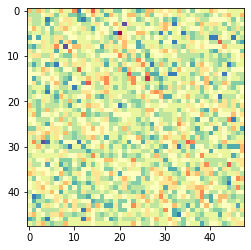

Epoch 138/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4605 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00138: ReduceLROnPlateau reducing learning rate to 9.999999424161285e-20.

Epoch 00138: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383625105162648, 'val_acc': 0.9065420555177136, 'loss': 0.4605002968908678, 'acc': 0.9997536341349283, 'lr': 9.999999e-19}


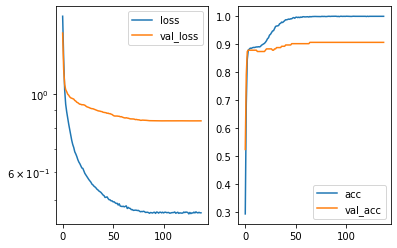

Predicted cell: Cells Probability: [[0.9388206]]
True Cell type: Cells
x [[0.535839]]
True positional value x 0.7083333333333334
y [[0.5506663]]
True positional value y 0.7083333333333334


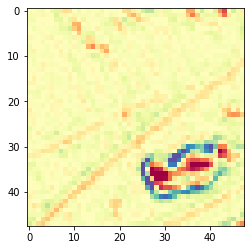

Epoch 139/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4606 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00139: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384604804983763, 'val_acc': 0.9065420555177136, 'loss': 0.46059132783863455, 'acc': 0.9997536341349283, 'lr': 1e-19}


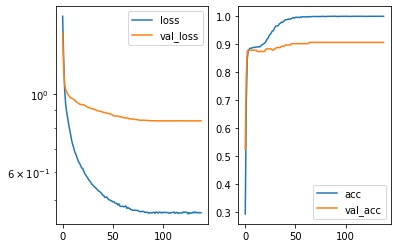

Predicted cell: Cells Probability: [[0.9843216]]
True Cell type: Cells
x [[0.58091295]]
True positional value x 0.5
y [[0.33185148]]
True positional value y 0.2916666666666667


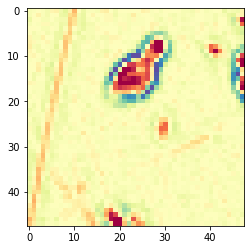

Epoch 140/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4594 - acc: 1.0000 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00140: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384237116742357, 'val_acc': 0.9065420555177136, 'loss': 0.4593780259687814, 'acc': 1.0, 'lr': 1e-19}


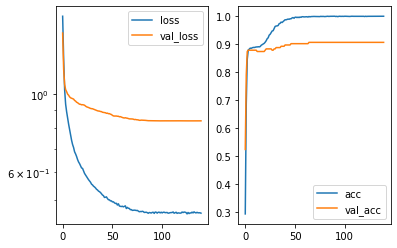

Predicted cell: Cells Probability: [[0.9853535]]
True Cell type: Cells
x [[0.15697795]]
True positional value x 0.2916666666666667
y [[0.31000993]]
True positional value y 0.5


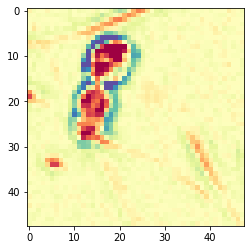

Epoch 141/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4638 - acc: 0.9990 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00141: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383906483650208, 'val_acc': 0.9065420555177136, 'loss': 0.46375083783836485, 'acc': 0.999014535952331, 'lr': 1e-19}


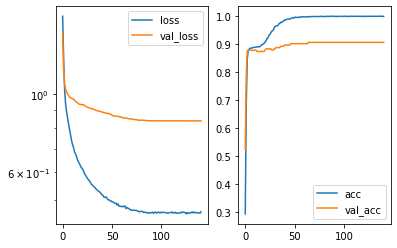

Predicted cell: Cells Probability: [[0.9604842]]
True Cell type: Cells
x [[0.88173306]]
True positional value x 0.7083333333333334
y [[0.37526742]]
True positional value y 0.2916666666666667


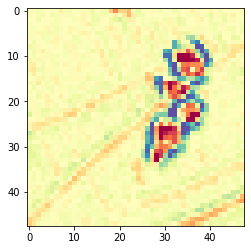

Epoch 142/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4611 - acc: 0.9993 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00142: ReduceLROnPlateau reducing learning rate to 9.999999682655225e-21.

Epoch 00142: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385784787552379, 'val_acc': 0.9065420555177136, 'loss': 0.46105085735868484, 'acc': 0.9992609024047852, 'lr': 1e-19}


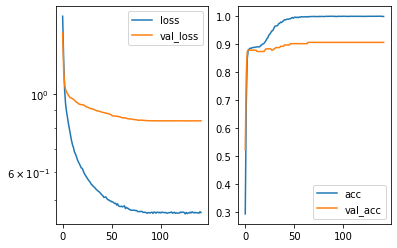

Predicted cell: Cells Probability: [[0.94847167]]
True Cell type: Cells
x [[0.2739126]]
True positional value x 0.2916666666666667
y [[0.7341272]]
True positional value y 0.7083333333333334


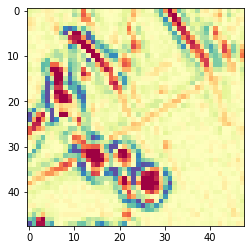

Epoch 143/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4622 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00143: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384369550464309, 'val_acc': 0.9065420555177136, 'loss': 0.4622231236846907, 'acc': 0.9997536341349283, 'lr': 1e-20}


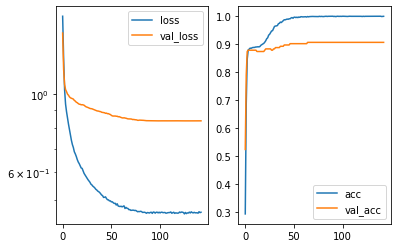

Predicted cell: Cells Probability: [[0.9700705]]
True Cell type: Cells
x [[0.25659302]]
True positional value x 0.2916666666666667
y [[0.4223011]]
True positional value y 0.2916666666666667


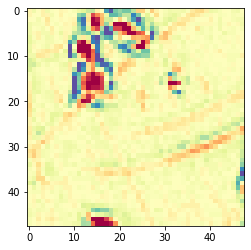

Epoch 144/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4636 - acc: 0.9988 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00144: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384109429109876, 'val_acc': 0.9065420555177136, 'loss': 0.4635657755266595, 'acc': 0.998768170674642, 'lr': 1e-20}


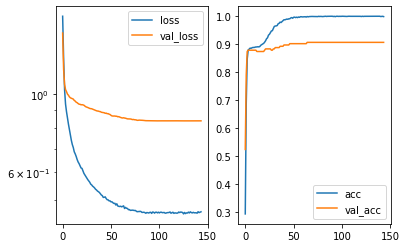

Predicted cell: Cells Probability: [[0.9696722]]
True Cell type: Cells
x [[0.38814095]]
True positional value x 0.2916666666666667
y [[0.5875868]]
True positional value y 0.2916666666666667


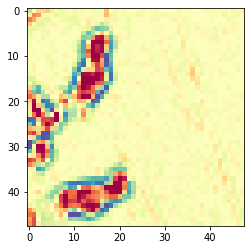

Epoch 145/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4597 - acc: 1.0000 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00145: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.838430727196631, 'val_acc': 0.9065420555177136, 'loss': 0.4596738933298088, 'acc': 1.0, 'lr': 1e-20}


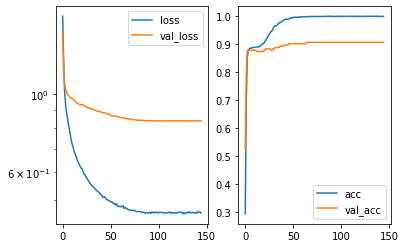

Predicted cell: Cells Probability: [[0.997227]]
True Cell type: Cells
x [[0.51392156]]
True positional value x 0.7083333333333334
y [[0.2537114]]
True positional value y 0.2916666666666667


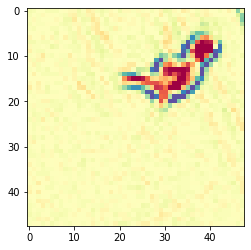

Epoch 146/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4614 - acc: 0.9995 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00146: ReduceLROnPlateau reducing learning rate to 9.999999682655225e-22.

Epoch 00146: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383360939605213, 'val_acc': 0.9065420555177136, 'loss': 0.46140624130850033, 'acc': 0.9995072682698568, 'lr': 1e-20}


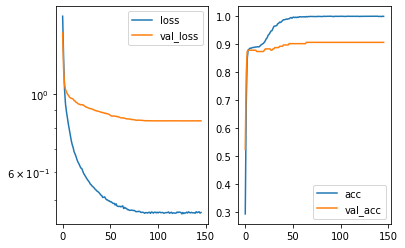

Predicted cell: Normal Probability: [[0.84143126]]
True Cell type: Normal
x [[0.65483665]]
True positional value x 0.5
y [[0.43605238]]
True positional value y 0.5


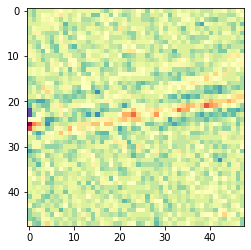

Epoch 147/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4598 - acc: 1.0000 - val_loss: 0.8382 - val_acc: 0.9065

Epoch 00147: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8381834904724192, 'val_acc': 0.9065420555177136, 'loss': 0.4598178046549679, 'acc': 1.0, 'lr': 1e-21}


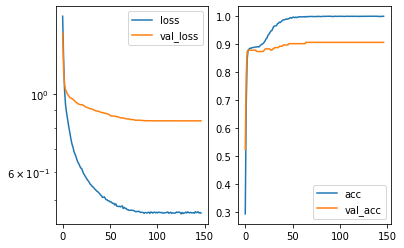

Predicted cell: Cells Probability: [[0.99734384]]
True Cell type: Cells
x [[0.47076517]]
True positional value x 0.2916666666666667
y [[0.53270274]]
True positional value y 0.2916666666666667


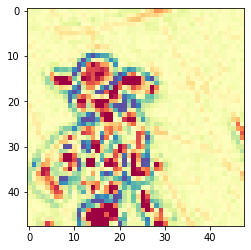

Epoch 148/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4602 - acc: 0.9998 - val_loss: 0.8382 - val_acc: 0.9065

Epoch 00148: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8382371313104006, 'val_acc': 0.9065420555177136, 'loss': 0.4602336801751901, 'acc': 0.9997536341349283, 'lr': 1e-21}


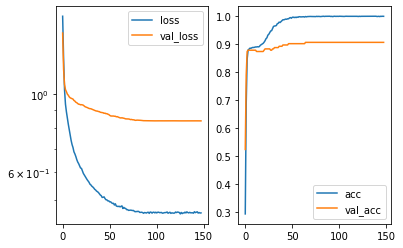

Predicted cell: Cells Probability: [[0.98383623]]
True Cell type: Cells
x [[0.44891542]]
True positional value x 0.5
y [[0.41895932]]
True positional value y 0.2916666666666667


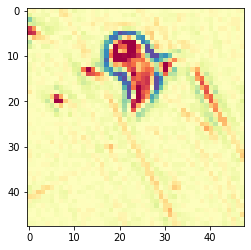

Epoch 149/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4583 - acc: 1.0000 - val_loss: 0.8381 - val_acc: 0.9065

Epoch 00149: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8381289828603513, 'val_acc': 0.9065420555177136, 'loss': 0.458302429176722, 'acc': 1.0, 'lr': 1e-21}


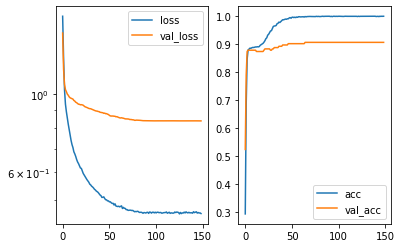

Predicted cell: Cells Probability: [[0.8567497]]
True Cell type: Cells
x [[0.5540177]]
True positional value x 0.7083333333333334
y [[0.35906902]]
True positional value y 0.2916666666666667


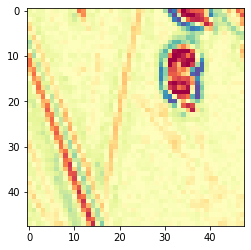

Epoch 150/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4629 - acc: 0.9988 - val_loss: 0.8380 - val_acc: 0.9065

Epoch 00150: ReduceLROnPlateau reducing learning rate to 9.999999682655225e-23.

Epoch 00150: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8380234570146721, 'val_acc': 0.9065420555177136, 'loss': 0.4629314212295098, 'acc': 0.998768170674642, 'lr': 1e-21}


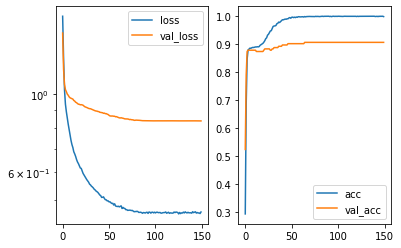

Predicted cell: Cells Probability: [[0.9873625]]
True Cell type: Cells
x [[0.3561733]]
True positional value x 0.2916666666666667
y [[0.59342754]]
True positional value y 0.7083333333333334


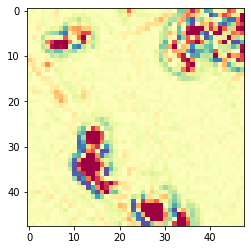

Epoch 151/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4628 - acc: 0.9993 - val_loss: 0.8382 - val_acc: 0.9065

Epoch 00151: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8381530564522075, 'val_acc': 0.9065420555177136, 'loss': 0.46277067148940965, 'acc': 0.9992609024047852, 'lr': 9.9999997e-23}


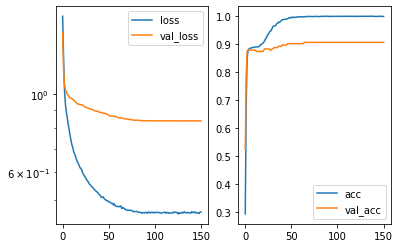

Predicted cell: Cells Probability: [[0.97167665]]
True Cell type: Cells
x [[0.3766389]]
True positional value x 0.2916666666666667
y [[0.5178117]]
True positional value y 0.7083333333333334


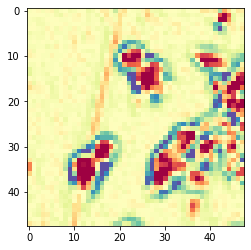

Epoch 152/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4602 - acc: 0.9993 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00152: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383027287287133, 'val_acc': 0.9065420555177136, 'loss': 0.46024084942157, 'acc': 0.9992609024047852, 'lr': 9.9999997e-23}


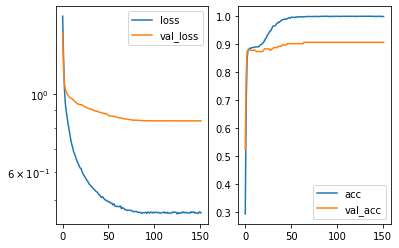

Predicted cell: Cells Probability: [[0.9966292]]
True Cell type: Cells
x [[0.56039876]]
True positional value x 0.7083333333333334
y [[0.40145746]]
True positional value y 0.2916666666666667


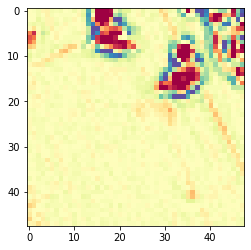

Epoch 153/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4620 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00153: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383541335569364, 'val_acc': 0.9065420555177136, 'loss': 0.46203765136527736, 'acc': 0.9997536341349283, 'lr': 9.9999997e-23}


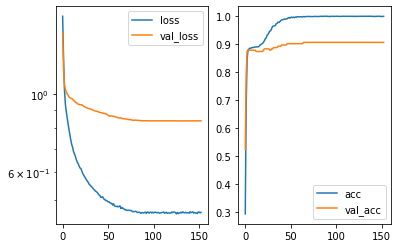

Predicted cell: Cells Probability: [[0.96150607]]
True Cell type: Cells
x [[0.6632411]]
True positional value x 0.7083333333333334
y [[0.52692163]]
True positional value y 0.5


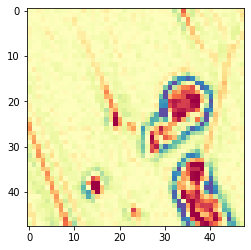

Epoch 154/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4613 - acc: 0.9993 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00154: ReduceLROnPlateau reducing learning rate to 9.999999682655227e-24.

Epoch 00154: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384182235904943, 'val_acc': 0.9065420555177136, 'loss': 0.4613130018537225, 'acc': 0.9992609024047852, 'lr': 9.9999997e-23}


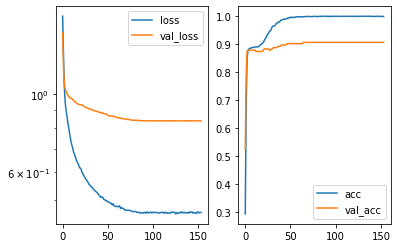

Predicted cell: Cells Probability: [[0.99025846]]
True Cell type: Cells
x [[0.39142585]]
True positional value x 0.2916666666666667
y [[0.7226261]]
True positional value y 0.2916666666666667


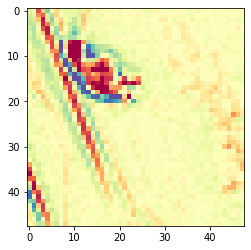

Epoch 155/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4604 - acc: 0.9995 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00155: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385185198249104, 'val_acc': 0.9065420555177136, 'loss': 0.4603736044870688, 'acc': 0.9995072676824742, 'lr': 1e-23}


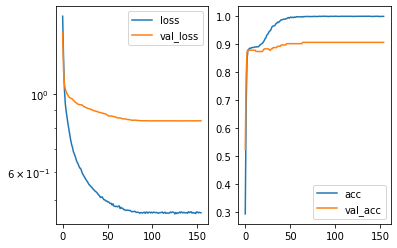

Predicted cell: Cells Probability: [[0.9967842]]
True Cell type: Cells
x [[0.7102815]]
True positional value x 0.5
y [[0.639602]]
True positional value y 0.7083333333333334


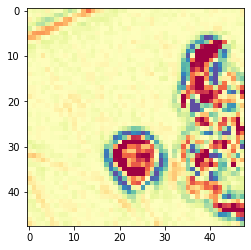

Epoch 156/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4613 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00156: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385109728741869, 'val_acc': 0.9065420555177136, 'loss': 0.4612569988845868, 'acc': 0.9997536341349283, 'lr': 1e-23}


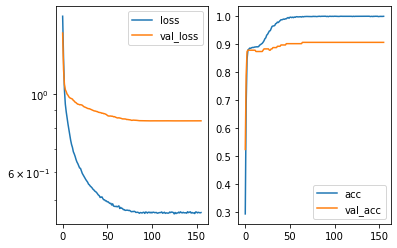

Predicted cell: Cells Probability: [[0.88564134]]
True Cell type: Cells
x [[0.27898726]]
True positional value x 0.5
y [[0.6885704]]
True positional value y 0.7083333333333334


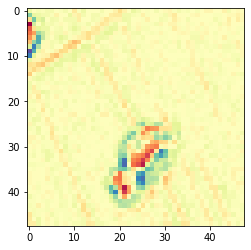

Epoch 157/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4634 - acc: 0.9995 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00157: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384579358813918, 'val_acc': 0.9065420555177136, 'loss': 0.4634126287709025, 'acc': 0.9995072682698568, 'lr': 1e-23}


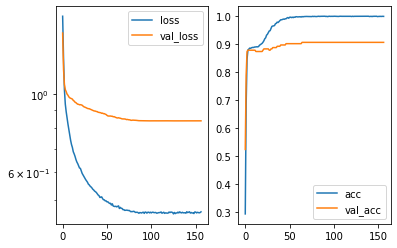

Predicted cell: Cells Probability: [[0.87424856]]
True Cell type: Cells
x [[0.63753265]]
True positional value x 0.7083333333333334
y [[0.4486947]]
True positional value y 0.2916666666666667


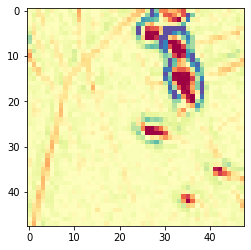

Epoch 158/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4633 - acc: 0.9993 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00158: ReduceLROnPlateau reducing learning rate to 9.999999998199588e-25.

Epoch 00158: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.838418922134649, 'val_acc': 0.9065420555177136, 'loss': 0.46331289074314613, 'acc': 0.9992609024047852, 'lr': 1e-23}


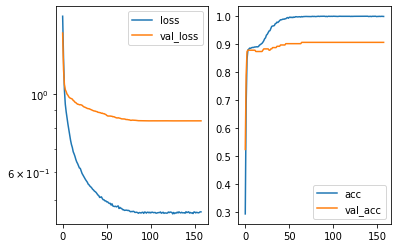

Predicted cell: Cells Probability: [[0.9916094]]
True Cell type: Cells
x [[0.46942365]]
True positional value x 0.5
y [[0.80945045]]
True positional value y 0.7083333333333334


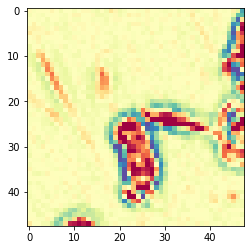

Epoch 159/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4620 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00159: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.838492207995085, 'val_acc': 0.9065420555177136, 'loss': 0.4619788073074879, 'acc': 0.9997536341349283, 'lr': 1e-24}


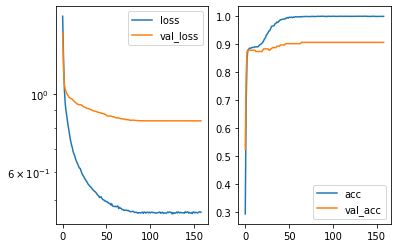

Predicted cell: Cells Probability: [[0.9563006]]
True Cell type: Cells
x [[0.6223653]]
True positional value x 0.7083333333333334
y [[0.49944973]]
True positional value y 0.5


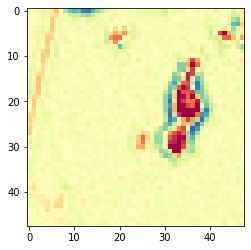

Epoch 160/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4596 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00160: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.838431572802713, 'val_acc': 0.9065420555177136, 'loss': 0.4595554373657272, 'acc': 0.9997536341349283, 'lr': 1e-24}


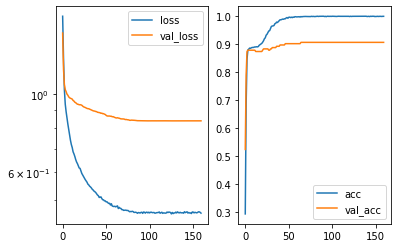

Predicted cell: Cells Probability: [[0.99643636]]
True Cell type: Cells
x [[0.3913624]]
True positional value x 0.5
y [[0.20199704]]
True positional value y 0.5


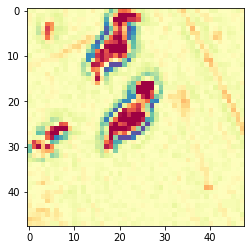

Epoch 161/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4588 - acc: 1.0000 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00161: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383545268361814, 'val_acc': 0.9065420555177136, 'loss': 0.45884213281782077, 'acc': 1.0, 'lr': 1e-24}


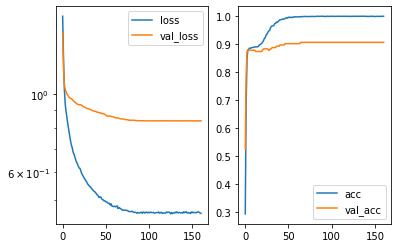

Predicted cell: Cells Probability: [[0.97609407]]
True Cell type: Cells
x [[0.6068061]]
True positional value x 0.5
y [[0.6530767]]
True positional value y 0.7083333333333334


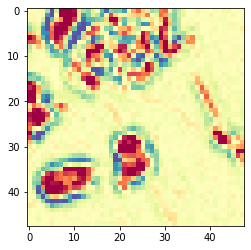

Epoch 162/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4632 - acc: 0.9993 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00162: ReduceLROnPlateau reducing learning rate to 1.0000000195414814e-25.

Epoch 00162: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384481540350156, 'val_acc': 0.9065420555177136, 'loss': 0.46315762173750624, 'acc': 0.9992609024047852, 'lr': 1e-24}


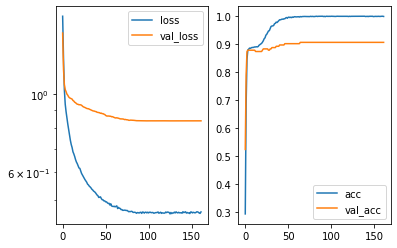

Predicted cell: Cells Probability: [[0.9974039]]
True Cell type: Cells
x [[0.32627958]]
True positional value x 0.2916666666666667
y [[0.49918938]]
True positional value y 0.5


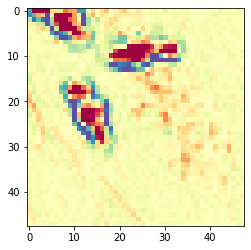

Epoch 163/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4622 - acc: 0.9993 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00163: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383747634486617, 'val_acc': 0.9065420555177136, 'loss': 0.46217296205885045, 'acc': 0.9992609024047852, 'lr': 1e-25}


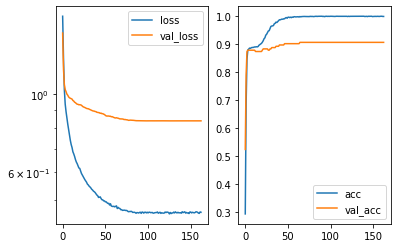

Predicted cell: Normal Probability: [[0.8915878]]
True Cell type: Normal
x [[0.5327497]]
True positional value x 0.5
y [[0.5086608]]
True positional value y 0.5


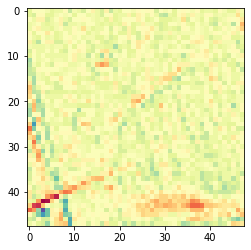

Epoch 164/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4616 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00164: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384916375730639, 'val_acc': 0.9065420555177136, 'loss': 0.4616308307876784, 'acc': 0.9997536341349283, 'lr': 1e-25}


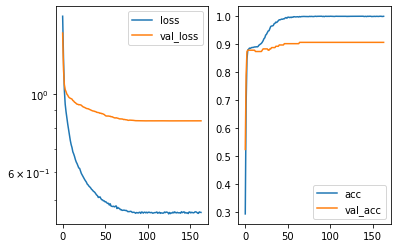

Predicted cell: Cells Probability: [[0.9962196]]
True Cell type: Cells
x [[0.21244611]]
True positional value x 0.2916666666666667
y [[0.7841932]]
True positional value y 0.7083333333333334


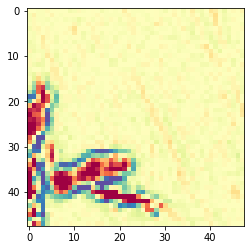

Epoch 165/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4625 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00165: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384278461197826, 'val_acc': 0.9065420555177136, 'loss': 0.46249417788467256, 'acc': 0.9997536341349283, 'lr': 1e-25}


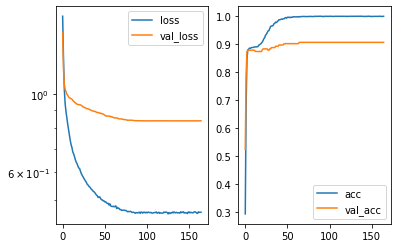

Predicted cell: Normal Probability: [[0.8624204]]
True Cell type: Normal
x [[0.4097575]]
True positional value x 0.5
y [[0.3253229]]
True positional value y 0.5


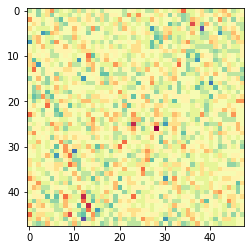

Epoch 166/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4628 - acc: 0.9995 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00166: ReduceLROnPlateau reducing learning rate to 1.0000000195414814e-26.

Epoch 00166: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383710289669928, 'val_acc': 0.9065420555177136, 'loss': 0.4628319225234332, 'acc': 0.9995072682698568, 'lr': 1e-25}


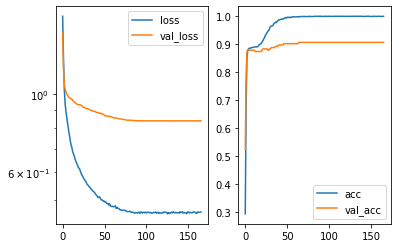

Predicted cell: Cells Probability: [[0.9640475]]
True Cell type: Cells
x [[0.3071237]]
True positional value x 0.2916666666666667
y [[0.6682677]]
True positional value y 0.7083333333333334


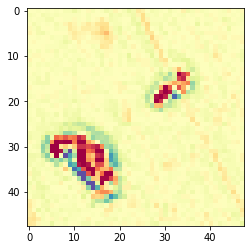

Epoch 167/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4610 - acc: 0.9995 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00167: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385083981763537, 'val_acc': 0.9065420555177136, 'loss': 0.46100275577891486, 'acc': 0.9995072682698568, 'lr': 1e-26}


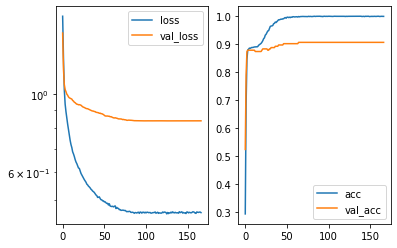

Predicted cell: Cells Probability: [[0.99661463]]
True Cell type: Cells
x [[0.8041857]]
True positional value x 0.7083333333333334
y [[0.71909183]]
True positional value y 0.5


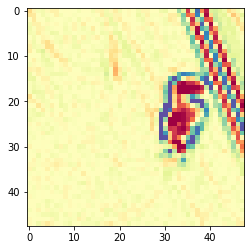

Epoch 168/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4618 - acc: 1.0000 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00168: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385674012041537, 'val_acc': 0.9065420555177136, 'loss': 0.4617653168034865, 'acc': 1.0, 'lr': 1e-26}


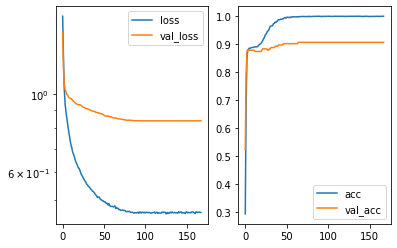

Predicted cell: Cells Probability: [[0.9599606]]
True Cell type: Cells
x [[0.6936227]]
True positional value x 0.7083333333333334
y [[0.4598048]]
True positional value y 0.5


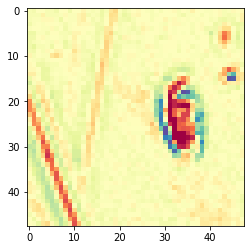

Epoch 169/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4594 - acc: 1.0000 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00169: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385248189774629, 'val_acc': 0.9065420555177136, 'loss': 0.4594091278824145, 'acc': 1.0, 'lr': 1e-26}


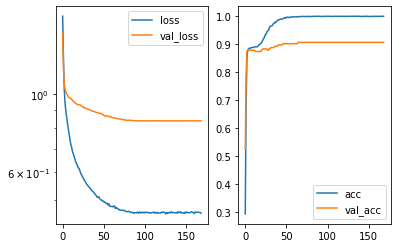

Predicted cell: Cells Probability: [[0.9868462]]
True Cell type: Cells
x [[0.39567277]]
True positional value x 0.5
y [[0.78533334]]
True positional value y 0.7083333333333334


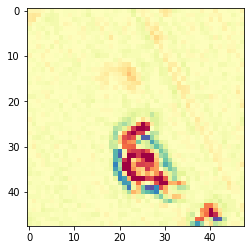

Epoch 170/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4621 - acc: 1.0000 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00170: ReduceLROnPlateau reducing learning rate to 9.999999887266024e-28.

Epoch 00170: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385141581018395, 'val_acc': 0.9065420555177136, 'loss': 0.4621392767412905, 'acc': 1.0, 'lr': 1e-26}


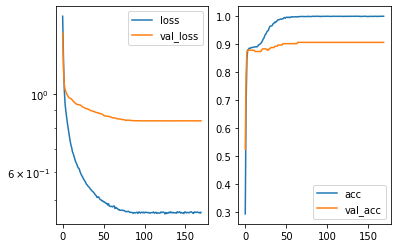

Predicted cell: Cells Probability: [[0.99538946]]
True Cell type: Cells
x [[0.8368153]]
True positional value x 0.7083333333333334
y [[0.6709955]]
True positional value y 0.7083333333333334


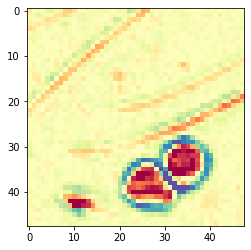

Epoch 171/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4598 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00171: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384382073010239, 'val_acc': 0.9065420555177136, 'loss': 0.4597854563375799, 'acc': 0.9997536341349283, 'lr': 1e-27}


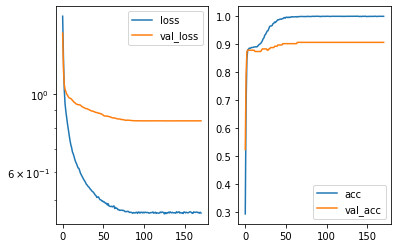

Predicted cell: Cells Probability: [[0.9843477]]
True Cell type: Cells
x [[0.20420057]]
True positional value x 0.2916666666666667
y [[0.2618189]]
True positional value y 0.5


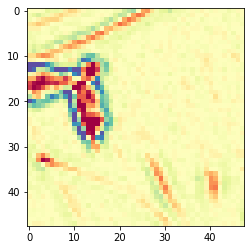

Epoch 172/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4610 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00172: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384554826210593, 'val_acc': 0.9065420555177136, 'loss': 0.4609894820785663, 'acc': 0.9997536341349283, 'lr': 1e-27}


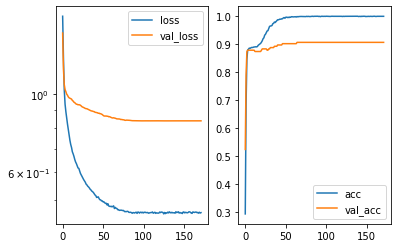

Predicted cell: Cells Probability: [[0.9585528]]
True Cell type: Cells
x [[0.51571184]]
True positional value x 0.5
y [[0.7300745]]
True positional value y 0.5


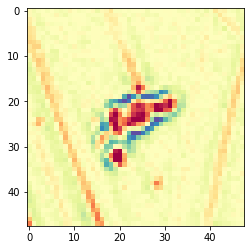

Epoch 173/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4607 - acc: 1.0000 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00173: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385273981317182, 'val_acc': 0.9065420555177136, 'loss': 0.46068274919021657, 'acc': 1.0, 'lr': 1e-27}


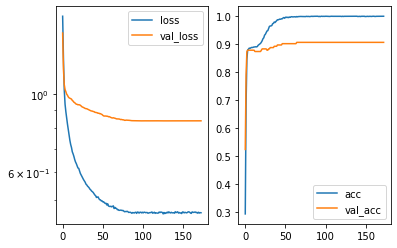

Predicted cell: Cells Probability: [[0.98966026]]
True Cell type: Cells
x [[0.38039172]]
True positional value x 0.2916666666666667
y [[0.3927744]]
True positional value y 0.2916666666666667


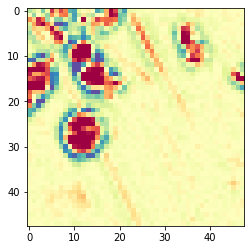

Epoch 174/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4589 - acc: 1.0000 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00174: ReduceLROnPlateau reducing learning rate to 1.0000000272452012e-28.

Epoch 00174: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385413177659579, 'val_acc': 0.9065420555177136, 'loss': 0.45891202489535016, 'acc': 1.0, 'lr': 1e-27}


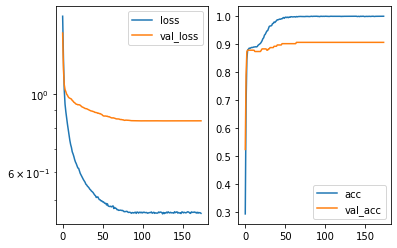

Predicted cell: Cells Probability: [[0.9968077]]
True Cell type: Cells
x [[0.64717513]]
True positional value x 0.7083333333333334
y [[0.5623158]]
True positional value y 0.7083333333333334


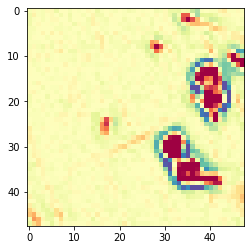

Epoch 175/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4609 - acc: 0.9988 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00175: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384136613284316, 'val_acc': 0.9065420555177136, 'loss': 0.46090654524038155, 'acc': 0.998768170674642, 'lr': 1e-28}


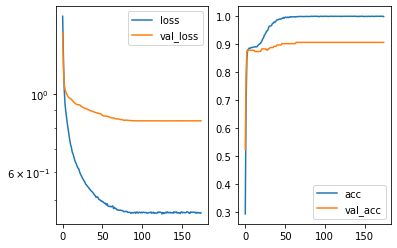

Predicted cell: Cells Probability: [[0.9937582]]
True Cell type: Cells
x [[0.86079806]]
True positional value x 0.7083333333333334
y [[0.47395676]]
True positional value y 0.2916666666666667


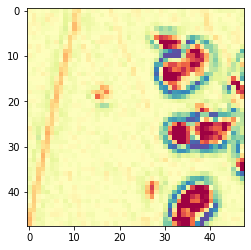

Epoch 176/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4609 - acc: 0.9995 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00176: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383516981222919, 'val_acc': 0.9065420555177136, 'loss': 0.4609083120871072, 'acc': 0.9995072682698568, 'lr': 1e-28}


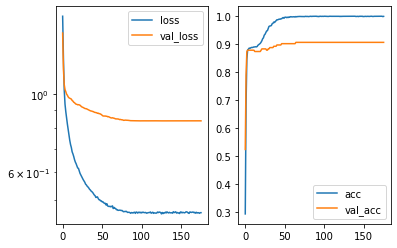

Predicted cell: Cells Probability: [[0.97799224]]
True Cell type: Cells
x [[0.44651082]]
True positional value x 0.2916666666666667
y [[0.83141565]]
True positional value y 0.7083333333333334


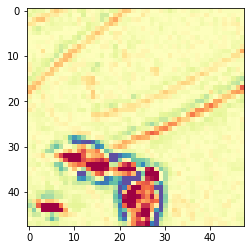

Epoch 177/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4596 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00177: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.838409848859377, 'val_acc': 0.9065420555177136, 'loss': 0.4595824245764546, 'acc': 0.9997536341349283, 'lr': 1e-28}


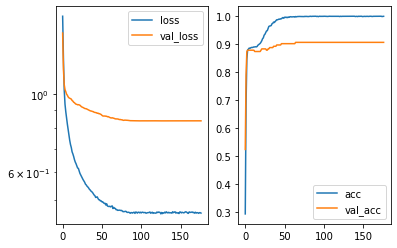

Predicted cell: Cells Probability: [[0.9409027]]
True Cell type: Cells
x [[0.5393042]]
True positional value x 0.7083333333333334
y [[0.75954074]]
True positional value y 0.7083333333333334


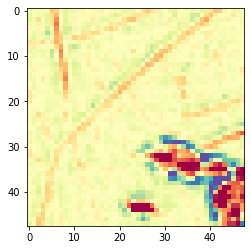

Epoch 178/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4598 - acc: 1.0000 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00178: ReduceLROnPlateau reducing learning rate to 1.0000000031710769e-29.

Epoch 00178: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383531787685145, 'val_acc': 0.9065420555177136, 'loss': 0.4598285416336182, 'acc': 1.0, 'lr': 1e-28}


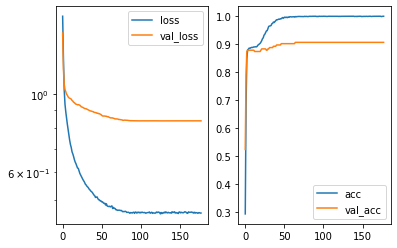

Predicted cell: Cells Probability: [[0.9529792]]
True Cell type: Cells
x [[0.9270324]]
True positional value x 0.7083333333333334
y [[0.33780345]]
True positional value y 0.2916666666666667


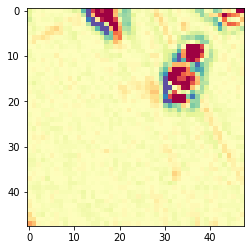

Epoch 179/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4650 - acc: 0.9993 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00179: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383819026367687, 'val_acc': 0.9065420555177136, 'loss': 0.465027816632194, 'acc': 0.9992609018174026, 'lr': 1e-29}


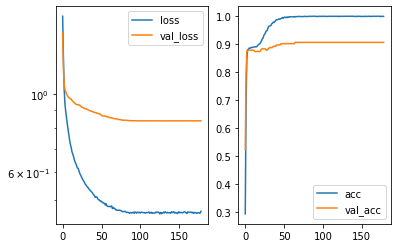

Predicted cell: Cells Probability: [[0.9223004]]
True Cell type: Cells
x [[0.78367203]]
True positional value x 0.5
y [[0.21705244]]
True positional value y 0.2916666666666667


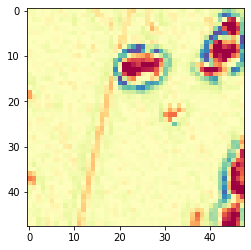

Epoch 180/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4609 - acc: 0.9995 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00180: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383126854896545, 'val_acc': 0.9065420555177136, 'loss': 0.46094715572484285, 'acc': 0.9995072682698568, 'lr': 1e-29}


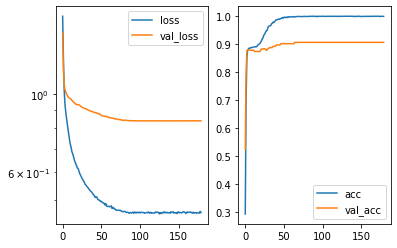

Predicted cell: Cells Probability: [[0.9450631]]
True Cell type: Cells
x [[0.3232005]]
True positional value x 0.2916666666666667
y [[0.4387673]]
True positional value y 0.2916666666666667


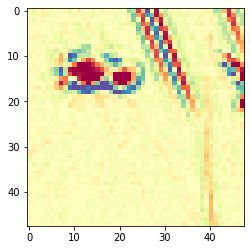

Epoch 181/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4639 - acc: 0.9995 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00181: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384944651728479, 'val_acc': 0.9065420555177136, 'loss': 0.46385760690138594, 'acc': 0.9995072682698568, 'lr': 1e-29}


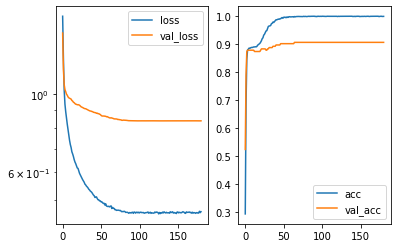

Predicted cell: Cells Probability: [[0.9192014]]
True Cell type: Cells
x [[0.38244393]]
True positional value x 0.7083333333333334
y [[0.64656353]]
True positional value y 0.2916666666666667


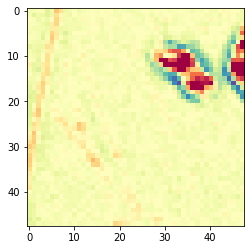

Epoch 182/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4631 - acc: 1.0000 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00182: ReduceLROnPlateau reducing learning rate to 1.0000000031710769e-30.

Epoch 00182: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8386342464206374, 'val_acc': 0.9065420555177136, 'loss': 0.46305737980159817, 'acc': 1.0, 'lr': 1e-29}


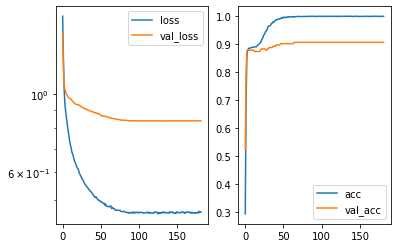

Predicted cell: Cells Probability: [[0.99846125]]
True Cell type: Cells
x [[0.6066758]]
True positional value x 0.2916666666666667
y [[0.6285009]]
True positional value y 0.7083333333333334


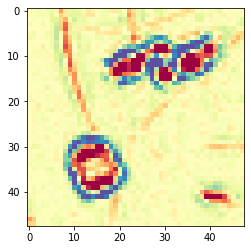

Epoch 183/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4616 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00183: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384133181839346, 'val_acc': 0.9065420555177136, 'loss': 0.46157959775403085, 'acc': 0.9997536341349283, 'lr': 1e-30}


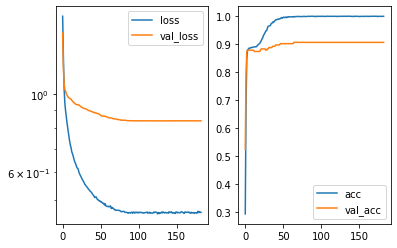

Predicted cell: Cells Probability: [[0.99976605]]
True Cell type: Cells
x [[0.91500396]]
True positional value x 0.5
y [[0.60657793]]
True positional value y 0.5


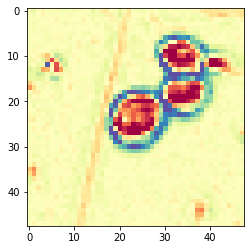

Epoch 184/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4612 - acc: 0.9995 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00184: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384010908759643, 'val_acc': 0.9065420555177136, 'loss': 0.4612030249624071, 'acc': 0.9995072682698568, 'lr': 1e-30}


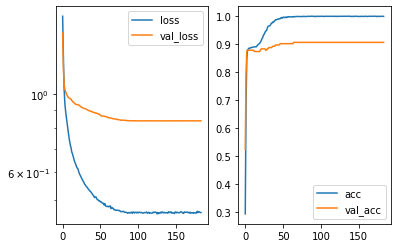

Predicted cell: Cells Probability: [[0.9912913]]
True Cell type: Cells
x [[0.27288935]]
True positional value x 0.2916666666666667
y [[0.24470697]]
True positional value y 0.5


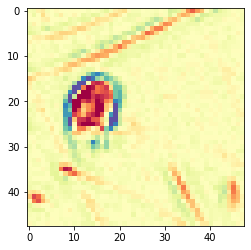

Epoch 185/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4618 - acc: 1.0000 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00185: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383387555585844, 'val_acc': 0.9065420555177136, 'loss': 0.4618101946148681, 'acc': 1.0, 'lr': 1e-30}


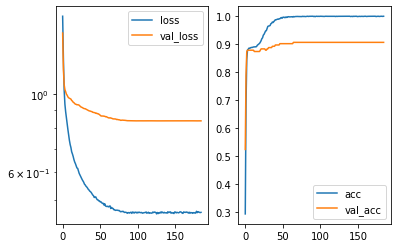

Predicted cell: Cells Probability: [[0.99424654]]
True Cell type: Cells
x [[0.5879798]]
True positional value x 0.7083333333333334
y [[0.15972905]]
True positional value y 0.2916666666666667


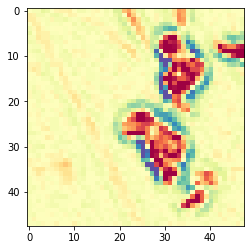

Epoch 186/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4601 - acc: 1.0000 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00186: ReduceLROnPlateau reducing learning rate to 1.000000003171077e-31.

Epoch 00186: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384986709211474, 'val_acc': 0.9065420555177136, 'loss': 0.46014308618130606, 'acc': 1.0, 'lr': 1e-30}


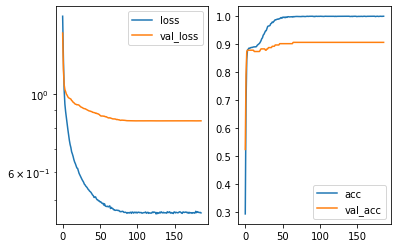

Predicted cell: Cells Probability: [[0.9963527]]
True Cell type: Cells
x [[0.6467919]]
True positional value x 0.2916666666666667
y [[0.530619]]
True positional value y 0.2916666666666667


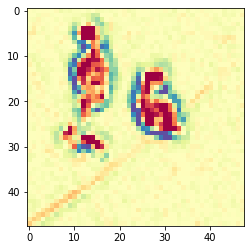

Epoch 187/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4607 - acc: 1.0000 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00187: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385324272039895, 'val_acc': 0.9065420555177136, 'loss': 0.4607159333896919, 'acc': 1.0, 'lr': 1e-31}


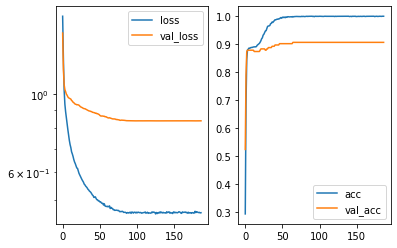

Predicted cell: Cells Probability: [[0.9954146]]
True Cell type: Cells
x [[0.83688915]]
True positional value x 0.7083333333333334
y [[0.6710693]]
True positional value y 0.7083333333333334


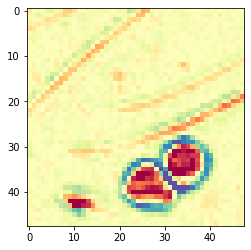

Epoch 188/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4614 - acc: 1.0000 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00188: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.838566796244862, 'val_acc': 0.9065420555177136, 'loss': 0.46138739199672435, 'acc': 1.0, 'lr': 1e-31}


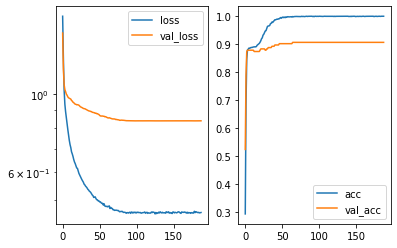

Predicted cell: Cells Probability: [[0.99844164]]
True Cell type: Cells
x [[0.6771561]]
True positional value x 0.2916666666666667
y [[0.45638657]]
True positional value y 0.2916666666666667


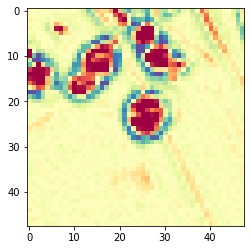

Epoch 189/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4634 - acc: 0.9995 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00189: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383667430030965, 'val_acc': 0.9065420555177136, 'loss': 0.4634283096530691, 'acc': 0.9995072682698568, 'lr': 1e-31}


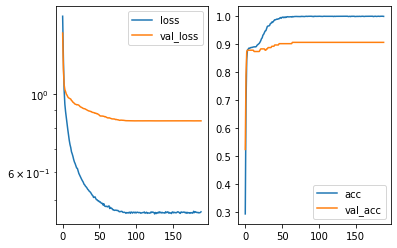

Predicted cell: Cells Probability: [[0.9434698]]
True Cell type: Cells
x [[0.28934553]]
True positional value x 0.2916666666666667
y [[0.22011067]]
True positional value y 0.7083333333333334


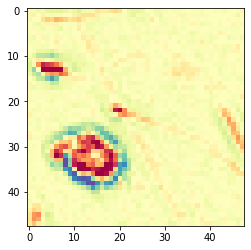

Epoch 190/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4596 - acc: 0.9998 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00190: ReduceLROnPlateau reducing learning rate to 9.999999796611899e-33.

Epoch 00190: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383033537419042, 'val_acc': 0.9065420555177136, 'loss': 0.4596058529831265, 'acc': 0.9997536341349283, 'lr': 1e-31}


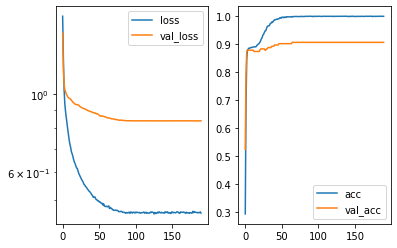

Predicted cell: Normal Probability: [[0.8413193]]
True Cell type: Normal
x [[0.655437]]
True positional value x 0.5
y [[0.43546328]]
True positional value y 0.5


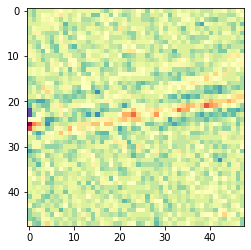

Epoch 191/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4603 - acc: 0.9998 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00191: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8382950647969112, 'val_acc': 0.9065420555177136, 'loss': 0.46029795009856683, 'acc': 0.9997536341349283, 'lr': 9.9999995e-33}


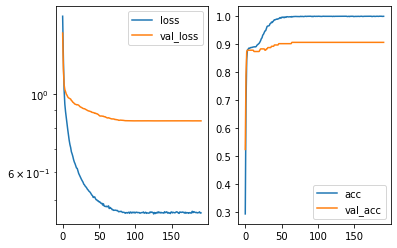

Predicted cell: Cells Probability: [[0.99835545]]
True Cell type: Cells
x [[0.32524306]]
True positional value x 0.5
y [[0.5432993]]
True positional value y 0.7083333333333334


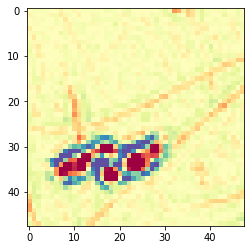

Epoch 192/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4602 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00192: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383589442645278, 'val_acc': 0.9065420555177136, 'loss': 0.4602308351217041, 'acc': 0.9997536341349283, 'lr': 9.9999995e-33}


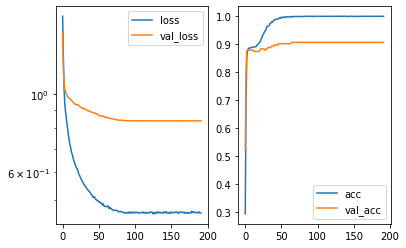

Predicted cell: Cells Probability: [[0.56039786]]
True Cell type: Normal
x [[0.41417795]]
True positional value x 0.5
y [[0.52592796]]
True positional value y 0.5


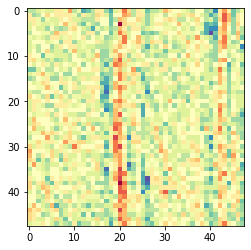

Epoch 193/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4596 - acc: 1.0000 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00193: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8382774151374246, 'val_acc': 0.9065420555177136, 'loss': 0.4596360785440143, 'acc': 1.0, 'lr': 9.9999995e-33}


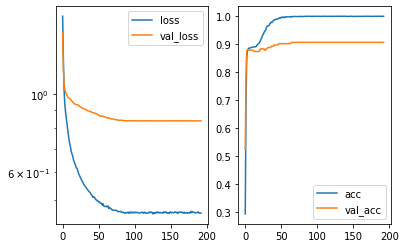

Predicted cell: Normal Probability: [[0.6260223]]
True Cell type: Normal
x [[0.68029505]]
True positional value x 0.5
y [[0.67145723]]
True positional value y 0.5


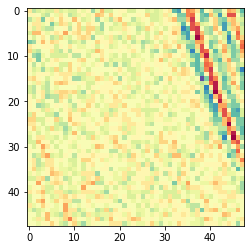

Epoch 194/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4631 - acc: 0.9993 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00194: ReduceLROnPlateau reducing learning rate to 9.999999502738312e-34.

Epoch 00194: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383964996471583, 'val_acc': 0.9065420555177136, 'loss': 0.4631206068492752, 'acc': 0.9992609024047852, 'lr': 9.9999995e-33}


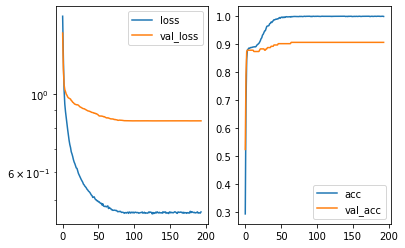

Predicted cell: Cells Probability: [[0.9831035]]
True Cell type: Cells
x [[0.53817356]]
True positional value x 0.5
y [[0.69109476]]
True positional value y 0.7083333333333334


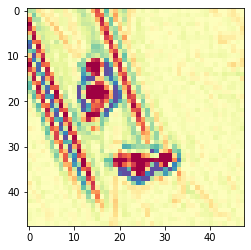

Epoch 195/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4590 - acc: 0.9998 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00195: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8382625585404512, 'val_acc': 0.9065420555177136, 'loss': 0.4589984621444222, 'acc': 0.9997536341349283, 'lr': 9.999999e-34}


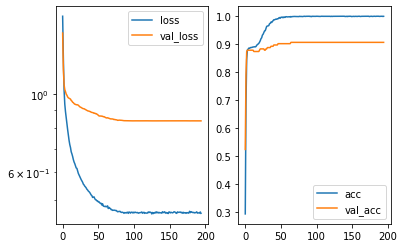

Predicted cell: Cells Probability: [[0.9763966]]
True Cell type: Cells
x [[0.57314163]]
True positional value x 0.2916666666666667
y [[0.13168906]]
True positional value y 0.2916666666666667


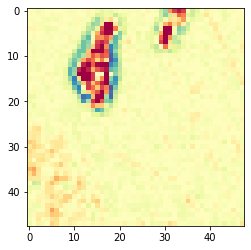

Epoch 196/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4623 - acc: 0.9993 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00196: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384436229679072, 'val_acc': 0.9065420555177136, 'loss': 0.46228831202474596, 'acc': 0.9992609024047852, 'lr': 9.999999e-34}


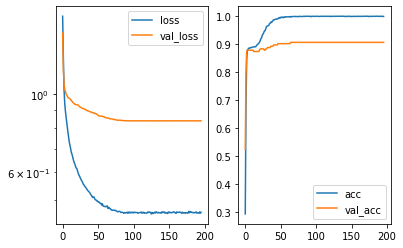

Predicted cell: Cells Probability: [[0.99846303]]
True Cell type: Cells
x [[0.6069861]]
True positional value x 0.2916666666666667
y [[0.6291218]]
True positional value y 0.7083333333333334


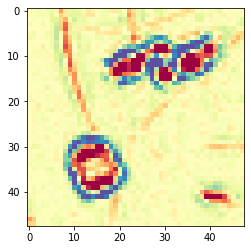

Epoch 197/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4611 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00197: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385057822566166, 'val_acc': 0.9065420555177136, 'loss': 0.4610592444913967, 'acc': 0.9997536341349283, 'lr': 9.999999e-34}


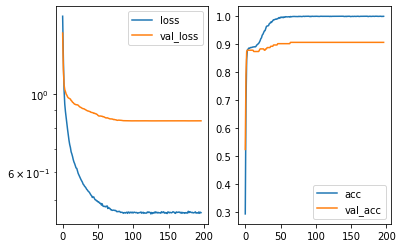

Predicted cell: Cells Probability: [[0.9979086]]
True Cell type: Cells
x [[0.53620476]]
True positional value x 0.5
y [[0.47476974]]
True positional value y 0.2916666666666667


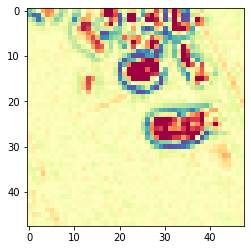

Epoch 198/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4614 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00198: ReduceLROnPlateau reducing learning rate to 9.999999319067318e-35.

Epoch 00198: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384283842327439, 'val_acc': 0.9065420555177136, 'loss': 0.4613938000393666, 'acc': 0.9997536341349283, 'lr': 9.999999e-34}


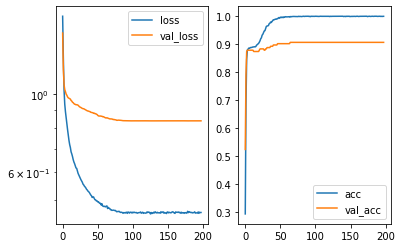

Predicted cell: Cells Probability: [[0.99374145]]
True Cell type: Cells
x [[0.8370742]]
True positional value x 0.7083333333333334
y [[0.5958211]]
True positional value y 0.2916666666666667


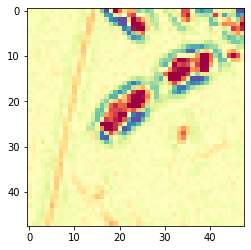

Epoch 199/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4616 - acc: 0.9995 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00199: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383951059011655, 'val_acc': 0.9065420555177136, 'loss': 0.46160356997415686, 'acc': 0.9995072676824742, 'lr': 9.999999e-35}


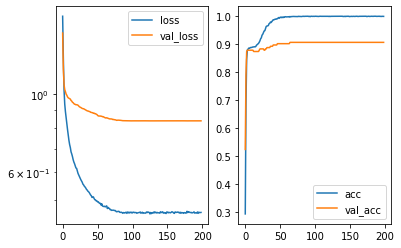

Predicted cell: Cells Probability: [[0.93904877]]
True Cell type: Cells
x [[0.53571975]]
True positional value x 0.7083333333333334
y [[0.5501299]]
True positional value y 0.7083333333333334


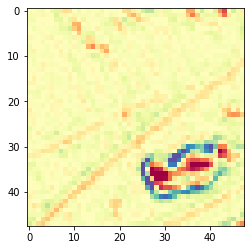

Epoch 200/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4608 - acc: 1.0000 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00200: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8382523733878804, 'val_acc': 0.9065420555177136, 'loss': 0.4607977982547137, 'acc': 1.0, 'lr': 9.999999e-35}


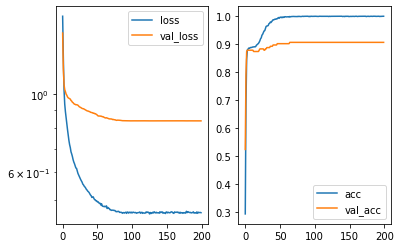

Predicted cell: Cells Probability: [[0.9973169]]
True Cell type: Cells
x [[0.4696585]]
True positional value x 0.2916666666666667
y [[0.5321939]]
True positional value y 0.2916666666666667


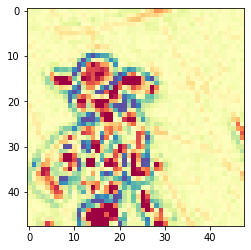

Epoch 201/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4609 - acc: 1.0000 - val_loss: 0.8382 - val_acc: 0.9065

Epoch 00201: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8382284903080663, 'val_acc': 0.9065420555177136, 'loss': 0.4609179260490504, 'acc': 1.0, 'lr': 9.999999e-35}


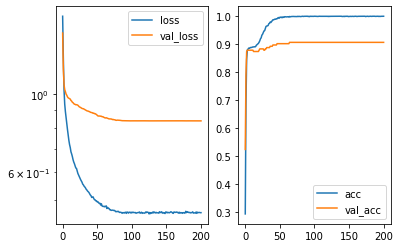

Predicted cell: Cells Probability: [[0.99533975]]
True Cell type: Cells
x [[0.22872794]]
True positional value x 0.2916666666666667
y [[0.43365768]]
True positional value y 0.2916666666666667


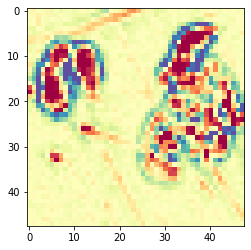

Epoch 202/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4599 - acc: 0.9993 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00202: ReduceLROnPlateau reducing learning rate to 9.999999319067319e-36.

Epoch 00202: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383676833081468, 'val_acc': 0.9065420555177136, 'loss': 0.4598671164630698, 'acc': 0.9992609024047852, 'lr': 9.999999e-35}


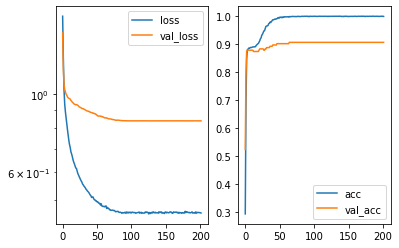

Predicted cell: Cells Probability: [[0.956027]]
True Cell type: Cells
x [[0.6309166]]
True positional value x 0.5
y [[0.7418043]]
True positional value y 0.7083333333333334


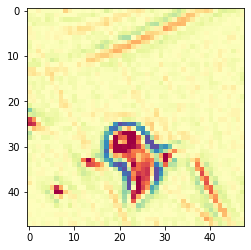

Epoch 203/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4599 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00203: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384311305028256, 'val_acc': 0.9065420555177136, 'loss': 0.45992308279421856, 'acc': 0.9997536341349283, 'lr': 9.9999995e-36}


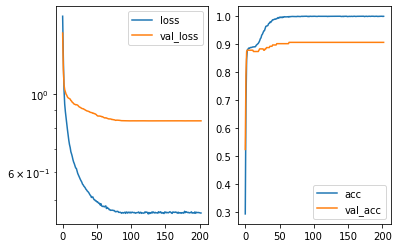

Predicted cell: Cells Probability: [[0.99835604]]
True Cell type: Cells
x [[0.32545683]]
True positional value x 0.5
y [[0.5436759]]
True positional value y 0.7083333333333334


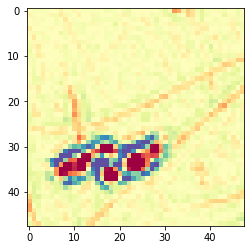

Epoch 204/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4613 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00204: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384370263491836, 'val_acc': 0.9065420555177136, 'loss': 0.4613428760423658, 'acc': 0.9997536341349283, 'lr': 9.9999995e-36}


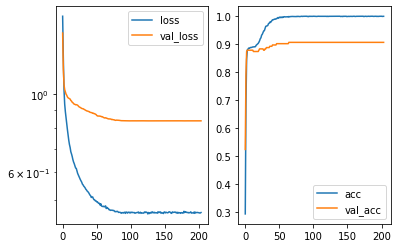

Predicted cell: Cells Probability: [[0.9869999]]
True Cell type: Cells
x [[0.11409952]]
True positional value x 0.2916666666666667
y [[0.2549197]]
True positional value y 0.2916666666666667


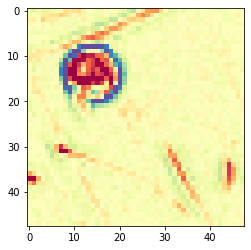

Epoch 205/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4601 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00205: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384938780392441, 'val_acc': 0.9065420555177136, 'loss': 0.4600790500875822, 'acc': 0.9997536341349283, 'lr': 9.9999995e-36}


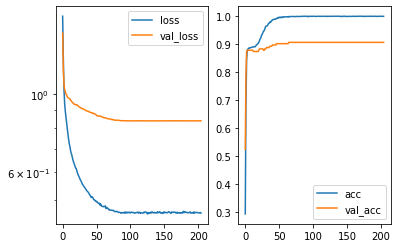

Predicted cell: Cells Probability: [[0.96584177]]
True Cell type: Cells
x [[0.56449586]]
True positional value x 0.7083333333333334
y [[0.1688323]]
True positional value y 0.2916666666666667


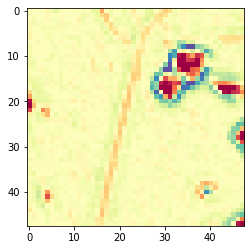

Epoch 206/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4643 - acc: 0.9998 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00206: ReduceLROnPlateau reducing learning rate to 9.999999462560281e-37.

Epoch 00206: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8386069474933303, 'val_acc': 0.9065420555177136, 'loss': 0.4643164685748134, 'acc': 0.9997536341349283, 'lr': 9.9999995e-36}


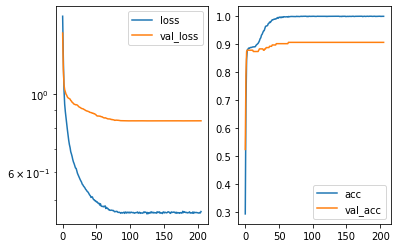

Predicted cell: Cells Probability: [[0.98621005]]
True Cell type: Cells
x [[0.7216727]]
True positional value x 0.5
y [[0.7785878]]
True positional value y 0.7083333333333334


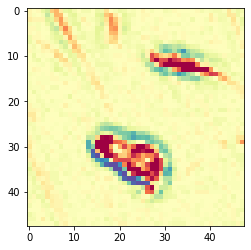

Epoch 207/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4601 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00207: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385477082751621, 'val_acc': 0.9065420555177136, 'loss': 0.4600877307867528, 'acc': 0.9997536341349283, 'lr': 9.9999995e-37}


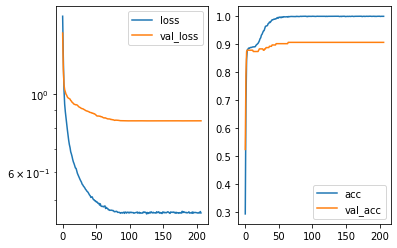

Predicted cell: Normal Probability: [[0.84142995]]
True Cell type: Normal
x [[0.65517145]]
True positional value x 0.5
y [[0.4359006]]
True positional value y 0.5


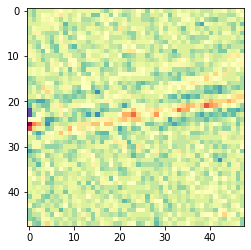

Epoch 208/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4616 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00208: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385152398982895, 'val_acc': 0.9065420555177136, 'loss': 0.46160236374002633, 'acc': 0.9997536341349283, 'lr': 9.9999995e-37}


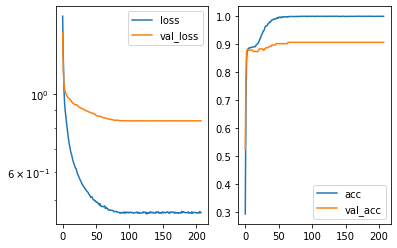

Predicted cell: Cells Probability: [[0.9953666]]
True Cell type: Cells
x [[0.22886448]]
True positional value x 0.2916666666666667
y [[0.4329976]]
True positional value y 0.2916666666666667


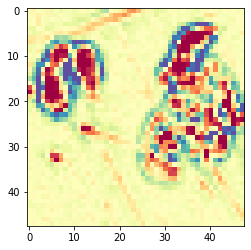

Epoch 209/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4594 - acc: 1.0000 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00209: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385301633415935, 'val_acc': 0.9065420555177136, 'loss': 0.45937129436645874, 'acc': 1.0, 'lr': 9.9999995e-37}


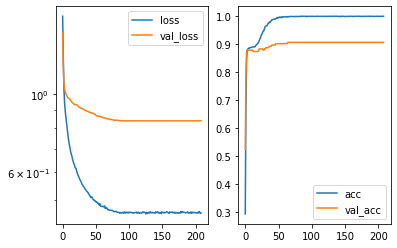

Predicted cell: Cells Probability: [[0.9706014]]
True Cell type: Cells
x [[0.8059059]]
True positional value x 0.7083333333333334
y [[0.18736449]]
True positional value y 0.5


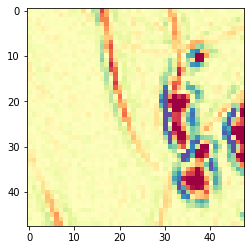

Epoch 210/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4609 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00210: ReduceLROnPlateau reducing learning rate to 9.99999946256028e-38.

Epoch 00210: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384382630062994, 'val_acc': 0.9065420555177136, 'loss': 0.4608593437069007, 'acc': 0.9997536341349283, 'lr': 9.9999995e-37}


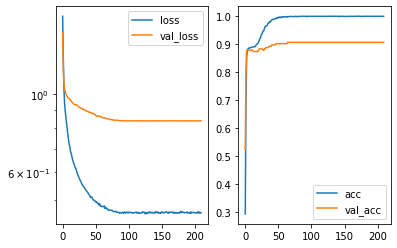

Predicted cell: Cells Probability: [[0.9578101]]
True Cell type: Cells
x [[0.6210366]]
True positional value x 0.7083333333333334
y [[0.26040912]]
True positional value y 0.5


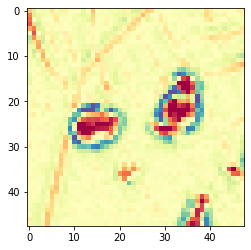

Epoch 211/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4612 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00211: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384884935673153, 'val_acc': 0.9065420555177136, 'loss': 0.46123004048497374, 'acc': 0.9997536341349283, 'lr': 1e-37}


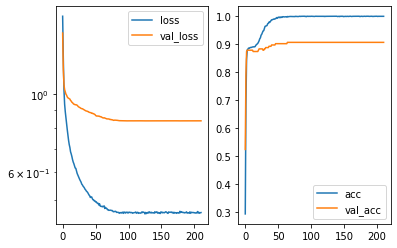

Predicted cell: Cells Probability: [[0.99670804]]
True Cell type: Cells
x [[0.7872841]]
True positional value x 0.5
y [[0.27013135]]
True positional value y 0.2916666666666667


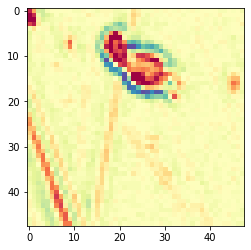

Epoch 212/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4597 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00212: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384775586217363, 'val_acc': 0.9065420555177136, 'loss': 0.45967985927162863, 'acc': 0.9997536341349283, 'lr': 1e-37}


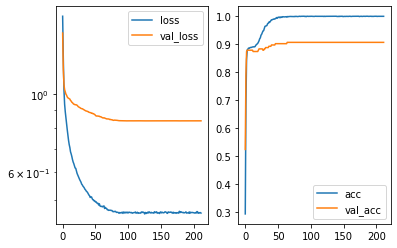

Predicted cell: Cells Probability: [[0.9949764]]
True Cell type: Cells
x [[0.65049714]]
True positional value x 0.7083333333333334
y [[0.20020519]]
True positional value y 0.2916666666666667


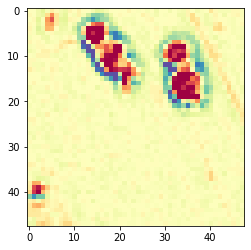

Epoch 213/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4623 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00213: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385038905054609, 'val_acc': 0.9065420555177136, 'loss': 0.46226098638621715, 'acc': 0.9997536341349283, 'lr': 1e-37}


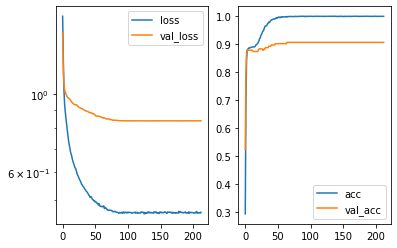

Predicted cell: Cells Probability: [[0.9942697]]
True Cell type: Cells
x [[0.4388028]]
True positional value x 0.2916666666666667
y [[0.6337431]]
True positional value y 0.2916666666666667


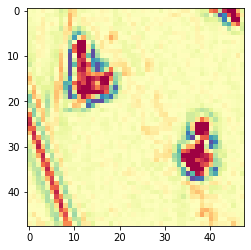

Epoch 214/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4612 - acc: 1.0000 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00214: ReduceLROnPlateau reducing learning rate to 9.99999991097579e-39.

Epoch 00214: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385588058801455, 'val_acc': 0.9065420555177136, 'loss': 0.46115790214641955, 'acc': 1.0, 'lr': 1e-37}


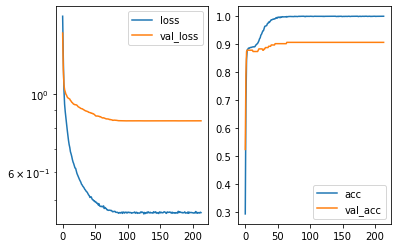

Predicted cell: Cells Probability: [[0.996231]]
True Cell type: Cells
x [[0.2126962]]
True positional value x 0.2916666666666667
y [[0.78396565]]
True positional value y 0.7083333333333334


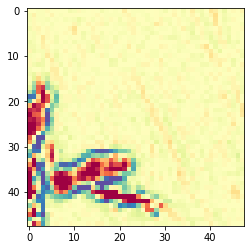

Epoch 215/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4637 - acc: 0.9993 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00215: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385759653332078, 'val_acc': 0.9065420555177136, 'loss': 0.46366573779504855, 'acc': 0.9992609024047852, 'lr': 1e-38}


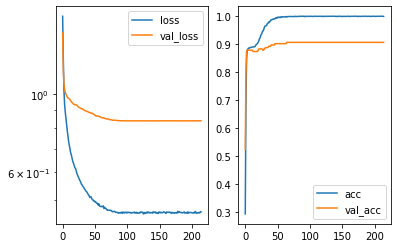

Predicted cell: Cells Probability: [[0.98329586]]
True Cell type: Cells
x [[0.7783458]]
True positional value x 0.7083333333333334
y [[0.88808376]]
True positional value y 0.5


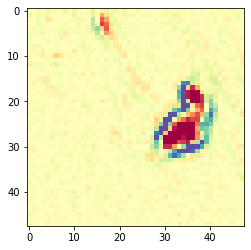

Epoch 216/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4594 - acc: 0.9995 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00216: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384227847384516, 'val_acc': 0.9065420555177136, 'loss': 0.45943700671049137, 'acc': 0.9995072682698568, 'lr': 1e-38}


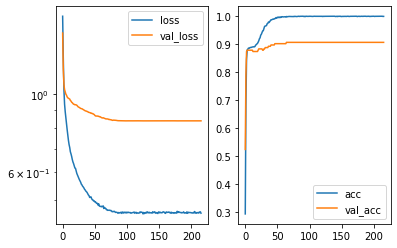

Predicted cell: Cells Probability: [[0.9961642]]
True Cell type: Cells
x [[0.61784905]]
True positional value x 0.7083333333333334
y [[0.5360769]]
True positional value y 0.7083333333333334


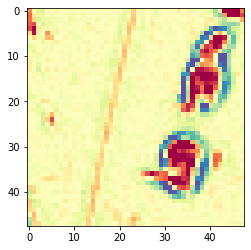

Epoch 217/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4618 - acc: 0.9995 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00217: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.838411671535991, 'val_acc': 0.9065420555177136, 'loss': 0.46184468016039415, 'acc': 0.9995072682698568, 'lr': 1e-38}


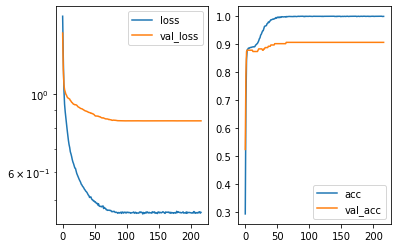

Predicted cell: Cells Probability: [[0.9729364]]
True Cell type: Cells
x [[0.24796815]]
True positional value x 0.2916666666666667
y [[0.5354418]]
True positional value y 0.2916666666666667


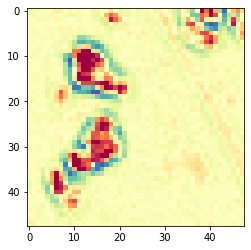

Epoch 218/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4610 - acc: 0.9995 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00218: ReduceLROnPlateau reducing learning rate to 9.999999350456405e-40.

Epoch 00218: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383329889484655, 'val_acc': 0.9065420555177136, 'loss': 0.46097408377146243, 'acc': 0.9995072682698568, 'lr': 1e-38}


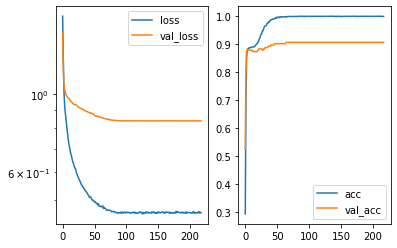

Predicted cell: Cells Probability: [[0.95765615]]
True Cell type: Cells
x [[0.6210325]]
True positional value x 0.7083333333333334
y [[0.26040894]]
True positional value y 0.5


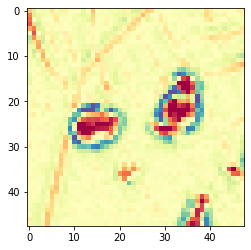

Epoch 219/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4613 - acc: 0.9998 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00219: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383192353159468, 'val_acc': 0.9065420555177136, 'loss': 0.4612637571614198, 'acc': 0.9997536341349283, 'lr': 1e-39}


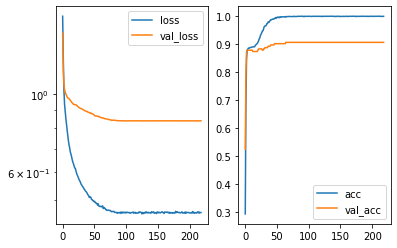

Predicted cell: Cells Probability: [[0.9906266]]
True Cell type: Cells
x [[0.5142958]]
True positional value x 0.7083333333333334
y [[0.7106887]]
True positional value y 0.5


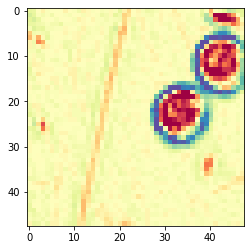

Epoch 220/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4648 - acc: 0.9985 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00220: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.838616317120668, 'val_acc': 0.9065420555177136, 'loss': 0.46481349614195766, 'acc': 0.9985218048095703, 'lr': 1e-39}


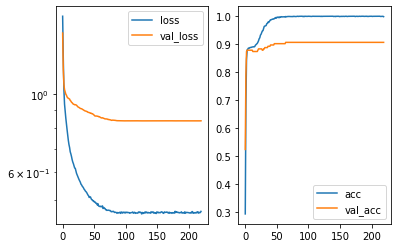

Predicted cell: Cells Probability: [[0.72979957]]
True Cell type: Normal
x [[0.63890797]]
True positional value x 0.5
y [[0.2609013]]
True positional value y 0.5


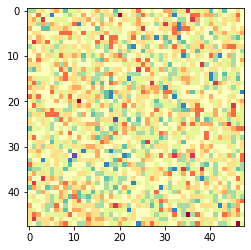

Epoch 221/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4603 - acc: 1.0000 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00221: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385083981763537, 'val_acc': 0.9065420555177136, 'loss': 0.4603049206701398, 'acc': 1.0, 'lr': 1e-39}


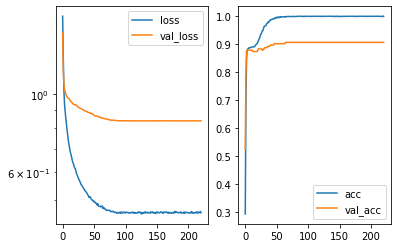

Predicted cell: Normal Probability: [[0.50155526]]
True Cell type: Normal
x [[0.5291793]]
True positional value x 0.5
y [[0.44240624]]
True positional value y 0.5


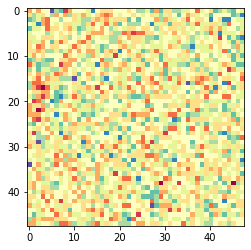

Epoch 222/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4621 - acc: 0.9995 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00222: ReduceLROnPlateau reducing learning rate to 1.0000002153053334e-40.

Epoch 00222: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385129949756872, 'val_acc': 0.9065420555177136, 'loss': 0.46207049000759554, 'acc': 0.9995072682698568, 'lr': 1e-39}


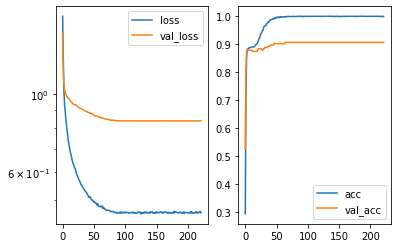

Predicted cell: Cells Probability: [[0.9964365]]
True Cell type: Cells
x [[0.39209813]]
True positional value x 0.5
y [[0.20253387]]
True positional value y 0.5


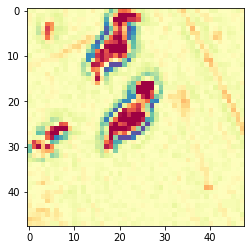

Epoch 223/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4599 - acc: 0.9993 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00223: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384092650680899, 'val_acc': 0.9065420555177136, 'loss': 0.45988784861494153, 'acc': 0.9992609024047852, 'lr': 1e-40}


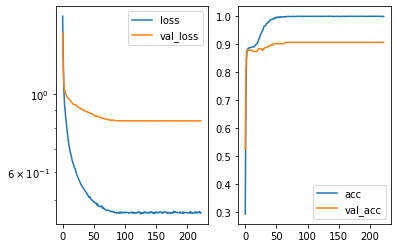

Predicted cell: Cells Probability: [[0.9532661]]
True Cell type: Cells
x [[0.9266385]]
True positional value x 0.7083333333333334
y [[0.33858502]]
True positional value y 0.2916666666666667


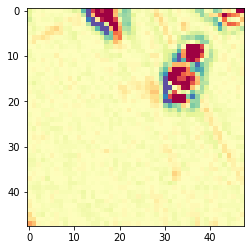

Epoch 224/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4660 - acc: 0.9988 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00224: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384203025113757, 'val_acc': 0.9065420555177136, 'loss': 0.46602893618710317, 'acc': 0.9987681703662661, 'lr': 1e-40}


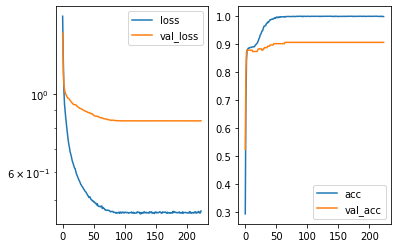

Predicted cell: Cells Probability: [[0.9826177]]
True Cell type: Cells
x [[0.6028644]]
True positional value x 0.5
y [[0.65571684]]
True positional value y 0.5


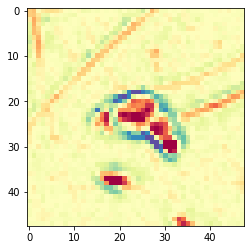

Epoch 225/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4608 - acc: 0.9998 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00225: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384572819014576, 'val_acc': 0.9065420555177136, 'loss': 0.4608439659067903, 'acc': 0.9997536341349283, 'lr': 1e-40}


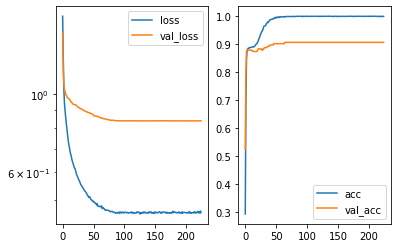

Predicted cell: Cells Probability: [[0.97201264]]
True Cell type: Cells
x [[0.27721867]]
True positional value x 0.2916666666666667
y [[0.76233166]]
True positional value y 0.7083333333333334


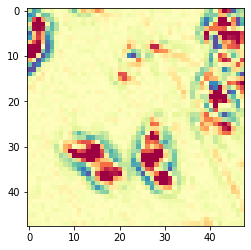

Epoch 226/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4601 - acc: 1.0000 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00226: ReduceLROnPlateau reducing learning rate to 9.99994610111476e-42.

Epoch 00226: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385480157682829, 'val_acc': 0.9065420555177136, 'loss': 0.46006217068802346, 'acc': 1.0, 'lr': 1e-40}


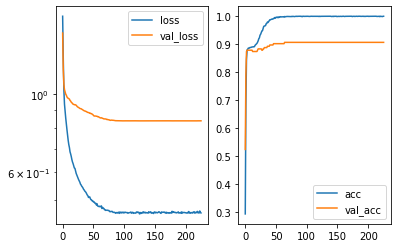

Predicted cell: Cells Probability: [[0.86616033]]
True Cell type: Cells
x [[0.3095397]]
True positional value x 0.2916666666666667
y [[0.7433848]]
True positional value y 0.7083333333333334


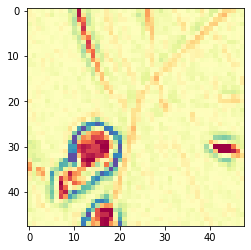

Epoch 227/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4627 - acc: 1.0000 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00227: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385679950223905, 'val_acc': 0.9065420555177136, 'loss': 0.46271328663673267, 'acc': 1.0, 'lr': 1e-41}


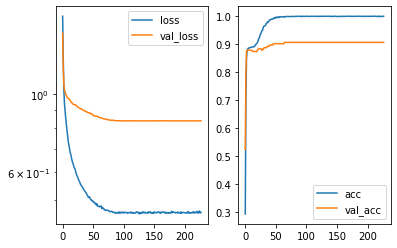

Predicted cell: Cells Probability: [[0.996709]]
True Cell type: Cells
x [[0.78709364]]
True positional value x 0.5
y [[0.27039337]]
True positional value y 0.2916666666666667


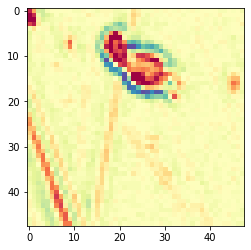

Epoch 228/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4599 - acc: 0.9995 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00228: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385177221253654, 'val_acc': 0.9065420555177136, 'loss': 0.4598751849187187, 'acc': 0.9995072682698568, 'lr': 1e-41}


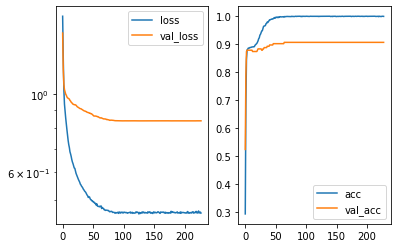

Predicted cell: Normal Probability: [[0.51004654]]
True Cell type: Normal
x [[0.55424]]
True positional value x 0.5
y [[0.72674996]]
True positional value y 0.5


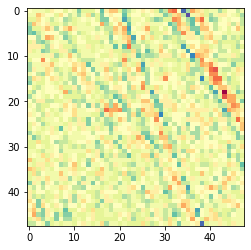

Epoch 229/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4626 - acc: 0.9993 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00229: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384866240982697, 'val_acc': 0.9065420555177136, 'loss': 0.4625744294594532, 'acc': 0.9992609024047852, 'lr': 1e-41}


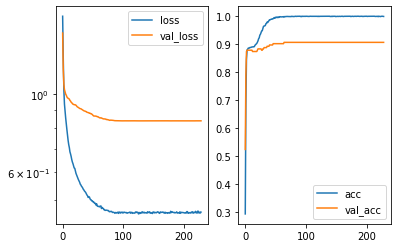

Predicted cell: Cells Probability: [[0.9845916]]
True Cell type: Cells
x [[0.67679715]]
True positional value x 0.7083333333333334
y [[0.68067837]]
True positional value y 0.7083333333333334


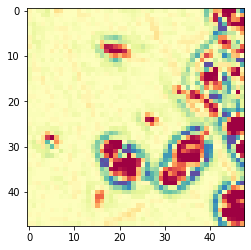

Epoch 230/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4601 - acc: 1.0000 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00230: ReduceLROnPlateau reducing learning rate to 9.999665841421895e-43.

Epoch 00230: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384679227231819, 'val_acc': 0.9065420555177136, 'loss': 0.46007213423803656, 'acc': 1.0, 'lr': 1e-41}


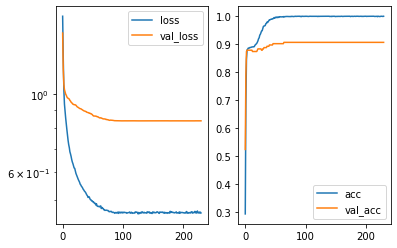

Predicted cell: Cells Probability: [[0.9743823]]
True Cell type: Cells
x [[0.17119665]]
True positional value x 0.2916666666666667
y [[0.19162881]]
True positional value y 0.2916666666666667


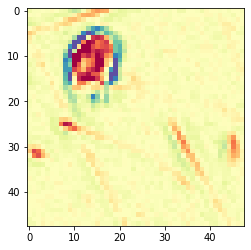

Epoch 231/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4593 - acc: 0.9998 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00231: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383450168315495, 'val_acc': 0.9065420555177136, 'loss': 0.45930543184339134, 'acc': 0.9997536335475459, 'lr': 1e-42}


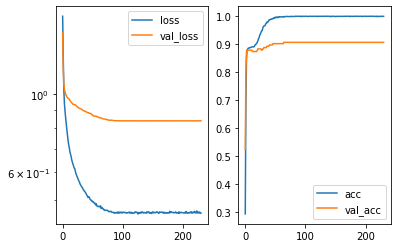

Predicted cell: Cells Probability: [[0.9985812]]
True Cell type: Cells
x [[0.31994528]]
True positional value x 0.5
y [[0.24784291]]
True positional value y 0.2916666666666667


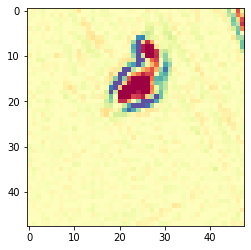

Epoch 232/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4617 - acc: 0.9995 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00232: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385570868153438, 'val_acc': 0.9065420555177136, 'loss': 0.46165654183638216, 'acc': 0.9995072682698568, 'lr': 1e-42}


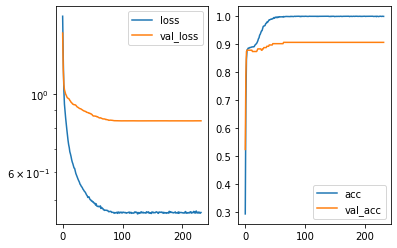

Predicted cell: Cells Probability: [[0.98229814]]
True Cell type: Cells
x [[0.6517095]]
True positional value x 0.2916666666666667
y [[0.6654484]]
True positional value y 0.7083333333333334


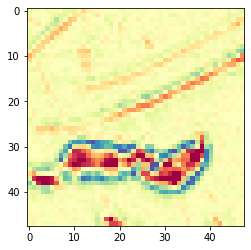

Epoch 233/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4609 - acc: 0.9993 - val_loss: 0.8386 - val_acc: 0.9065

Epoch 00233: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8385692884988873, 'val_acc': 0.9065420555177136, 'loss': 0.46094921973574543, 'acc': 0.9992609024047852, 'lr': 1e-42}


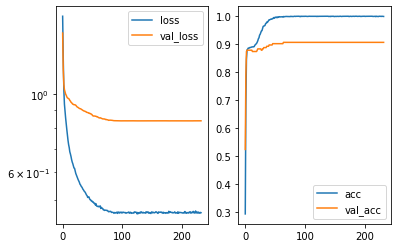

Predicted cell: Cells Probability: [[0.9953694]]
True Cell type: Cells
x [[0.22858]]
True positional value x 0.2916666666666667
y [[0.43296364]]
True positional value y 0.2916666666666667


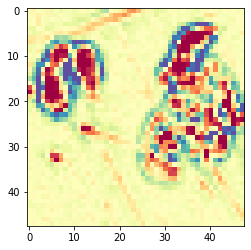

Epoch 234/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4615 - acc: 0.9995 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00234: ReduceLROnPlateau reducing learning rate to 1.0005271035279195e-43.

Epoch 00234: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384644277741976, 'val_acc': 0.9065420555177136, 'loss': 0.46152846047842433, 'acc': 0.9995072682698568, 'lr': 1e-42}


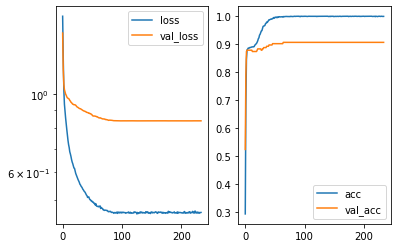

Predicted cell: Cells Probability: [[0.9222345]]
True Cell type: Cells
x [[0.7838997]]
True positional value x 0.5
y [[0.21710324]]
True positional value y 0.2916666666666667


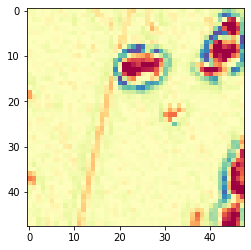

Epoch 235/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4578 - acc: 1.0000 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00235: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.838467706586713, 'val_acc': 0.9065420555177136, 'loss': 0.4578053262043422, 'acc': 1.0, 'lr': 1e-43}


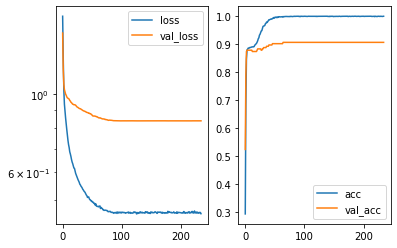

Predicted cell: Cells Probability: [[0.98029894]]
True Cell type: Cells
x [[0.64019644]]
True positional value x 0.7083333333333334
y [[0.55719465]]
True positional value y 0.5


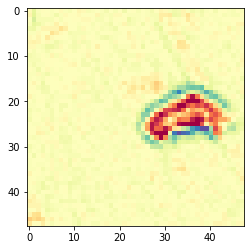

Epoch 236/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4587 - acc: 0.9995 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00236: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.83827444381803, 'val_acc': 0.9065420555177136, 'loss': 0.45874181276737513, 'acc': 0.9995072682698568, 'lr': 1e-43}


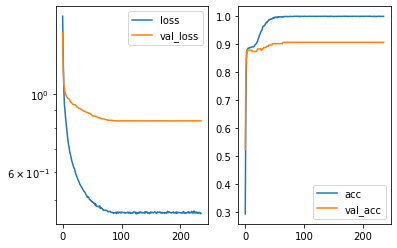

Predicted cell: Cells Probability: [[0.9882509]]
True Cell type: Cells
x [[0.2197136]]
True positional value x 0.5
y [[0.3572991]]
True positional value y 0.7083333333333334


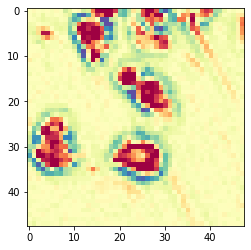

Epoch 237/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4590 - acc: 1.0000 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00237: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8382549803947734, 'val_acc': 0.9065420555177136, 'loss': 0.4590272365106271, 'acc': 1.0, 'lr': 1e-43}


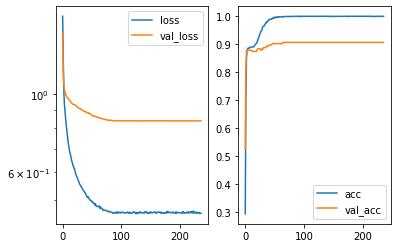

Predicted cell: Cells Probability: [[0.99631625]]
True Cell type: Cells
x [[0.64738345]]
True positional value x 0.2916666666666667
y [[0.52975196]]
True positional value y 0.2916666666666667


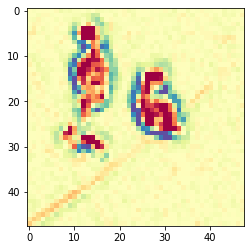

Epoch 238/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4640 - acc: 0.9995 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00238: ReduceLROnPlateau reducing learning rate to 9.949219096706202e-45.

Epoch 00238: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8382505796780096, 'val_acc': 0.9065420555177136, 'loss': 0.464020010108694, 'acc': 0.9995072682698568, 'lr': 1e-43}


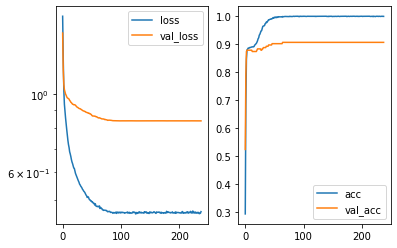

Predicted cell: Cells Probability: [[0.5280963]]
True Cell type: Normal
x [[0.5118707]]
True positional value x 0.5
y [[0.26656967]]
True positional value y 0.5


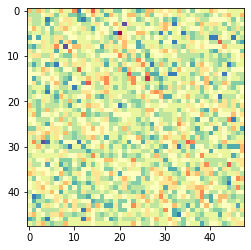

Epoch 239/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4624 - acc: 1.0000 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00239: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.838345013489233, 'val_acc': 0.9065420555177136, 'loss': 0.4624023199242951, 'acc': 1.0, 'lr': 1e-44}


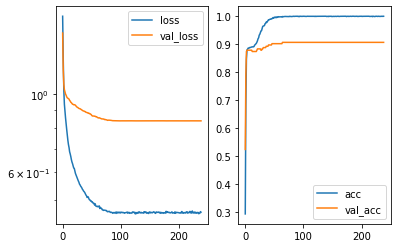

Predicted cell: Cells Probability: [[0.58740807]]
True Cell type: Normal
x [[0.4996026]]
True positional value x 0.5
y [[0.5536541]]
True positional value y 0.5


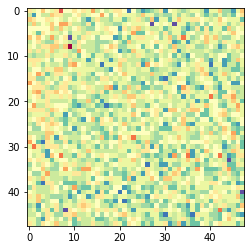

Epoch 240/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4616 - acc: 1.0000 - val_loss: 0.8382 - val_acc: 0.9065

Epoch 00240: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8381704621225874, 'val_acc': 0.9065420555177136, 'loss': 0.4615647120116291, 'acc': 1.0, 'lr': 1e-44}


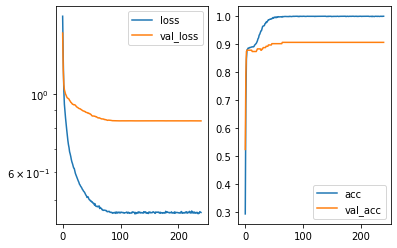

Predicted cell: Cells Probability: [[0.9985838]]
True Cell type: Cells
x [[0.31986508]]
True positional value x 0.5
y [[0.2480091]]
True positional value y 0.2916666666666667


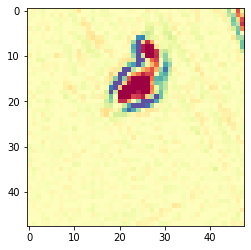

Epoch 241/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4605 - acc: 0.9998 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00241: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.838341888423278, 'val_acc': 0.9065420555177136, 'loss': 0.4605229848063794, 'acc': 0.9997536341349283, 'lr': 1e-44}


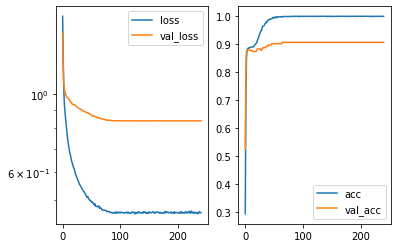

Predicted cell: Cells Probability: [[0.97435135]]
True Cell type: Cells
x [[0.17039287]]
True positional value x 0.2916666666666667
y [[0.19143097]]
True positional value y 0.2916666666666667


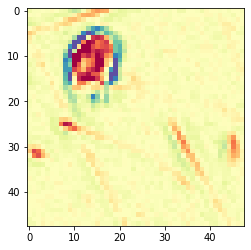

Epoch 242/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4623 - acc: 0.9993 - val_loss: 0.8385 - val_acc: 0.9065

Epoch 00242: ReduceLROnPlateau reducing learning rate to 9.80908925027372e-46.

Epoch 00242: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8384911952731765, 'val_acc': 0.9065420555177136, 'loss': 0.4622679283596019, 'acc': 0.9992609020964093, 'lr': 1e-44}


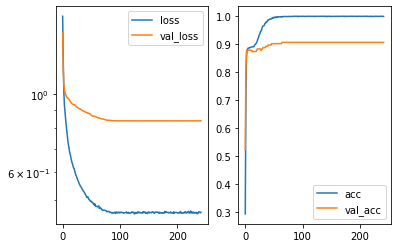

Predicted cell: Cells Probability: [[0.99039125]]
True Cell type: Cells
x [[0.72780913]]
True positional value x 0.7083333333333334
y [[0.7485444]]
True positional value y 0.7083333333333334


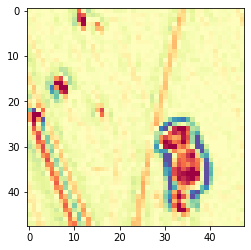

Epoch 243/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4584 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00243: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383833153225552, 'val_acc': 0.9065420555177136, 'loss': 0.45843230766097615, 'acc': 0.9997536341349283, 'lr': 1e-45}


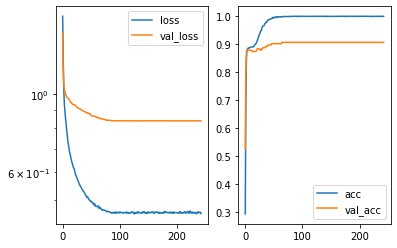

Predicted cell: Cells Probability: [[0.96071756]]
True Cell type: Cells
x [[0.7624814]]
True positional value x 0.2916666666666667
y [[0.7167807]]
True positional value y 0.5


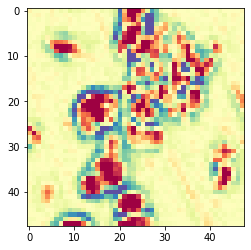

Epoch 244/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4599 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00244: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383700207015065, 'val_acc': 0.9065420555177136, 'loss': 0.45989635998640604, 'acc': 0.9997536341349283, 'lr': 1e-45}


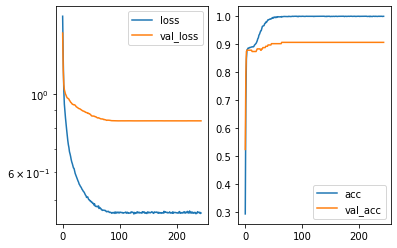

Predicted cell: Cells Probability: [[0.9728636]]
True Cell type: Cells
x [[0.24807939]]
True positional value x 0.2916666666666667
y [[0.5350189]]
True positional value y 0.2916666666666667


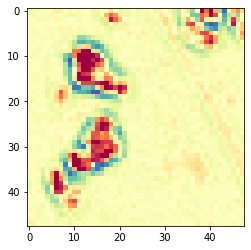

Epoch 245/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4611 - acc: 0.9998 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00245: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8382887957252074, 'val_acc': 0.9065420555177136, 'loss': 0.4610697848437366, 'acc': 0.9997536341349283, 'lr': 1e-45}


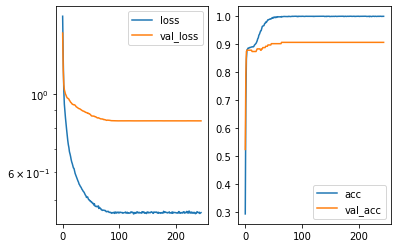

Predicted cell: Cells Probability: [[0.95069224]]
True Cell type: Cells
x [[0.5229217]]
True positional value x 0.7083333333333334
y [[0.8301269]]
True positional value y 0.7083333333333334


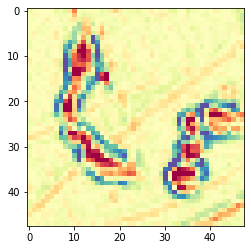

Epoch 246/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4584 - acc: 0.9998 - val_loss: 0.8382 - val_acc: 0.9065

Epoch 00246: ReduceLROnPlateau reducing learning rate to 1.4012984643248171e-46.

Epoch 00246: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8381708799121536, 'val_acc': 0.9065420555177136, 'loss': 0.4583522768686134, 'acc': 0.9997536335475459, 'lr': 1e-45}


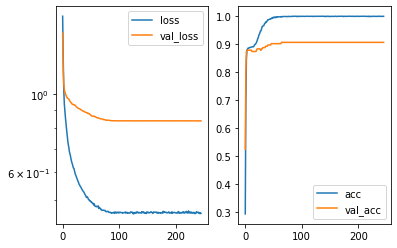

Predicted cell: Cells Probability: [[0.9807426]]
True Cell type: Cells
x [[0.3029432]]
True positional value x 0.2916666666666667
y [[0.1843133]]
True positional value y 0.2916666666666667


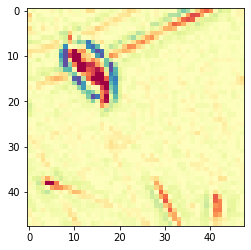

Epoch 247/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4618 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00247: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383562358740334, 'val_acc': 0.9065420555177136, 'loss': 0.4618350723145718, 'acc': 0.9997536341349283, 'lr': 0.0}


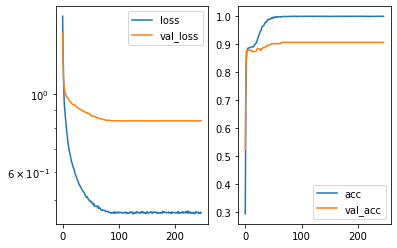

Predicted cell: Cells Probability: [[0.9925615]]
True Cell type: Cells
x [[0.46695498]]
True positional value x 0.2916666666666667
y [[0.5046834]]
True positional value y 0.5


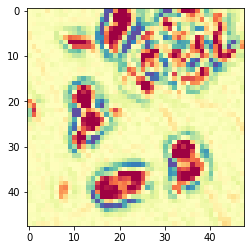

Epoch 248/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4605 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00248: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383889560387513, 'val_acc': 0.9065420555177136, 'loss': 0.4605217476245305, 'acc': 0.9997536341349283, 'lr': 0.0}


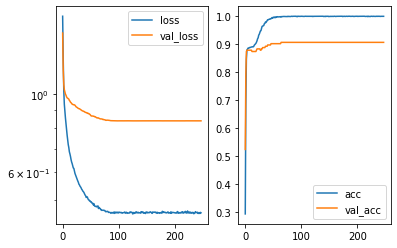

Predicted cell: Cells Probability: [[0.72881943]]
True Cell type: Normal
x [[0.63896555]]
True positional value x 0.5
y [[0.26143155]]
True positional value y 0.5


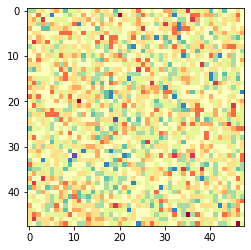

Epoch 249/250
4059/4059 [==============================] - 6s 1ms/step - loss: 0.4629 - acc: 0.9998 - val_loss: 0.8384 - val_acc: 0.9065

Epoch 00249: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383705097938252, 'val_acc': 0.9065420555177136, 'loss': 0.46294942947554746, 'acc': 0.9997536341349283, 'lr': 0.0}


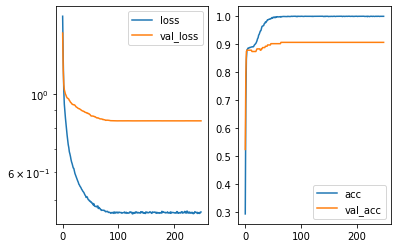

Predicted cell: Cells Probability: [[0.96153086]]
True Cell type: Cells
x [[0.6621431]]
True positional value x 0.7083333333333334
y [[0.5264262]]
True positional value y 0.5


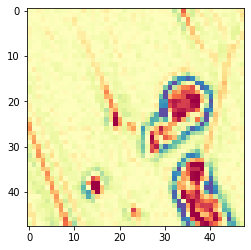

Epoch 250/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4584 - acc: 0.9998 - val_loss: 0.8383 - val_acc: 0.9065

Epoch 00250: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8383337565671618, 'val_acc': 0.9065420555177136, 'loss': 0.4584118899276439, 'acc': 0.9997536341349283, 'lr': 0.0}


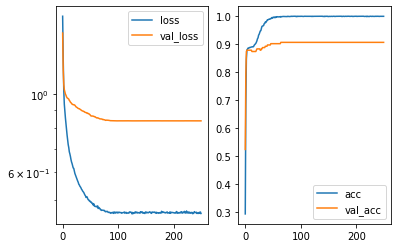

Predicted cell: Cells Probability: [[0.9939401]]
True Cell type: Cells
x [[0.42642826]]
True positional value x 0.7083333333333334
y [[0.23963916]]
True positional value y 0.2916666666666667


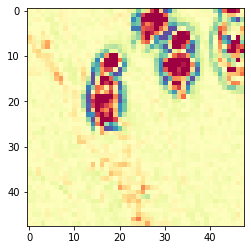

In [5]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
